# Kaggle dataset

https://www.kaggle.com/datasets/kaushil268/disease-prediction-using-machine-learning

## Train frame

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats as st
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
import statsmodels.api as sm
from scipy.stats import ttest_ind, f_oneway, kruskal, levene
from statsmodels.stats.multicomp import MultiComparison

df_train = pd.read_csv('..\\data\\Training.csv', sep=',')
df_train.drop('Unnamed: 133', axis=1, inplace=True)

df_test = pd.read_csv('..\\data\\Testing.csv', sep=',')
df_train

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
0           1          1                     1                    0   
1           0          1                     1                    0   
2           1          0                     1                    0   
3           1          1                     0                    0   
4           1          1                     1                    0   
...       ...        ...                   ...                  ...   
4915        0          0                     0                    0   
4916        0          1                     0                    0   
4917        0          0                     0                    0   
4918        0          1                     0                    0   
4919        0          1                     0                    0   

      shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0             0       0           0             0        0                 0   
1             0       0           0             0        0                 0   
2             0       0           0             0        0                 0   
3             0       0           0             0        0                 0   
4             0       0           0             0        0                 0   
...         ...     ...         ...           ...      ...               ...   
4915          0       0           0             0        0                 0   
4916          0       0           0             0        0                 0   
4917          0       0           0             0        0                 0   
4918          0       0           1             0        0                 0   
4919          0       0           0             0        0                 0   

      ...  blackheads  scurring  skin_peeling  silver_like_dusting  \
0     ...           0         0             0                    0   
1     ...           0         0             0                    0   
2     ...           0         0             0                    0   
3     ...           0         0             0                    0   
4     ...           0         0             0                    0   
...   ...         ...       ...           ...                  ...   
4915  ...           0         0             0                    0   
4916  ...           1         1             0                    0   
4917  ...           0         0             0                    0   
4918  ...           0         0             1                    1   
4919  ...           0         0             0                    0   

      small_dents_in_nails  inflammatory_nails  blister  red_sore_around_nose  \
0                        0                   0        0                     0   
1                        0                   0        0                     0   
2                        0                   0        0                     0   
3                        0                   0        0                     0   
4                        0                   0        0                     0   
...                    ...                 ...      ...                   ...   
4915                     0                   0        0                     0   
4916                     0                   0        0                     0   
4917                     0                   0        0                     0   
4918                     1                   1        0                     0   
4919                     0                   0        1                     1   

      yellow_crust_ooze                                prognosis  
0                     0                         Fungal infection  
1                     0                         Fungal infection  
2                     0                         Fungal infection  
3                     0                         Fungal infection  
4                     0                    

In [2]:
df_train['prognosis'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [3]:
columns = [
            'vomiting',
            'breathlessness',
            'sweating',
            'headache',
            'chest_pain',
            'dizziness',
            'loss_of_balance',
            'lack_of_concentration',
            'prognosis'
        ]

In [4]:
cardio_train = df_train[(df_train['prognosis'] == 'Hypertension ') + (df_train['prognosis'] == 'Heart attack')]
cardio_test = df_test[(df_test['prognosis'] == 'Hypertension ') + (df_test['prognosis'] == 'Heart attack')]

cardio_train = cardio_train[columns]
cardio_test = cardio_test[columns]

In [6]:
cardio_train.to_csv('..\\data\\flag_cardio_train.csv', sep=';', encoding='utf-8')
cardio_test.to_csv('..\\data\\flag_cardio_test.csv', sep=';', encoding='utf-8')

In [17]:
df_cardio = df_train[(df_train['prognosis'] == 'Hypertension ') + (df_train['prognosis'] == 'Heart attack')]

for i in df_cardio.columns:
    if df_cardio[i].sum() != 0:
        print(i)

vomiting
breathlessness
sweating
headache
chest_pain
dizziness
loss_of_balance
lack_of_concentration
prognosis


vomiting,
breathlessness,
sweating
headache
chest_pain
dizziness
loss_of_balance
lack_of_concentration
prognosis

рвота,
одышка,
потливость
головная боль
боль в груди
головокружение
потеря равновесия
отсутствие концентрации
прогноз

### Standard research

In [2]:
df_train.dtypes.to_list()

[dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'

In [3]:
print(df_train.isna().sum().sum())

0


In [4]:
print(df_train.duplicated().sum())

4616


In [5]:
df_train[df_train.duplicated()==True].head(2)

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
5        0          1                     1                    0          0   
6        1          0                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
5       0           0             0        0                 0  ...   
6       0           0             0        0                 0  ...   

   blackheads  scurring  skin_peeling  silver_like_dusting  \
5           0         0             0                    0   
6           0         0             0                    0   

   small_dents_in_nails  inflammatory_nails  blister  red_sore_around_nose  \
5                     0                   0        0                     0   
6                     0                   0        0                     0   

   yellow_crust_ooze         prognosis  
5                  0  Fungal infection  
6                  0  Fungal infection  

[2 rows x 133 columns]

### Distributions

In [6]:
df_train.describe()

itching    skin_rash  nodal_skin_eruptions  continuous_sneezing  \
count  4920.000000  4920.000000           4920.000000          4920.000000   
mean      0.137805     0.159756              0.021951             0.045122   
std       0.344730     0.366417              0.146539             0.207593   
min       0.000000     0.000000              0.000000             0.000000   
25%       0.000000     0.000000              0.000000             0.000000   
50%       0.000000     0.000000              0.000000             0.000000   
75%       0.000000     0.000000              0.000000             0.000000   
max       1.000000     1.000000              1.000000             1.000000   

         shivering       chills   joint_pain  stomach_pain      acidity  \
count  4920.000000  4920.000000  4920.000000   4920.000000  4920.000000   
mean      0.021951     0.162195     0.139024      0.045122     0.045122   
std       0.146539     0.368667     0.346007      0.207593     0.207593   
min       0.000000     0.000000     0.000000      0.000000     0.000000   
25%       0.000000     0.000000     0.000000      0.000000     0.000000   
50%       0.000000     0.000000     0.000000      0.000000     0.000000   
75%       0.000000     0.000000     0.000000      0.000000     0.000000   
max       1.000000     1.000000     1.000000      1.000000     1.000000   

       ulcers_on_tongue  ...  pus_filled_pimples   blackheads     scurring  \
count       4920.000000  ...         4920.000000  4920.000000  4920.000000   
mean           0.021951  ...            0.021951     0.021951     0.021951   
std            0.146539  ...            0.146539     0.146539     0.146539   
min            0.000000  ...            0.000000     0.000000     0.000000   
25%            0.000000  ...            0.000000     0.000000     0.000000   
50%            0.000000  ...            0.000000     0.000000     0.000000   
75%            0.000000  ...            0.000000     0.000000     0.000000   
max            1.000000  ...            1.000000     1.000000     1.000000   

       skin_peeling  silver_like_dusting  small_dents_in_nails  \
count   4920.000000          4920.000000           4920.000000   
mean       0.023171             0.023171              0.023171   
std        0.150461             0.150461              0.150461   
min        0.000000             0.000000              0.000000   
25%        0.000000             0.000000              0.000000   
50%        0.000000             0.000000              0.000000   
75%        0.000000             0.000000              0.000000   
max        1.000000             1.000000              1.000000   

       inflammatory_nails      blister  red_sore_around_nose  \
count         4920.000000  4920.000000           4920.000000   
mean             0.023171     0.023171              0.023171   
std              0.150461     0.150461              0.150461   
min              0.000000     0.000000              0.000000   
25%              0.000000     0.000000              0.000000   
50%              0.000000     0.000000              0.000000   
75%              0.000000     0.000000              0.000000   
max              1.000000     1.000000              1.000000   

       yellow_crust_ooze  
count        4920.000000  
mean            0.023171  
std             0.150461  
min             0.000000  
25%             0.000000  
50%             0.000000  
75%             0.000000  
max             1.000000  

[8 rows x 132 columns]

In [7]:
df_train['prognosis'].nunique()

41

In [8]:
df_train['prognosis'].value_counts(normalize=True)

prognosis
Fungal infection                           0.02439
Allergy                                    0.02439
GERD                                       0.02439
Chronic cholestasis                        0.02439
Drug Reaction                              0.02439
Peptic ulcer diseae                        0.02439
AIDS                                       0.02439
Diabetes                                   0.02439
Gastroenteritis                            0.02439
Bronchial Asthma                           0.02439
Hypertension                               0.02439
Migraine                                   0.02439
Cervical spondylosis                       0.02439
Paralysis (brain hemorrhage)               0.02439
Jaundice                                   0.02439
Malaria                                    0.02439
Chicken pox                                0.02439
Dengue                                     0.02439
Typhoid                                    0.02439
hepatitis A          

In [9]:
FEATURES_COLS = [
                'itching',
                'skin_rash',
                'nodal_skin_eruptions',
                'continuous_sneezing',
                'shivering',
                'chills',
                'joint_pain',
                'stomach_pain',
                'acidity',
                'ulcers_on_tongue',
                'muscle_wasting',
                'vomiting',
                'burning_micturition',
                'spotting_ urination',
                'fatigue',
                'weight_gain',
                'anxiety',
                'cold_hands_and_feets',
                'mood_swings',
                'weight_loss',
                'restlessness',
                'lethargy',
                'patches_in_throat',
                'irregular_sugar_level',
                'cough',
                'high_fever',
                'sunken_eyes',
                'breathlessness',
                'sweating',
                'dehydration',
                'indigestion',
                'headache',
                'yellowish_skin',
                'dark_urine',
                'nausea',
                'loss_of_appetite',
                'pain_behind_the_eyes',
                'back_pain',
                'constipation',
                'abdominal_pain',
                'diarrhoea',
                'mild_fever',
                'yellow_urine',
                'yellowing_of_eyes',
                'acute_liver_failure',
                'fluid_overload',
                'swelling_of_stomach',
                'swelled_lymph_nodes',
                'malaise',
                'blurred_and_distorted_vision',
                'phlegm',
                'throat_irritation',
                'redness_of_eyes',
                'sinus_pressure',
                'runny_nose',
                'congestion',
                'chest_pain',
                'weakness_in_limbs',
                'fast_heart_rate',
                'pain_during_bowel_movements',
                'pain_in_anal_region',
                'bloody_stool',
                'irritation_in_anus',
                'neck_pain',
                'dizziness',
                'cramps',
                'bruising',
                'obesity',
                'swollen_legs',
                'swollen_blood_vessels',
                'puffy_face_and_eyes',
                'enlarged_thyroid',
                'brittle_nails',
                'swollen_extremeties',
                'excessive_hunger',
                'extra_marital_contacts',
                'drying_and_tingling_lips',
                'slurred_speech',
                'knee_pain',
                'hip_joint_pain',
                'muscle_weakness',
                'stiff_neck',
                'swelling_joints',
                'movement_stiffness',
                'spinning_movements',
                'loss_of_balance',
                'unsteadiness',
                'weakness_of_one_body_side',
                'loss_of_smell',
                'bladder_discomfort',
                'foul_smell_of urine',
                'continuous_feel_of_urine',
                'passage_of_gases',
                'internal_itching',
                'toxic_look_(typhos)',
                'depression',
                'irritability',
                'muscle_pain',
                'altered_sensorium',
                'red_spots_over_body',
                'belly_pain',
                'abnormal_menstruation',
                'dischromic _patches',
                'watering_from_eyes',
                'increased_appetite',
                'polyuria',
                'family_history',
                'mucoid_sputum',
                'rusty_sputum',
                'lack_of_concentration',
                'visual_disturbances',
                'receiving_blood_transfusion',
                'receiving_unsterile_injections',
                'coma',
                'stomach_bleeding',
                'distention_of_abdomen',
                'history_of_alcohol_consumption',
                'fluid_overload.1',
                'blood_in_sputum',
                'prominent_veins_on_calf',
                'palpitations',
                'painful_walking',
                'pus_filled_pimples',
                'blackheads',
                'scurring',
                'skin_peeling',
                'silver_like_dusting',
                'small_dents_in_nails',
                'inflammatory_nails',
                'blister',
                'red_sore_around_nose',
                'yellow_crust_ooze'
                ]

In [10]:
for i in df_train['prognosis'].unique():
    for feat in FEATURES_COLS:
        print(f'prognosis {i}\nflag {df_train[df_train['prognosis']==i][feat].value_counts(normalize=True)}\n')

prognosis Fungal infection
flag itching
1    0.9
0    0.1
Name: proportion, dtype: float64

prognosis Fungal infection
flag skin_rash
1    0.9
0    0.1
Name: proportion, dtype: float64

prognosis Fungal infection
flag nodal_skin_eruptions
1    0.9
0    0.1
Name: proportion, dtype: float64

prognosis Fungal infection
flag continuous_sneezing
0    1.0
Name: proportion, dtype: float64

prognosis Fungal infection
flag shivering
0    1.0
Name: proportion, dtype: float64

prognosis Fungal infection
flag chills
0    1.0
Name: proportion, dtype: float64

prognosis Fungal infection
flag joint_pain
0    1.0
Name: proportion, dtype: float64

prognosis Fungal infection
flag stomach_pain
0    1.0
Name: proportion, dtype: float64

prognosis Fungal infection
flag acidity
0    1.0
Name: proportion, dtype: float64

prognosis Fungal infection
flag ulcers_on_tongue
0    1.0
Name: proportion, dtype: float64

prognosis Fungal infection
flag muscle_wasting
0    1.0
Name: proportion, dtype: float64

prognosi

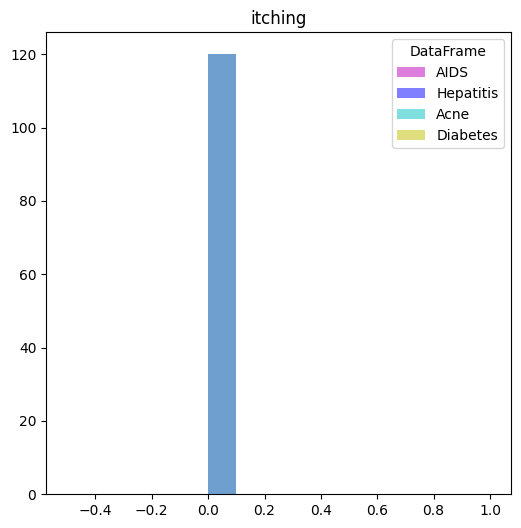

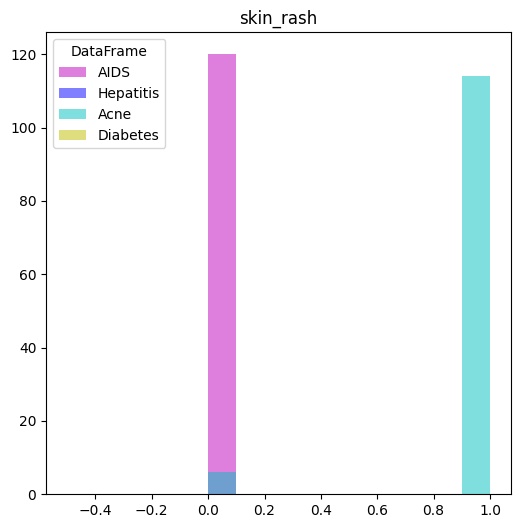

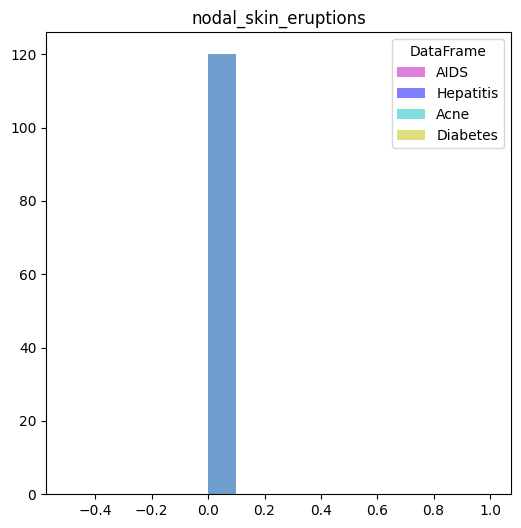

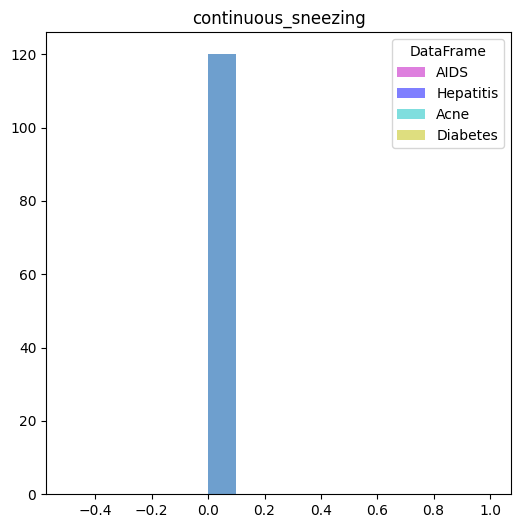

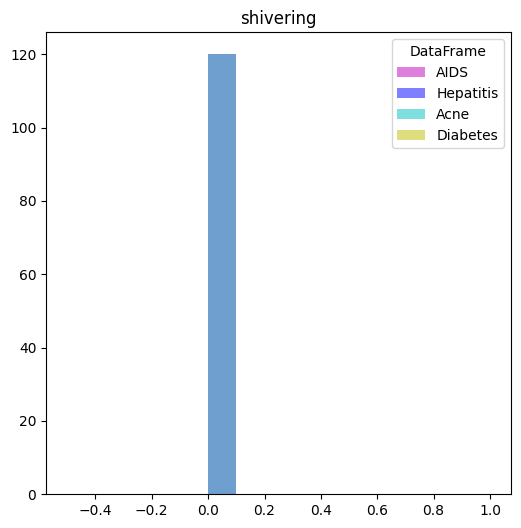

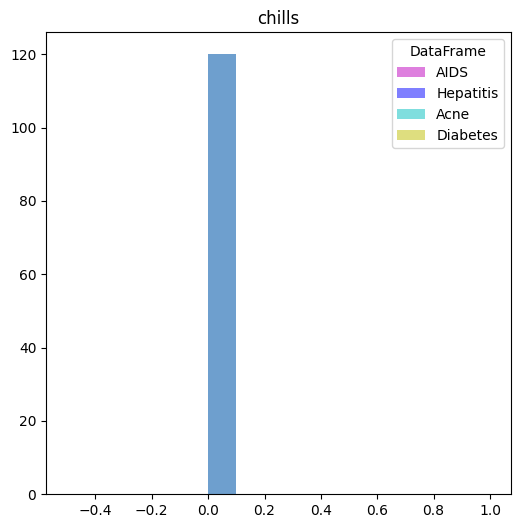

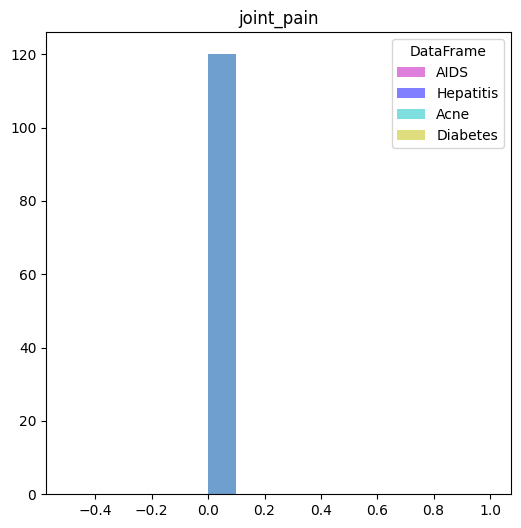

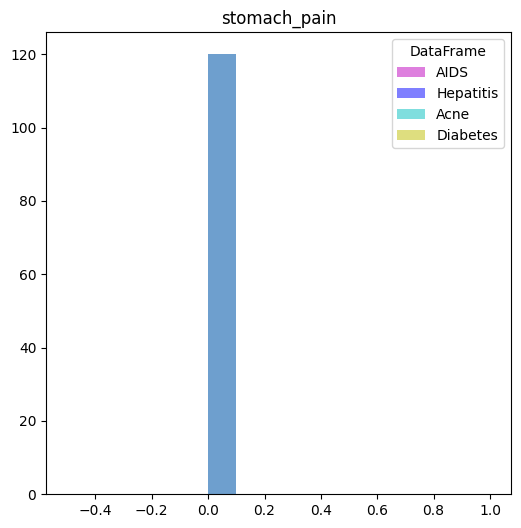

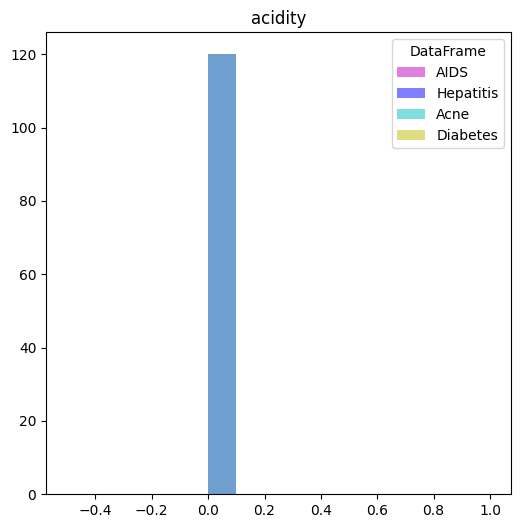

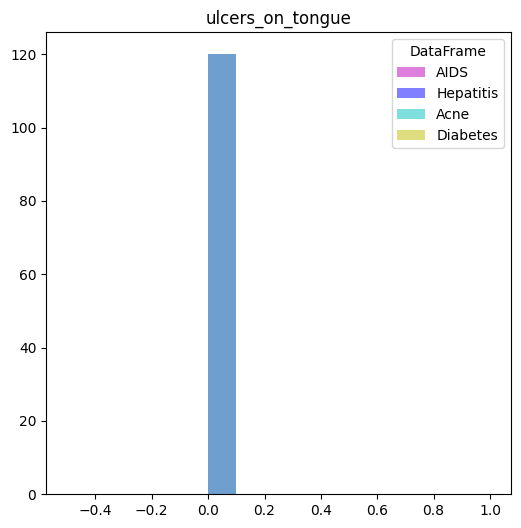

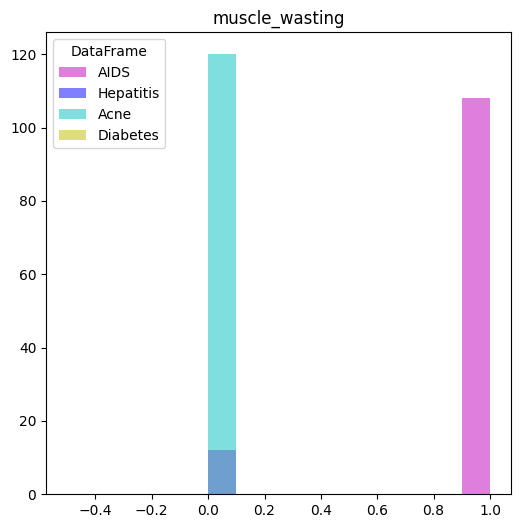

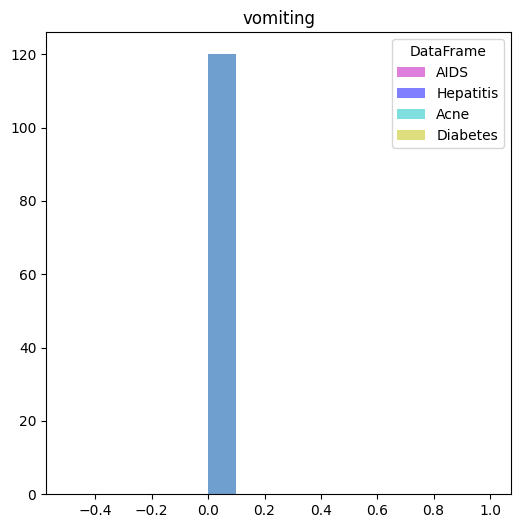

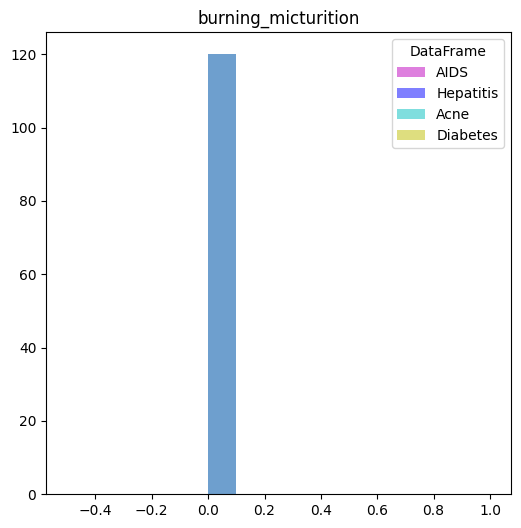

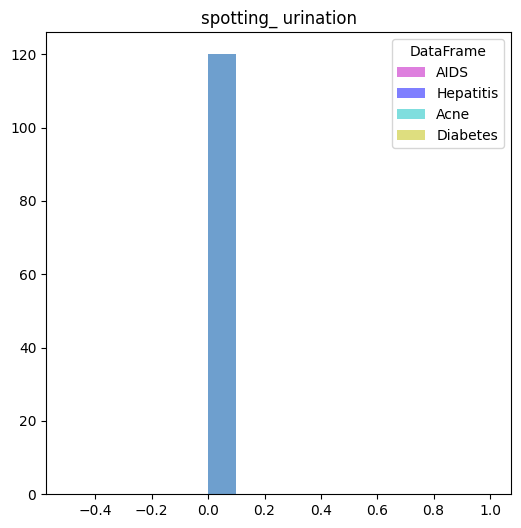

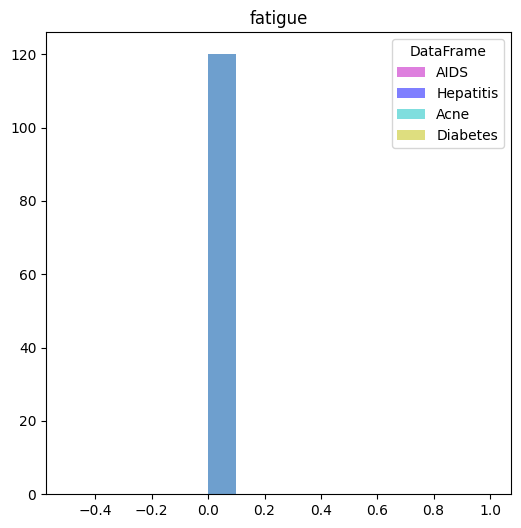

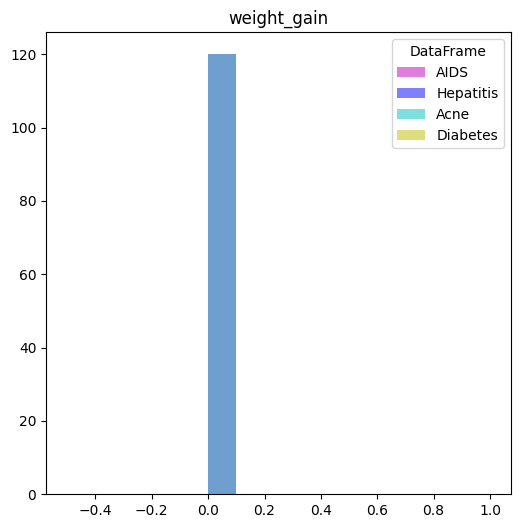

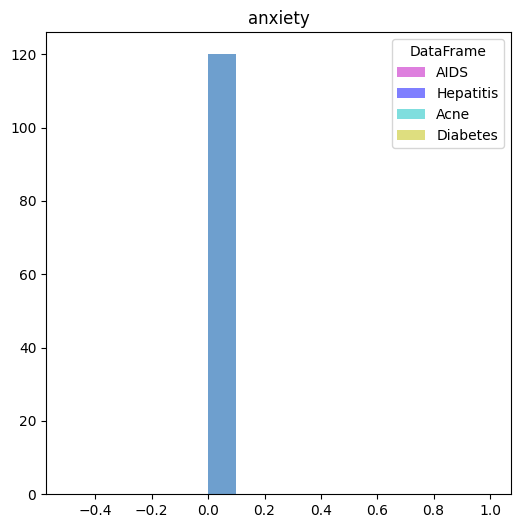

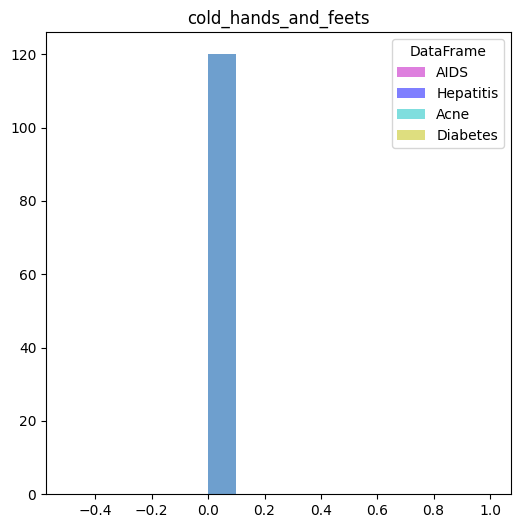

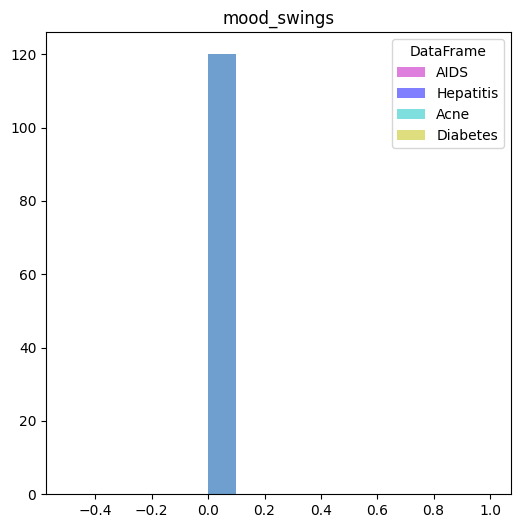

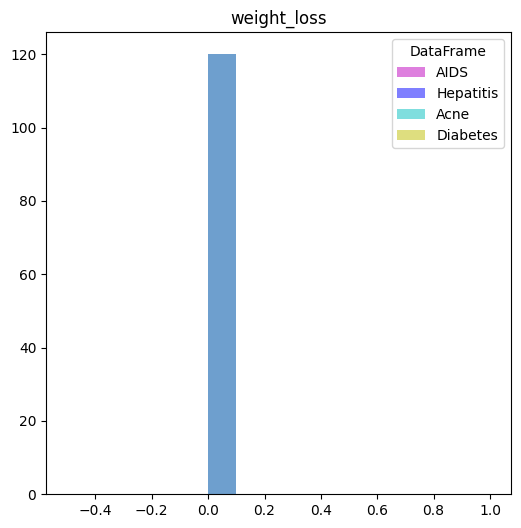

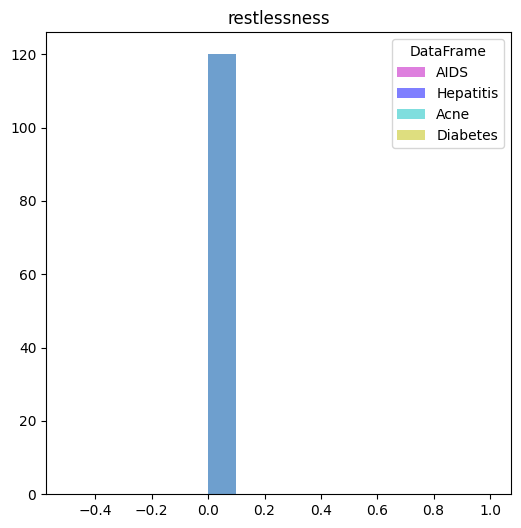

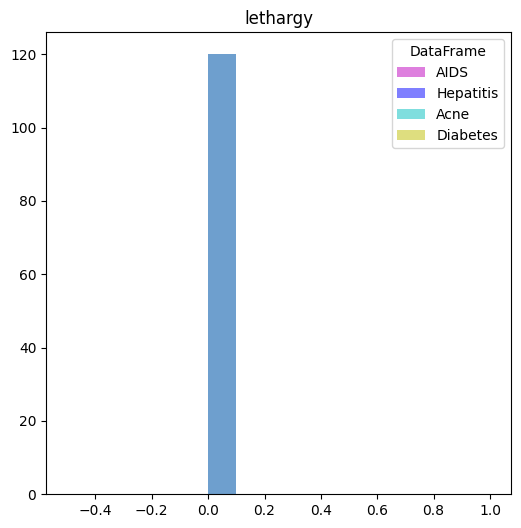

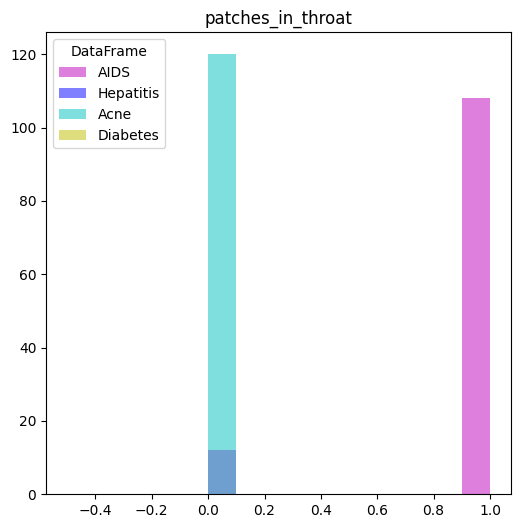

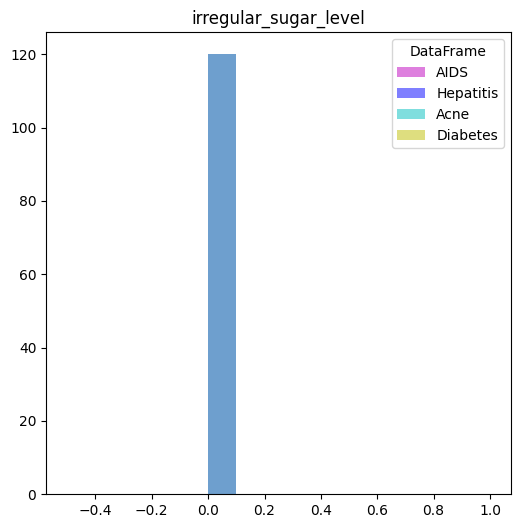

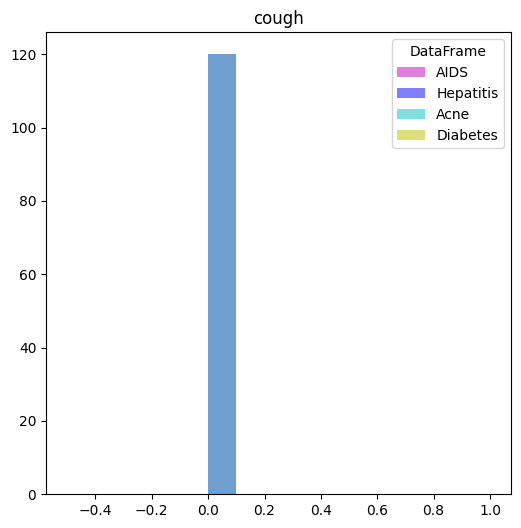

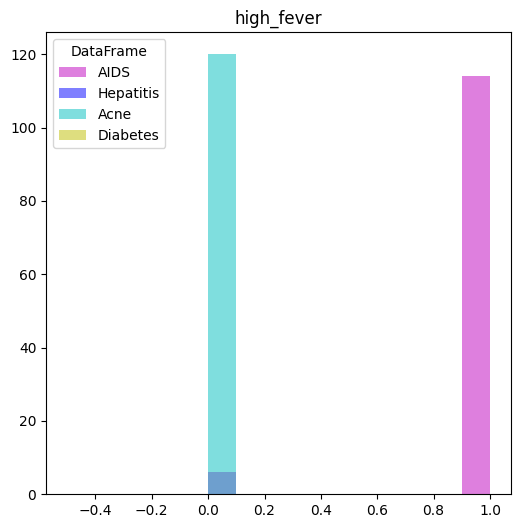

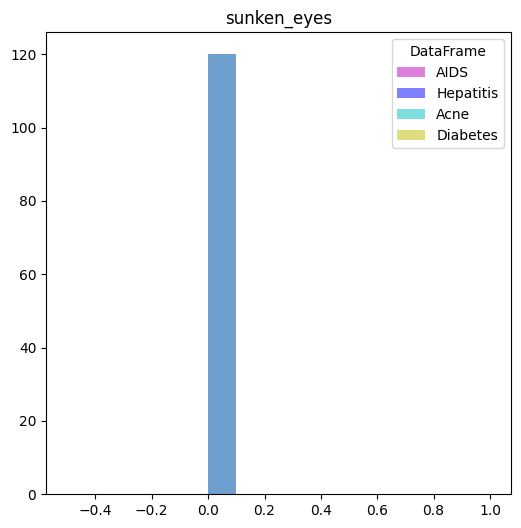

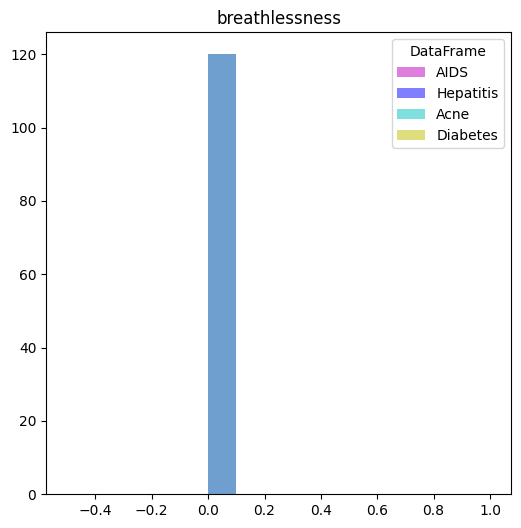

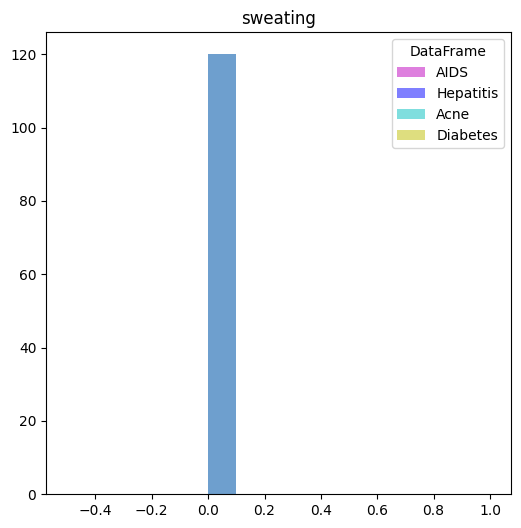

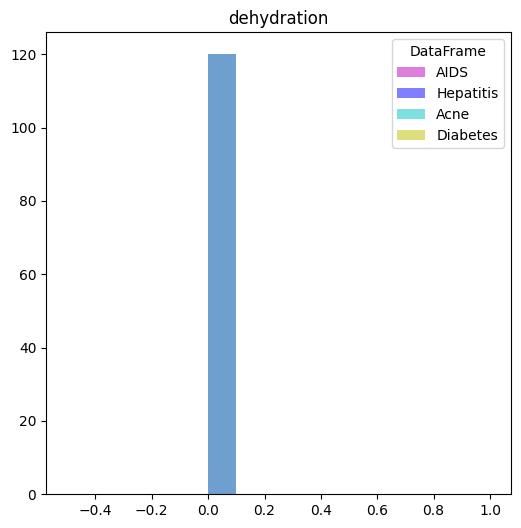

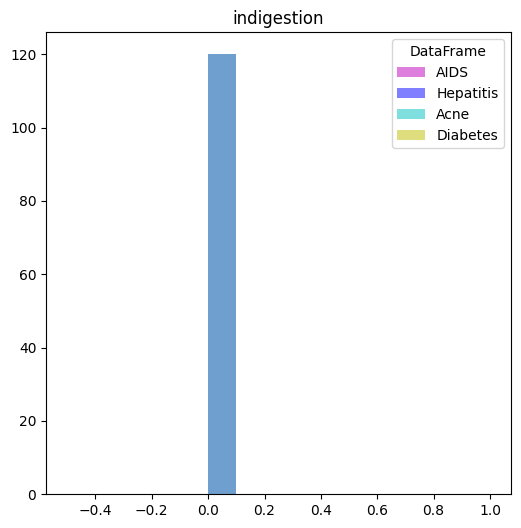

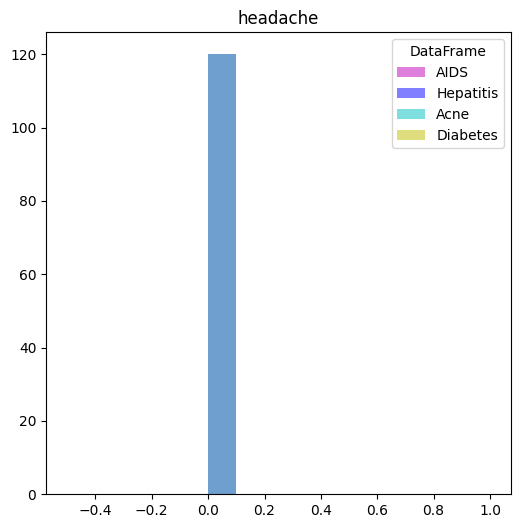

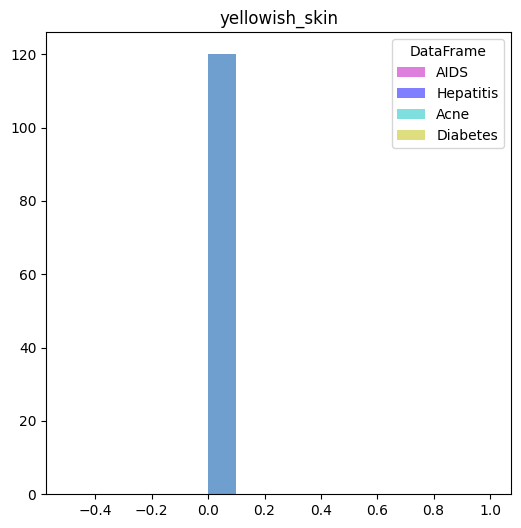

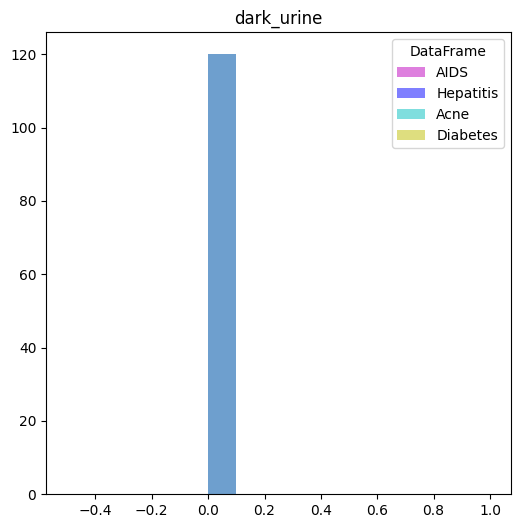

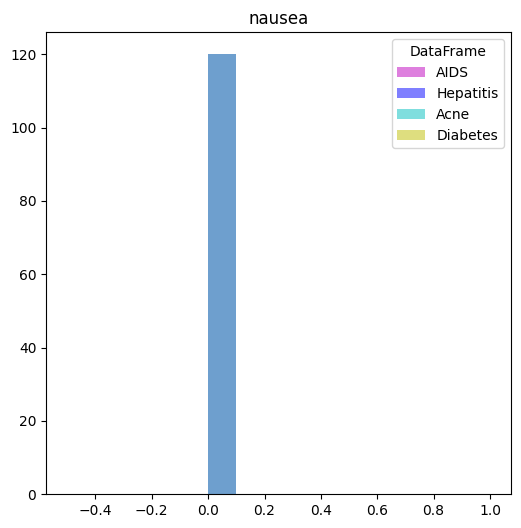

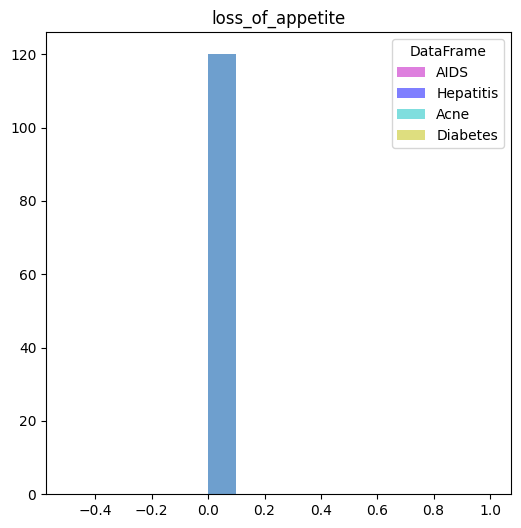

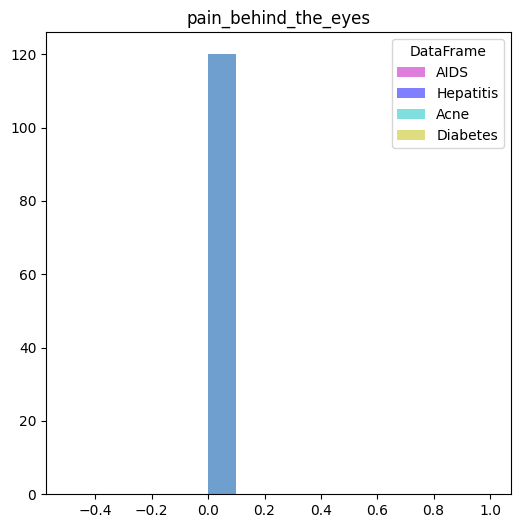

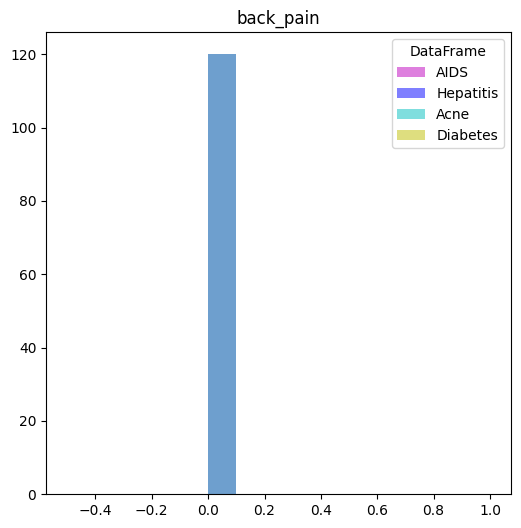

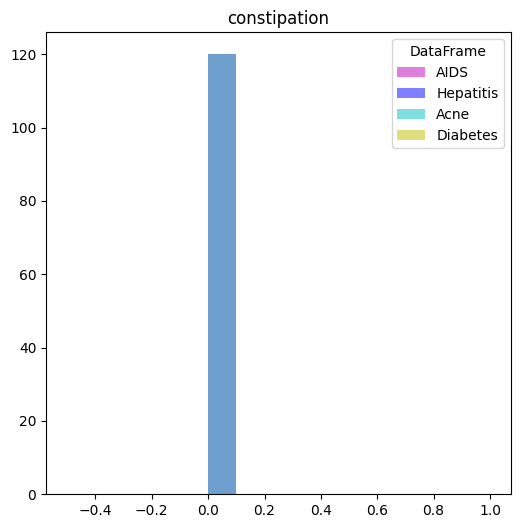

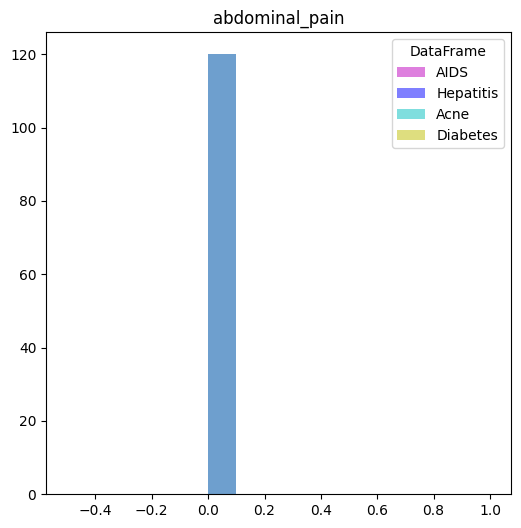

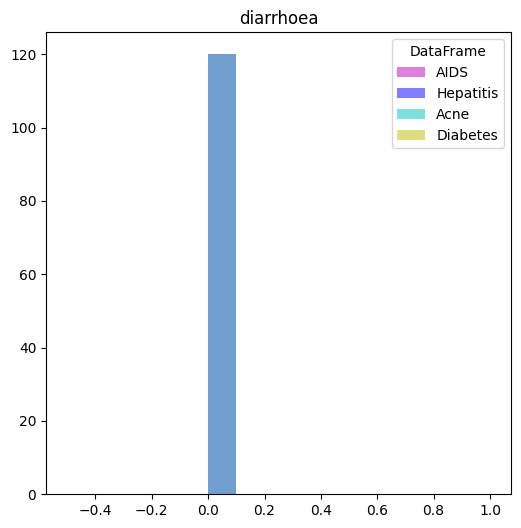

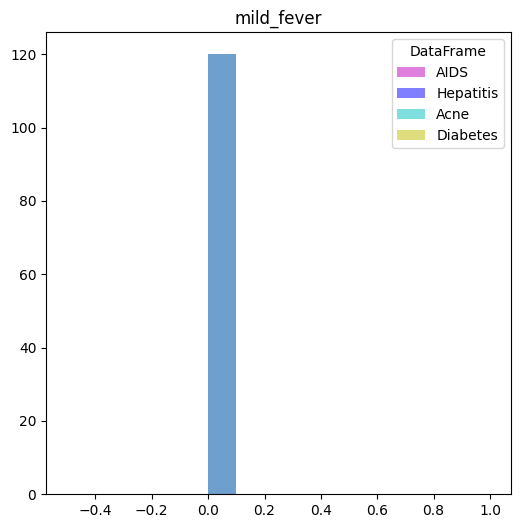

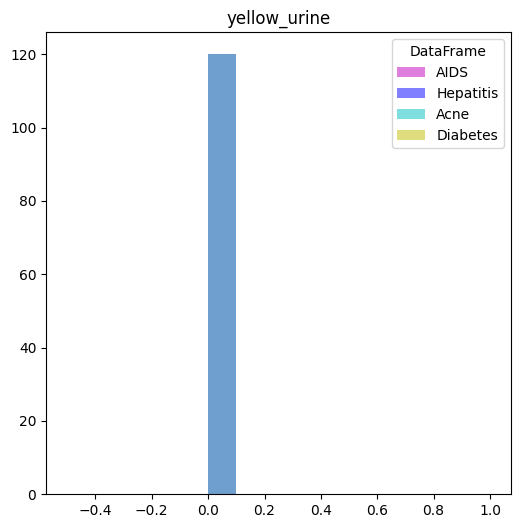

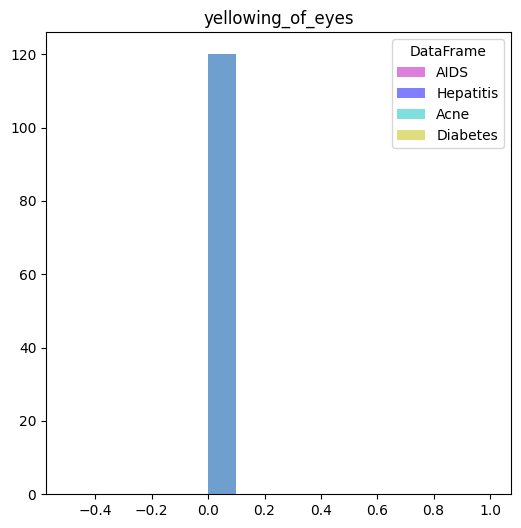

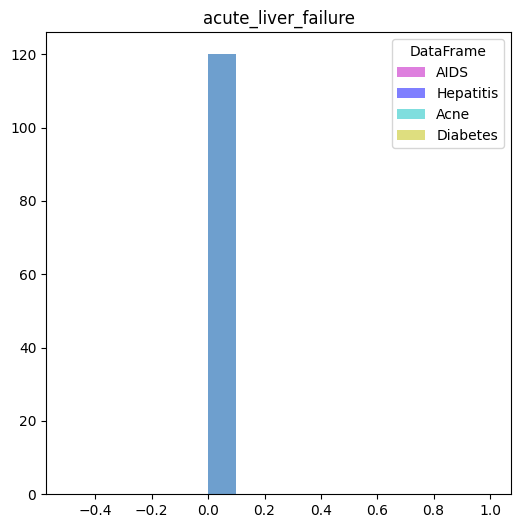

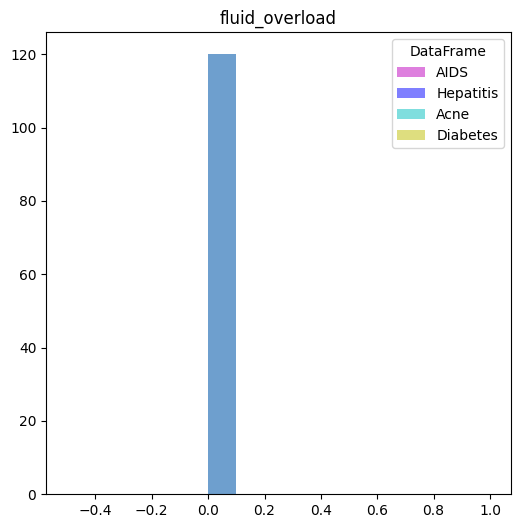

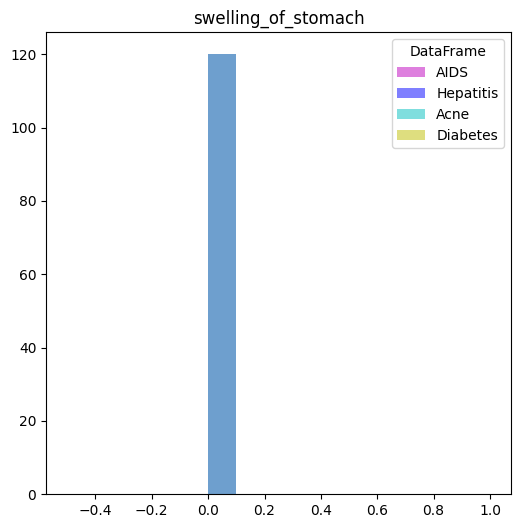

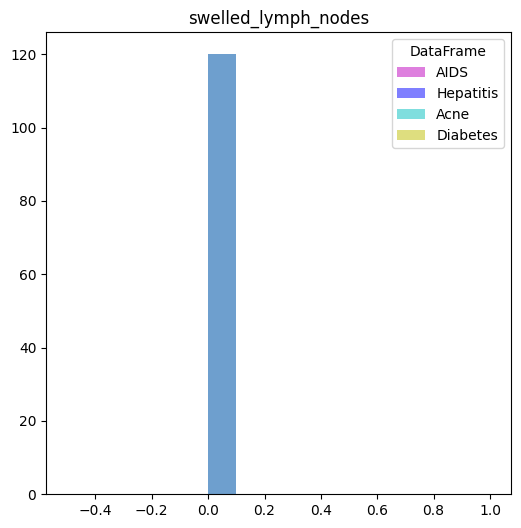

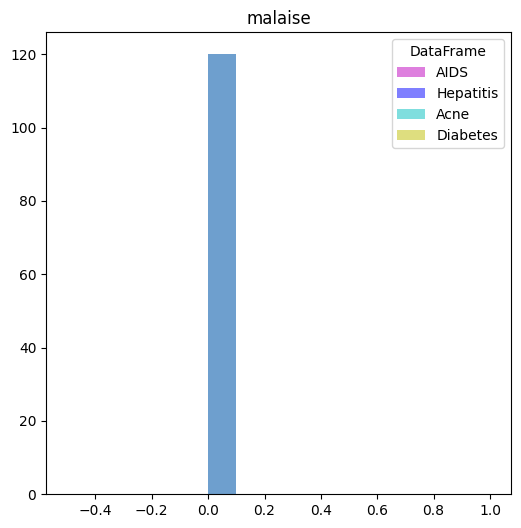

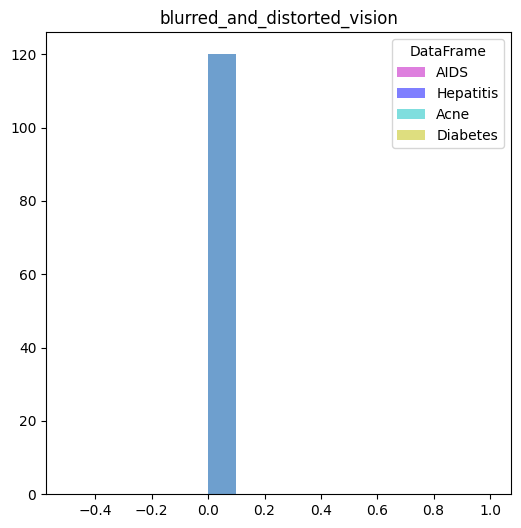

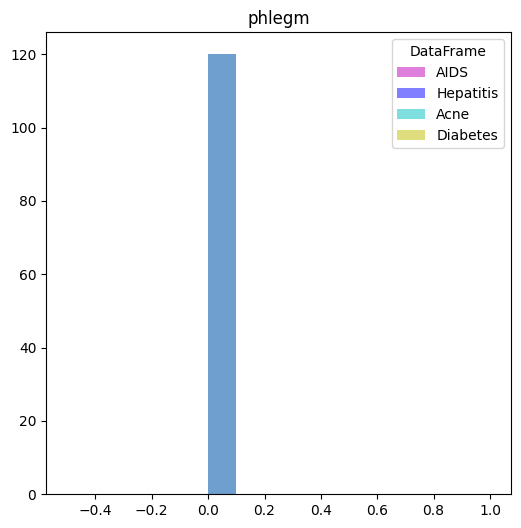

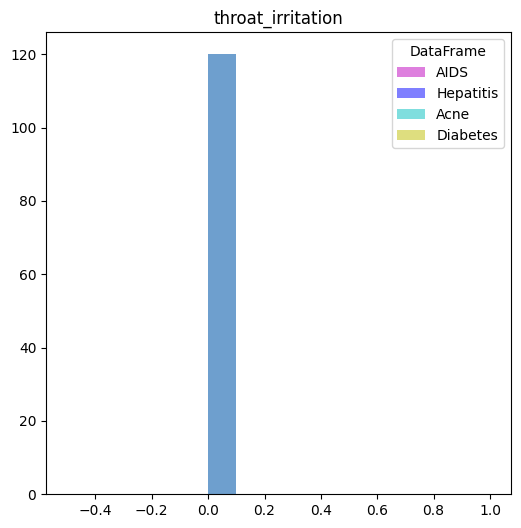

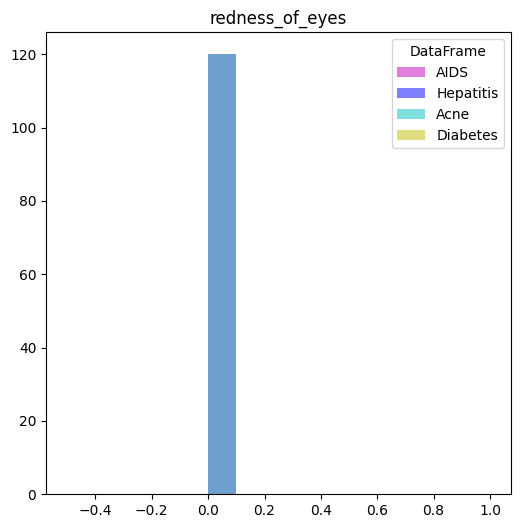

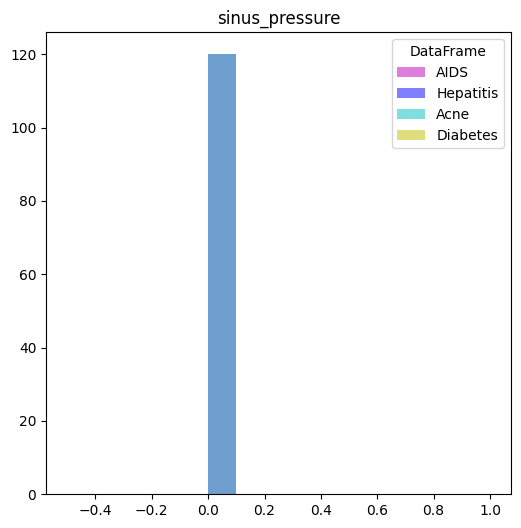

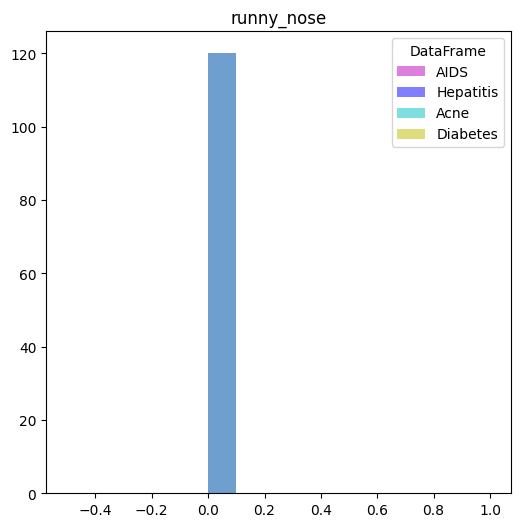

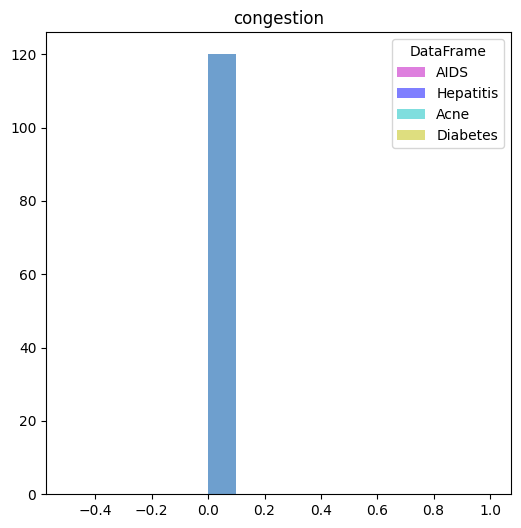

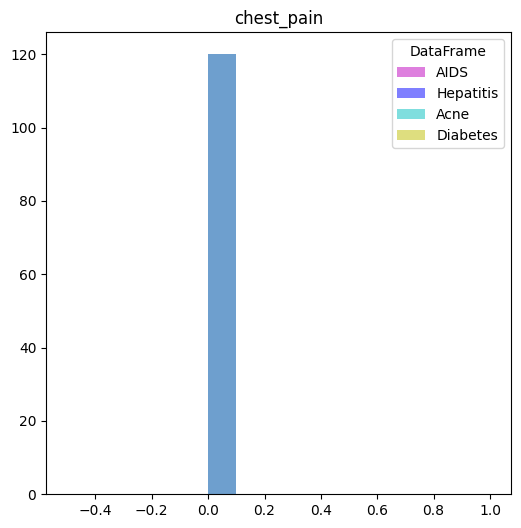

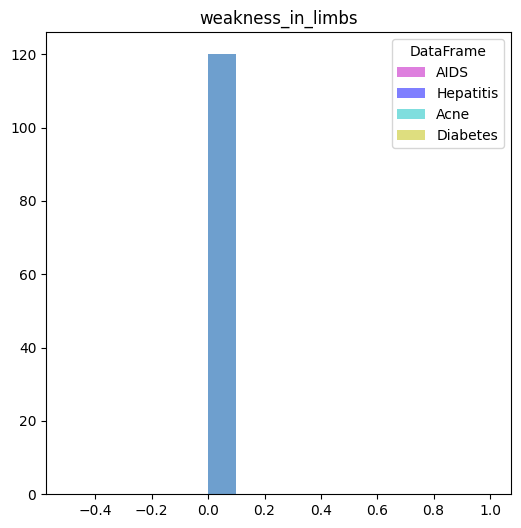

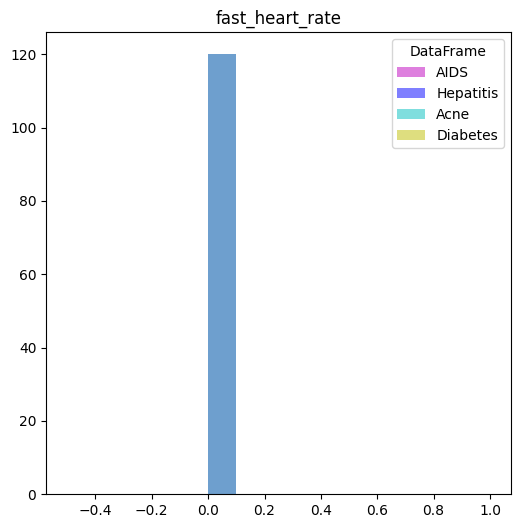

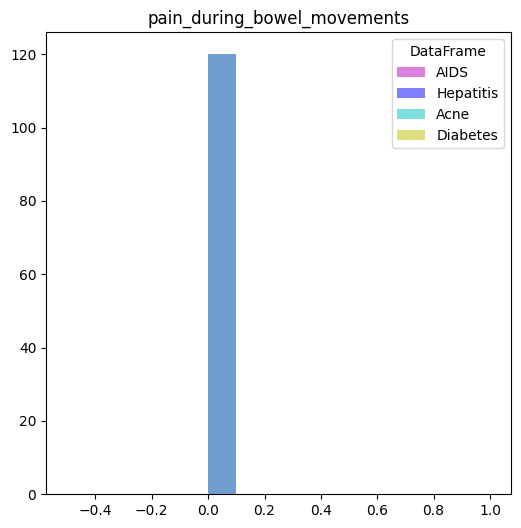

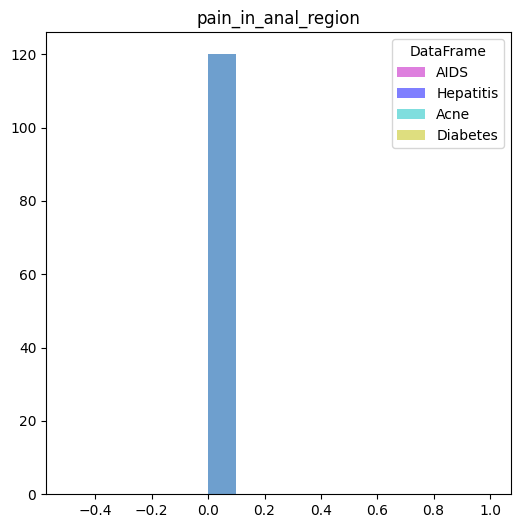

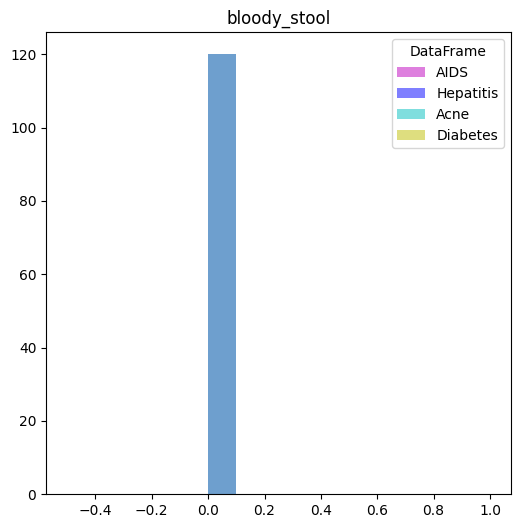

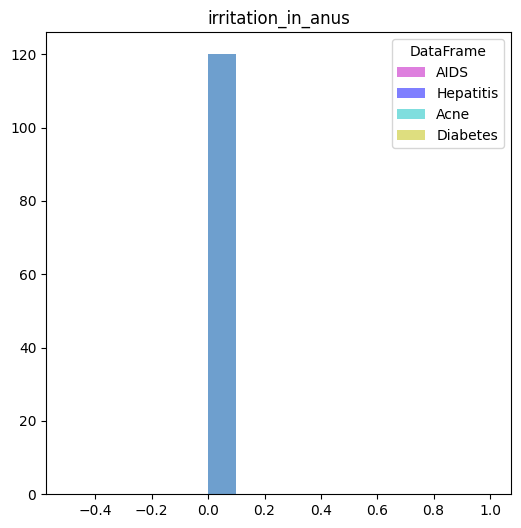

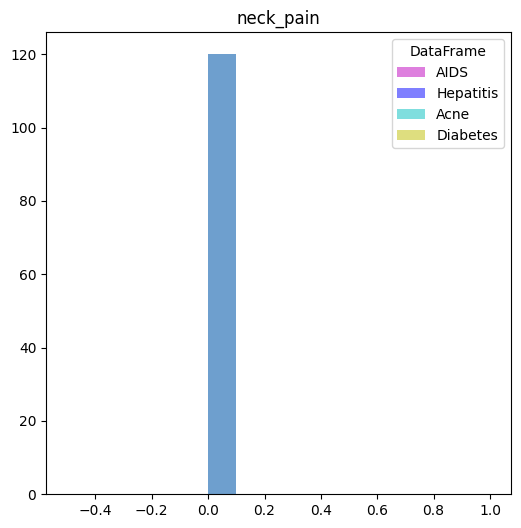

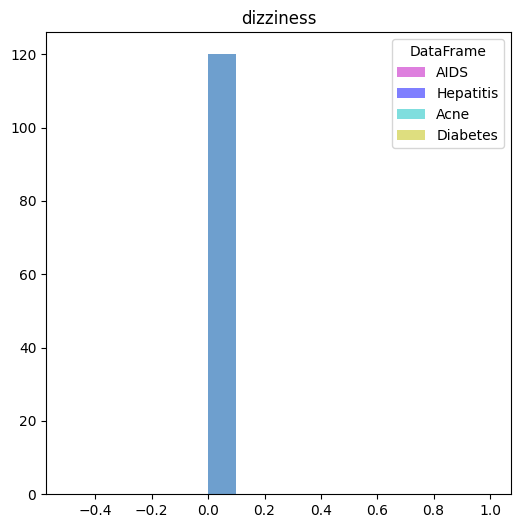

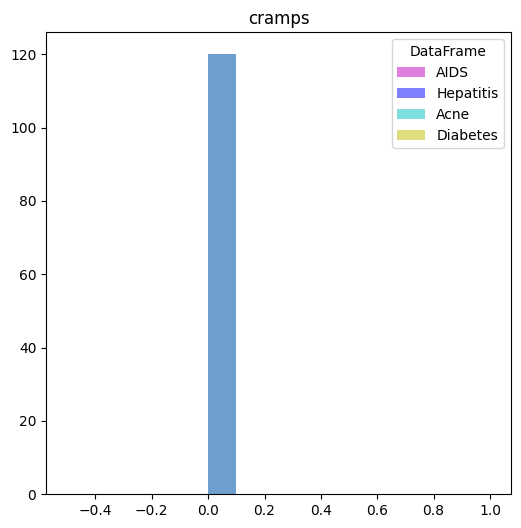

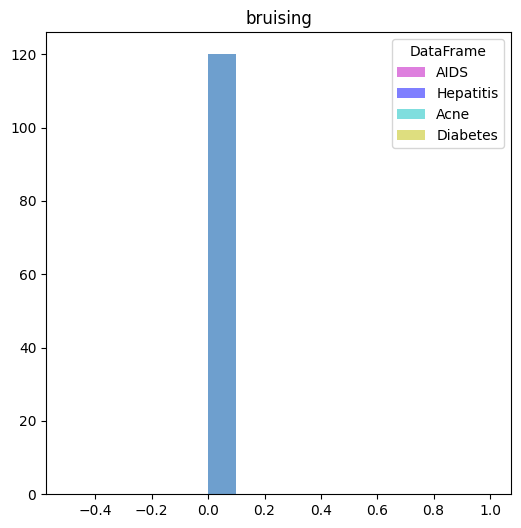

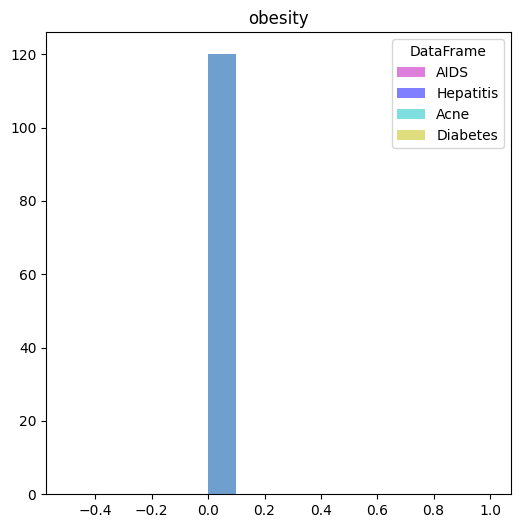

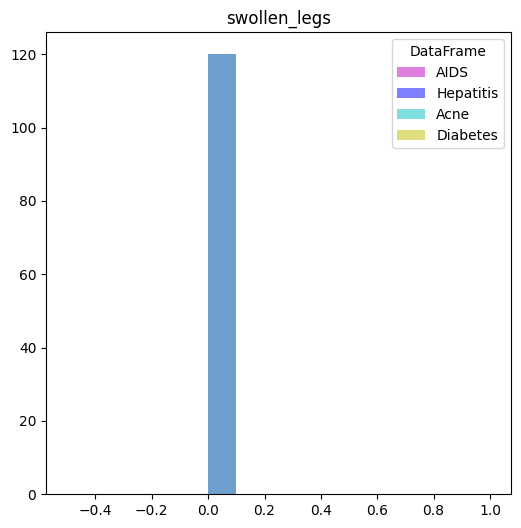

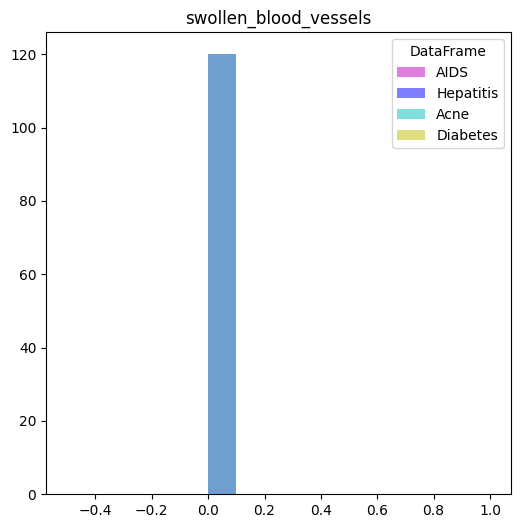

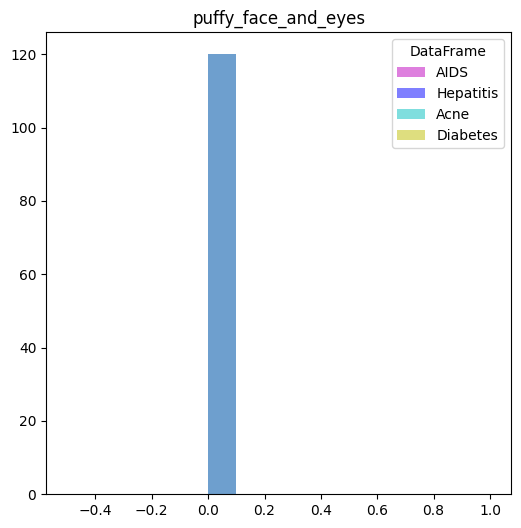

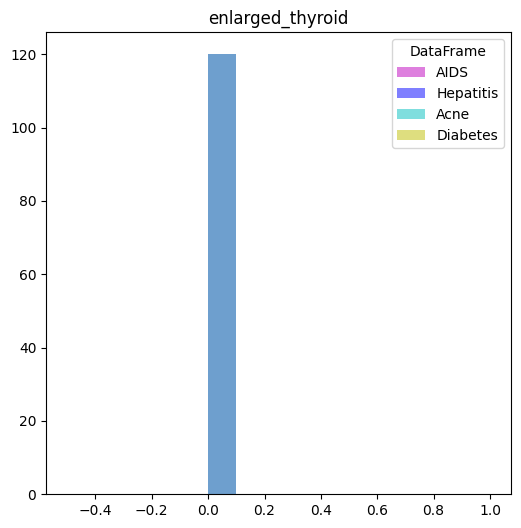

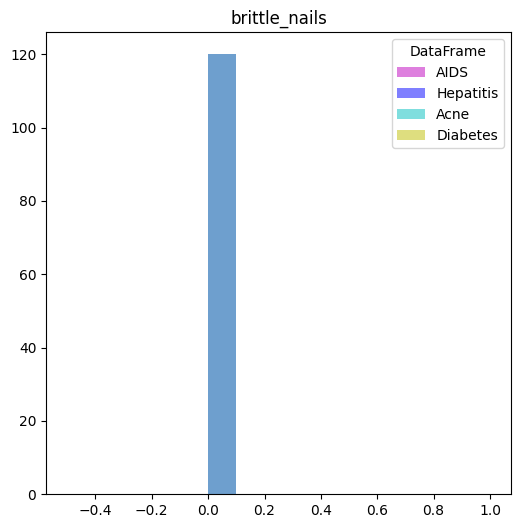

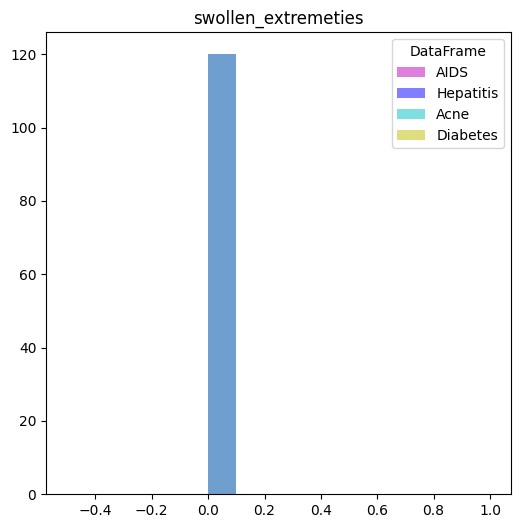

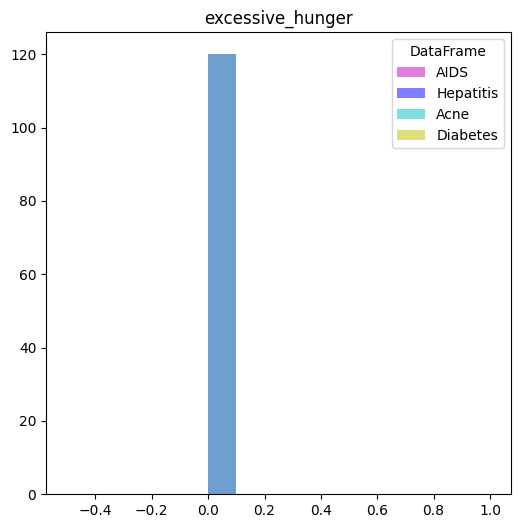

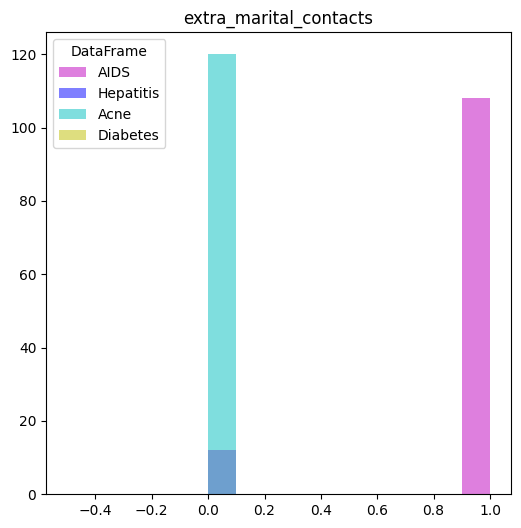

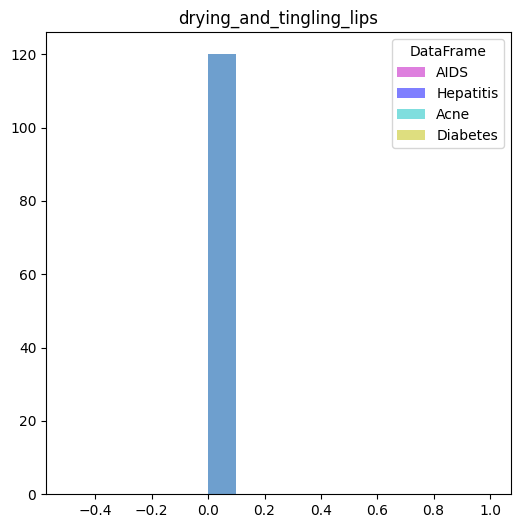

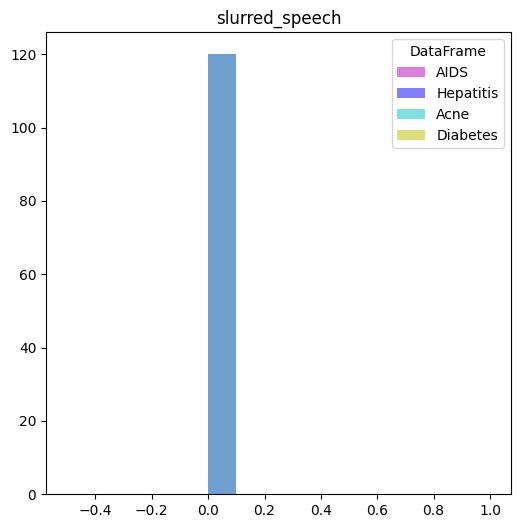

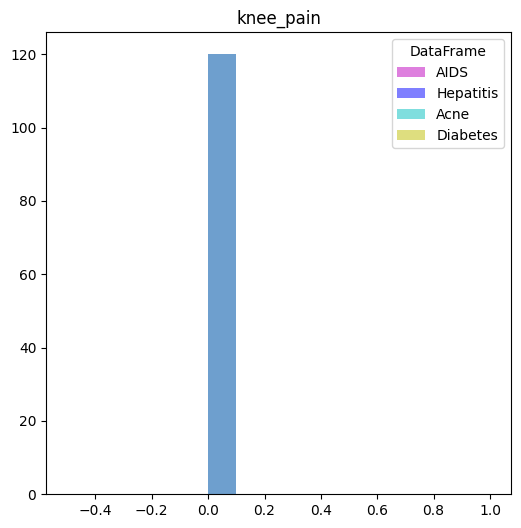

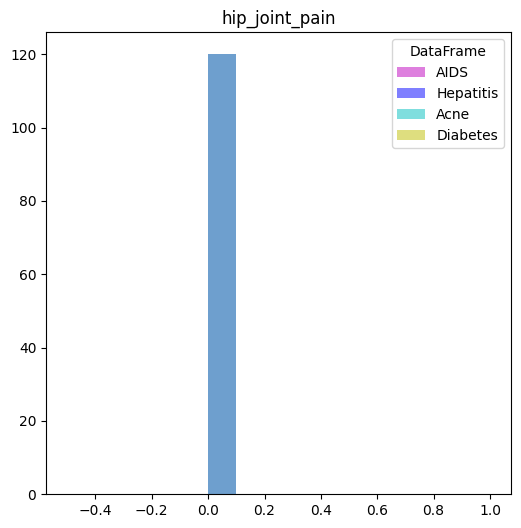

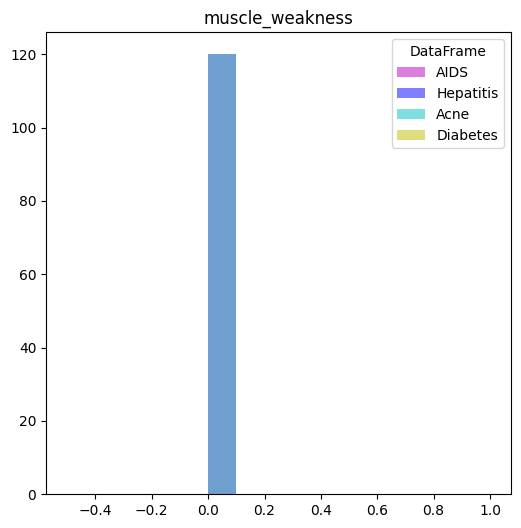

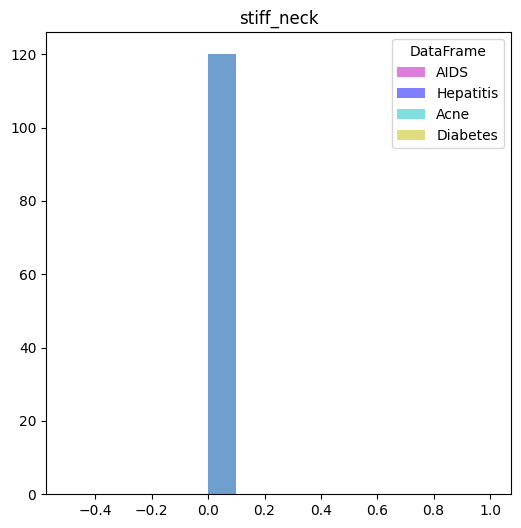

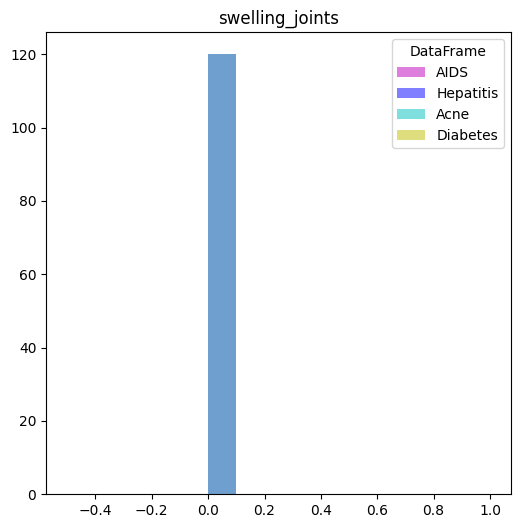

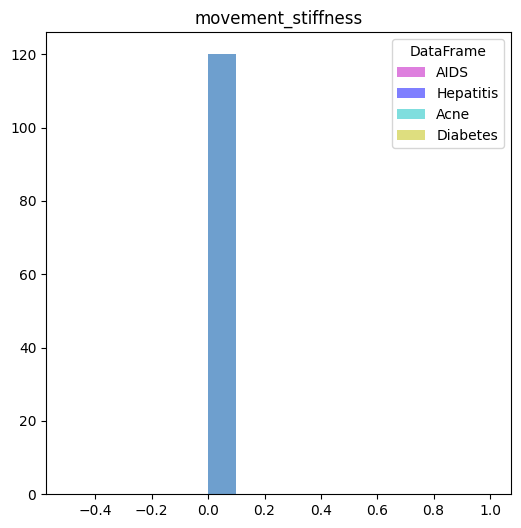

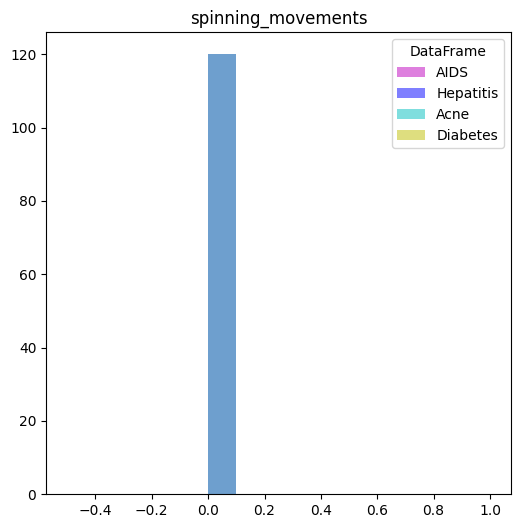

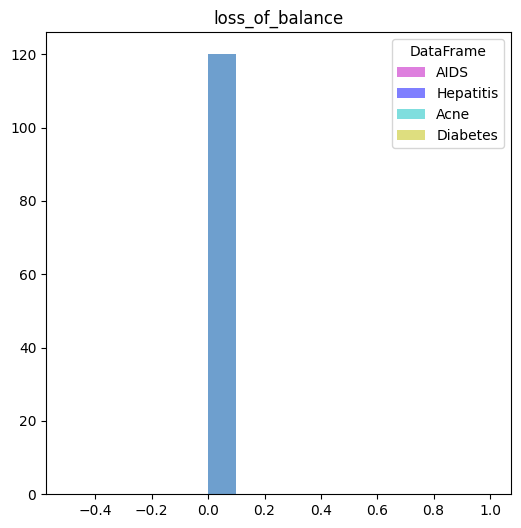

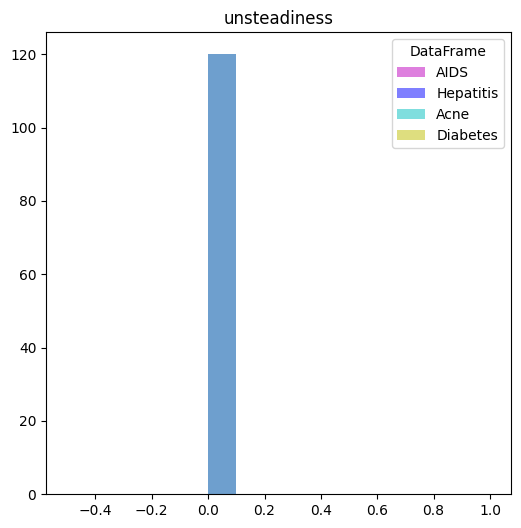

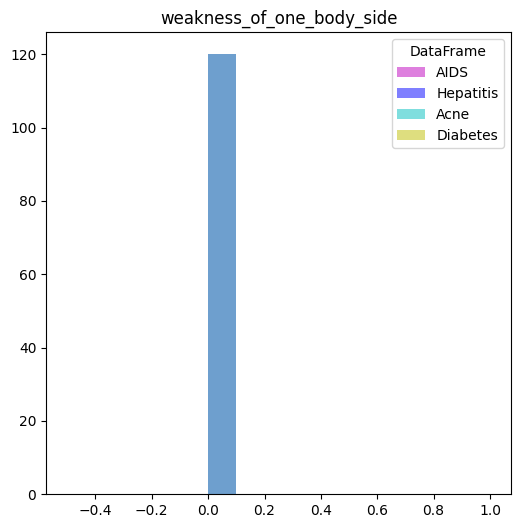

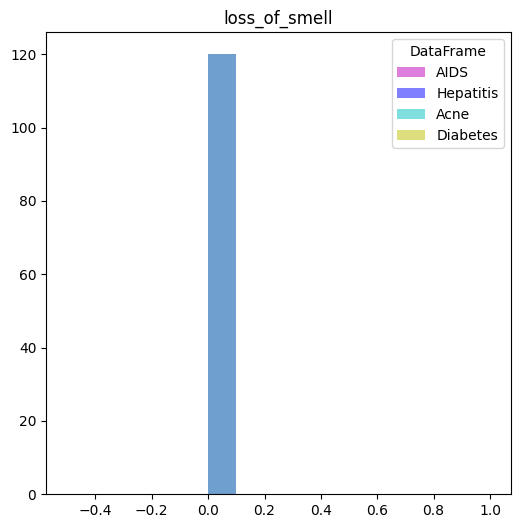

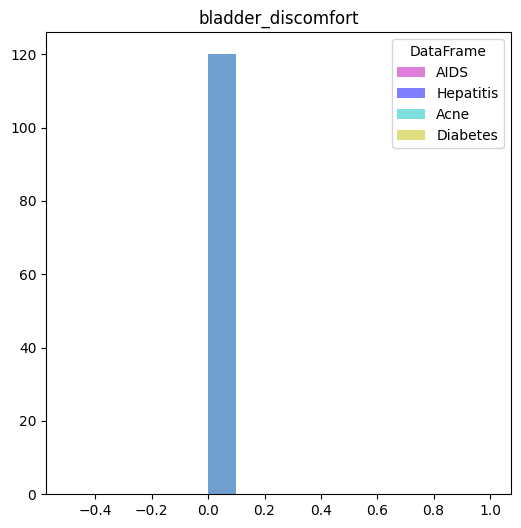

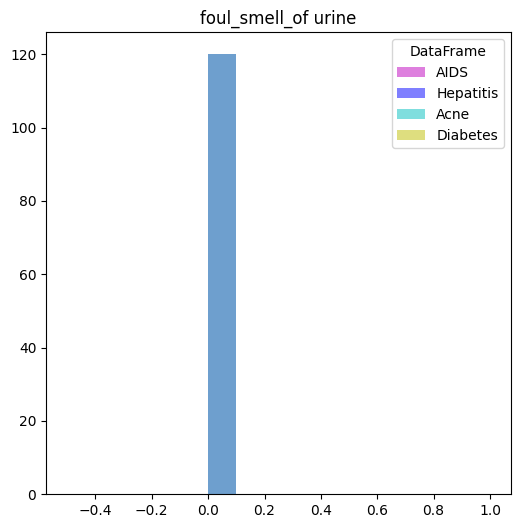

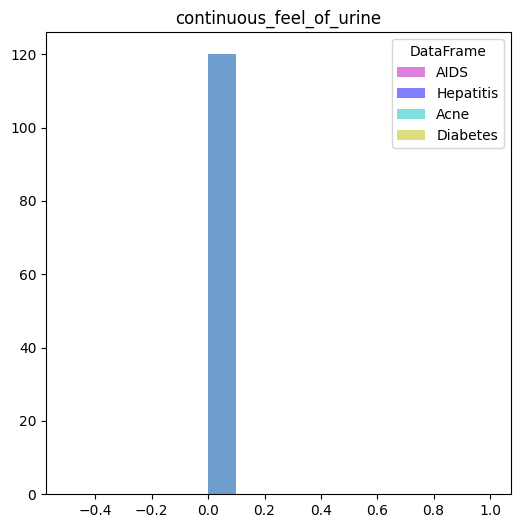

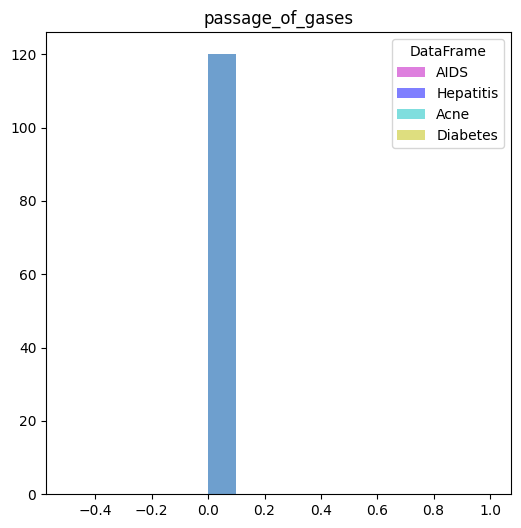

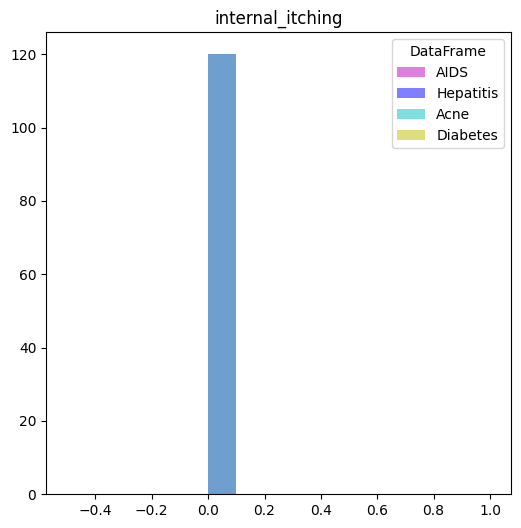

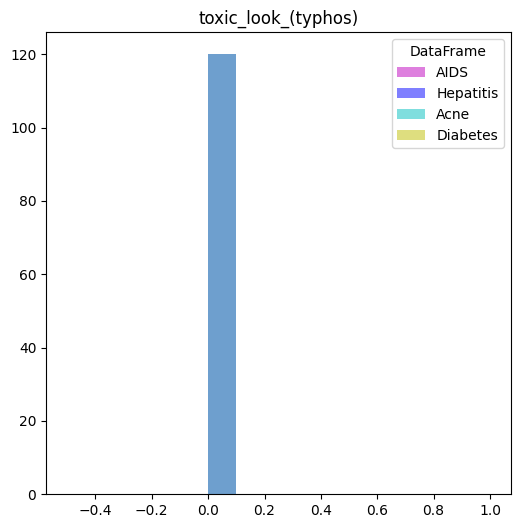

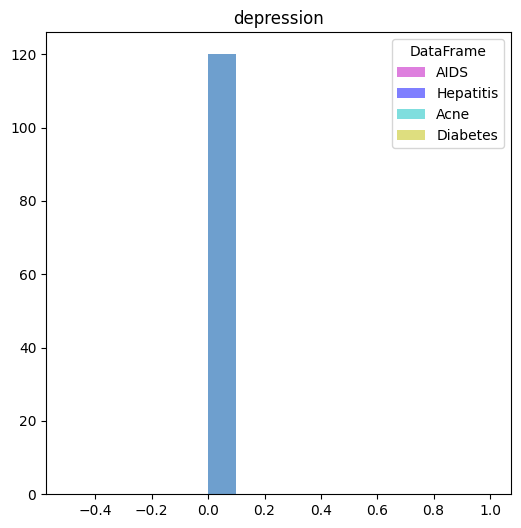

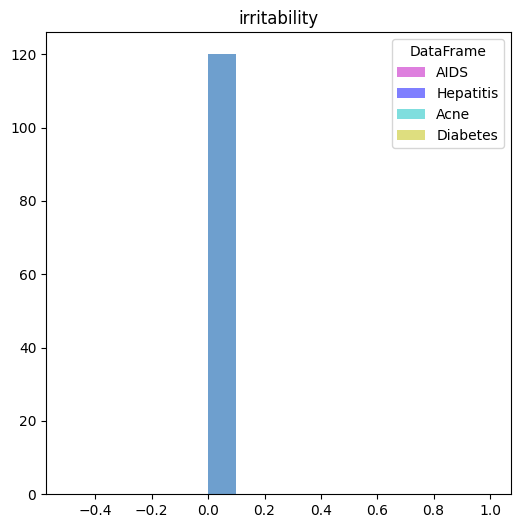

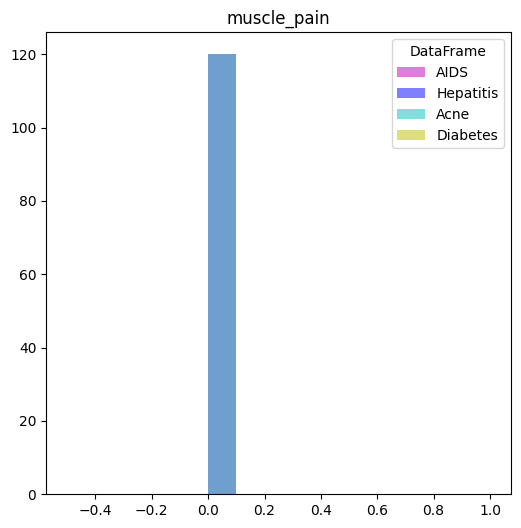

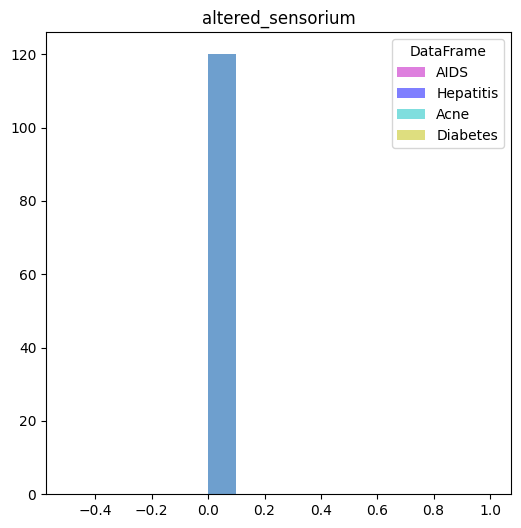

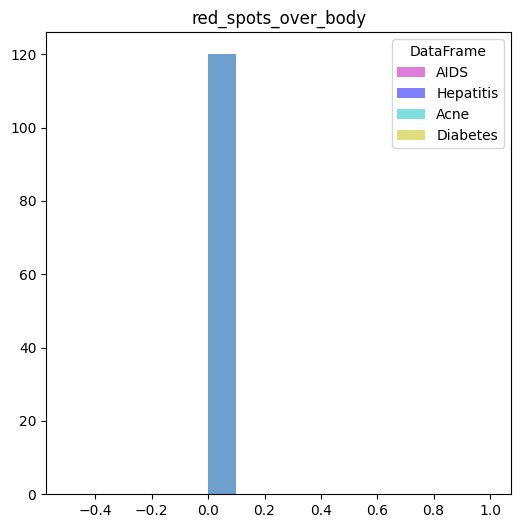

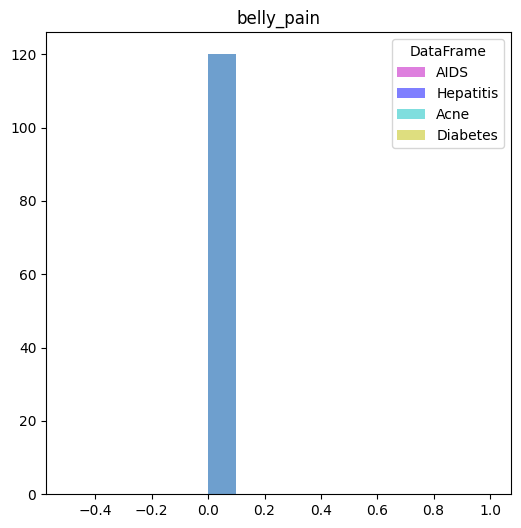

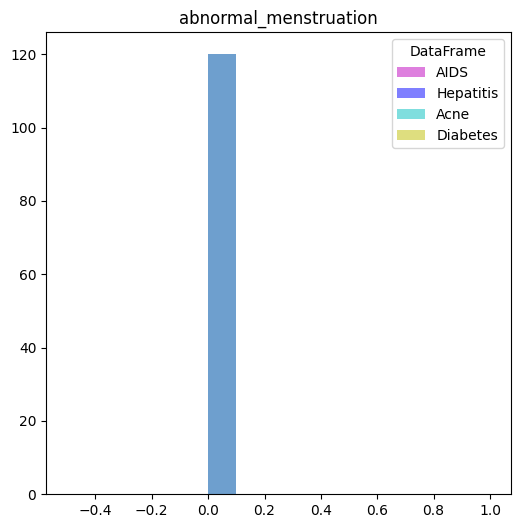

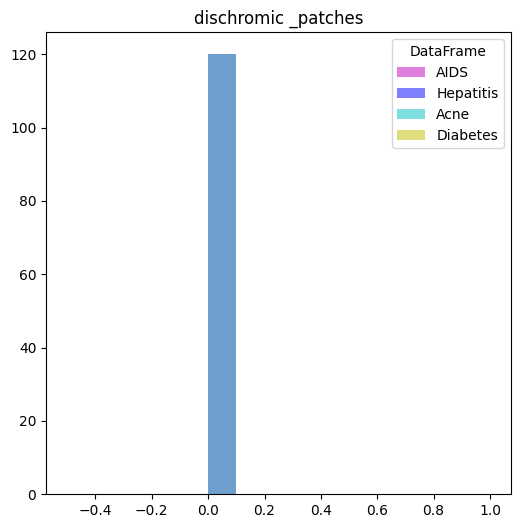

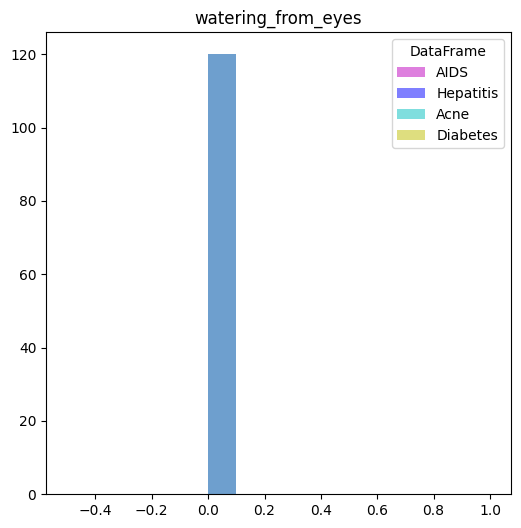

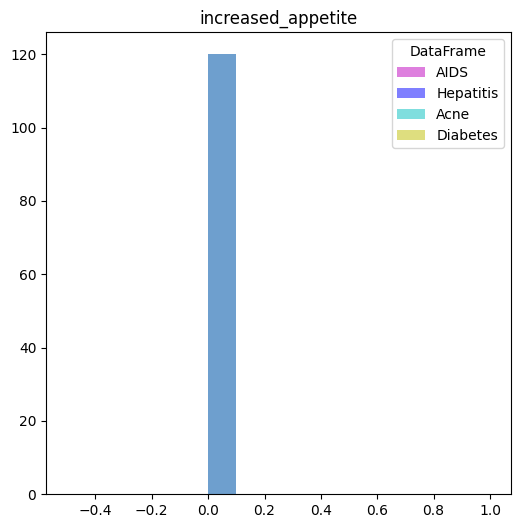

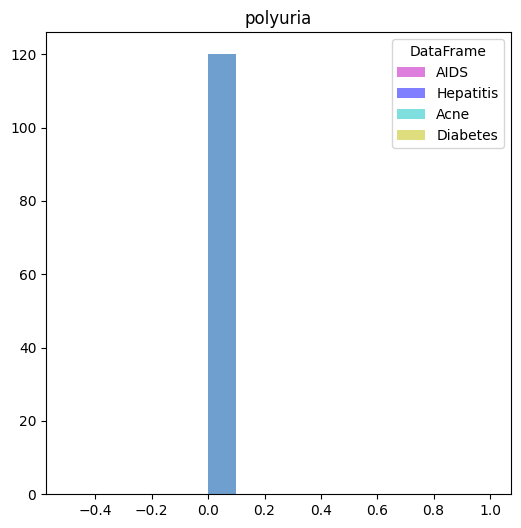

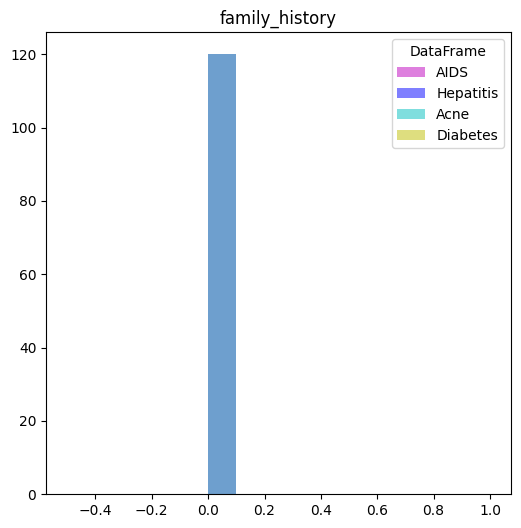

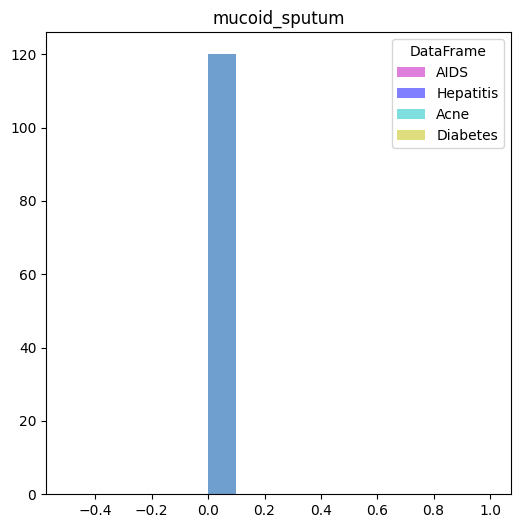

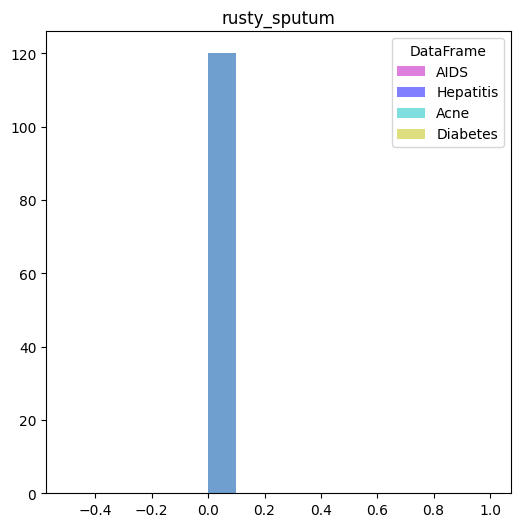

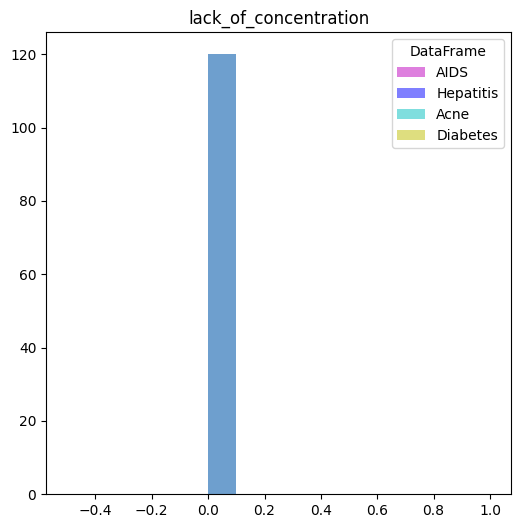

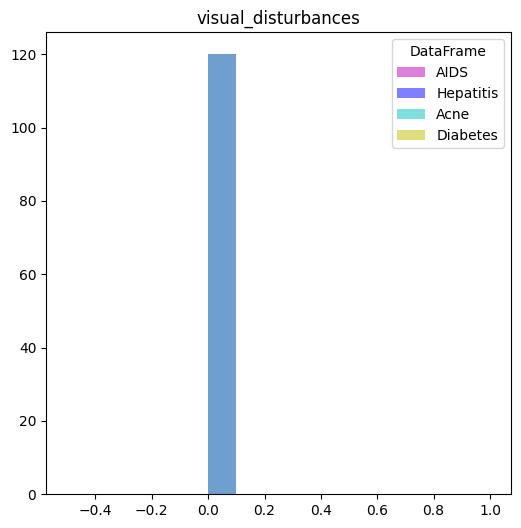

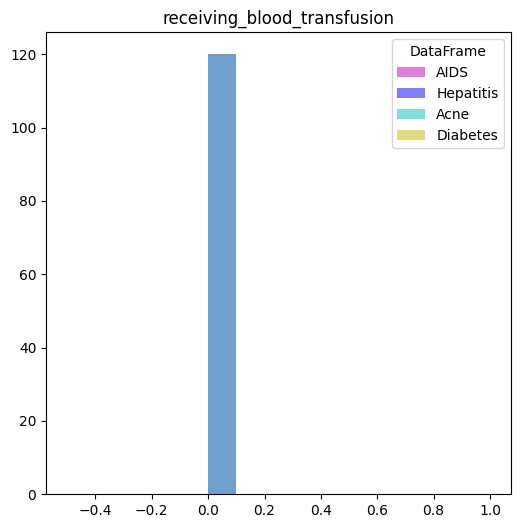

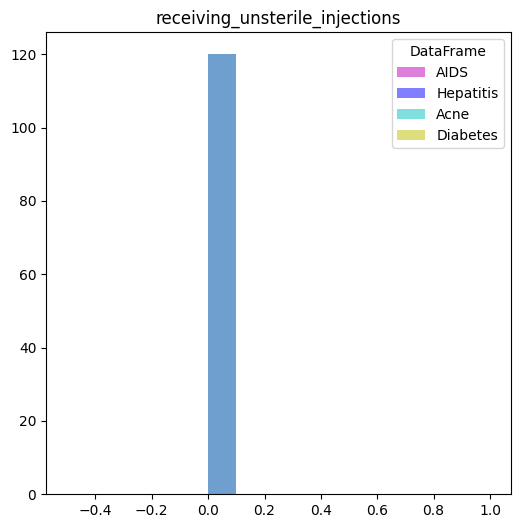

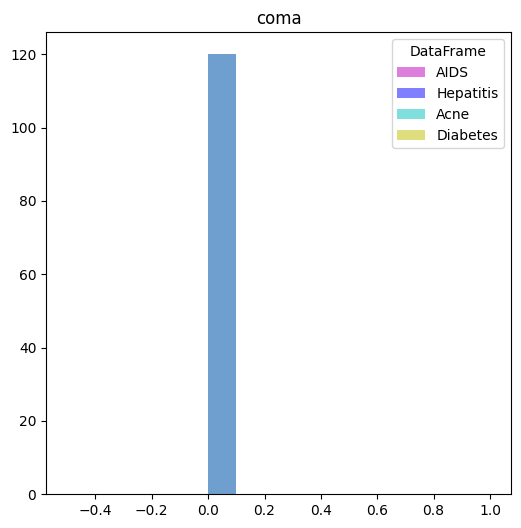

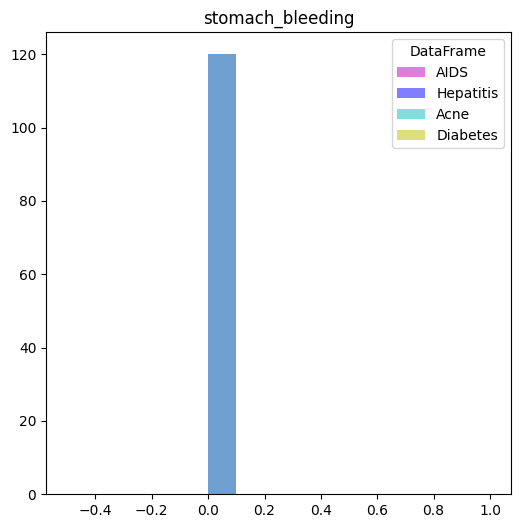

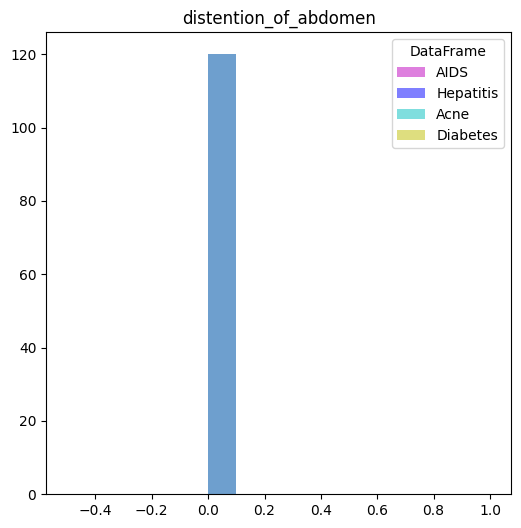

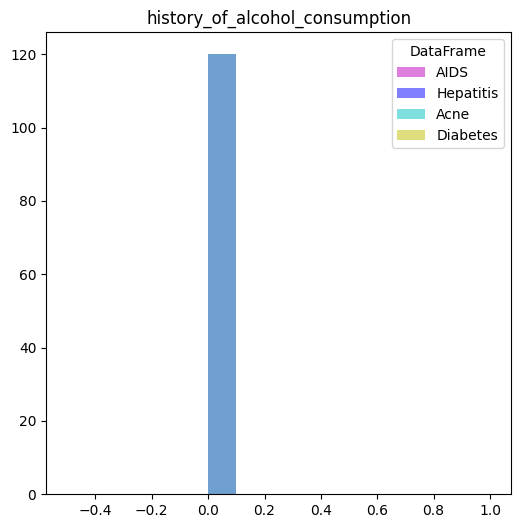

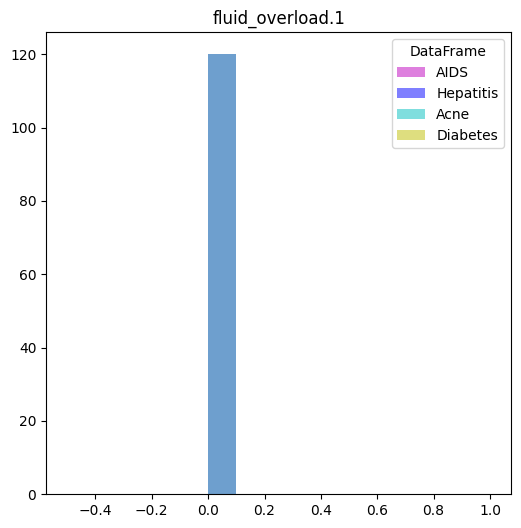

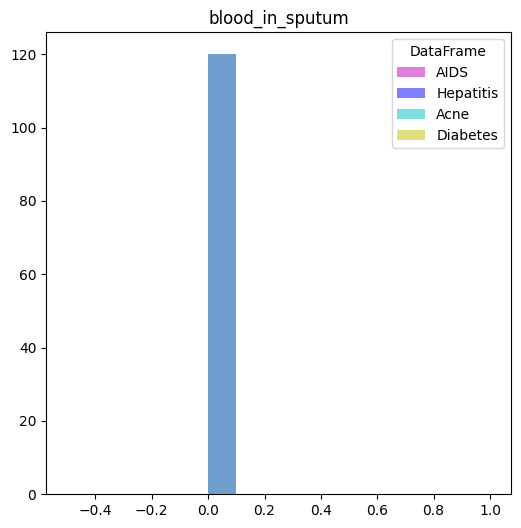

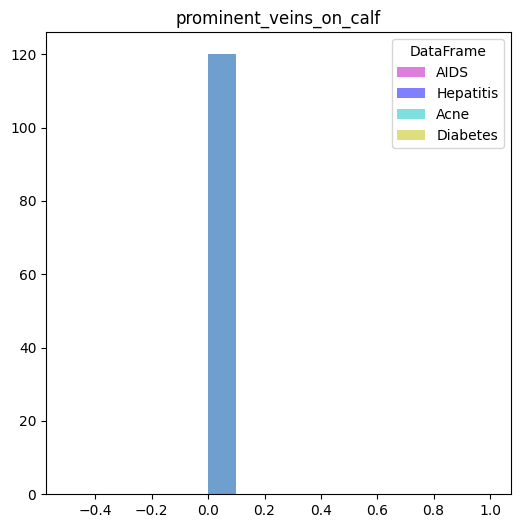

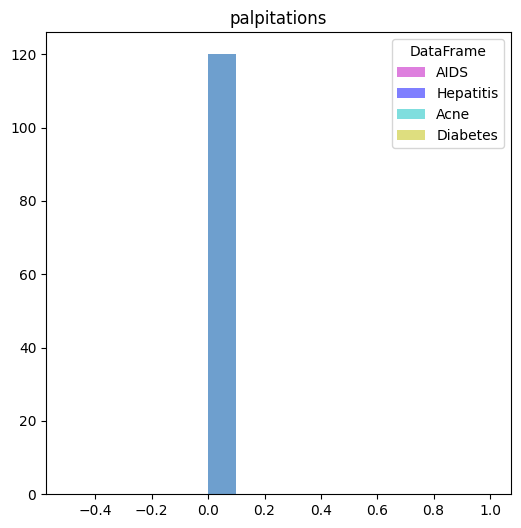

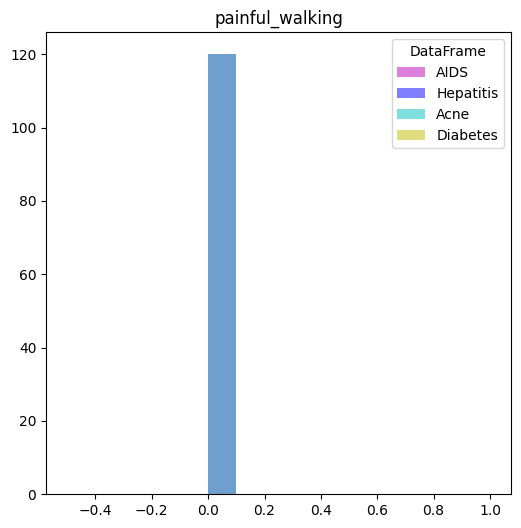

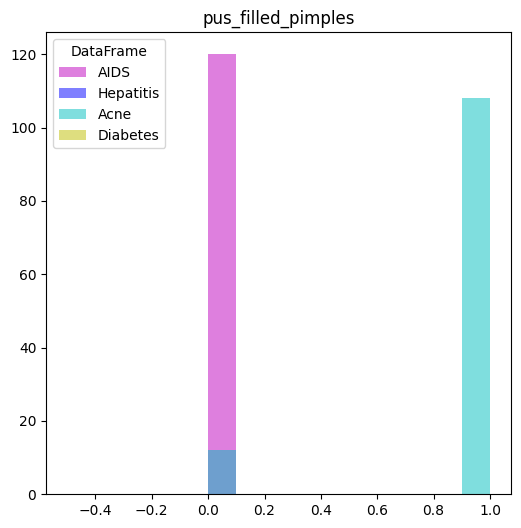

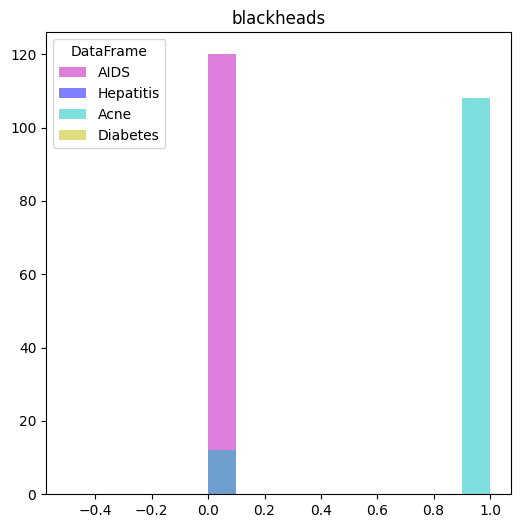

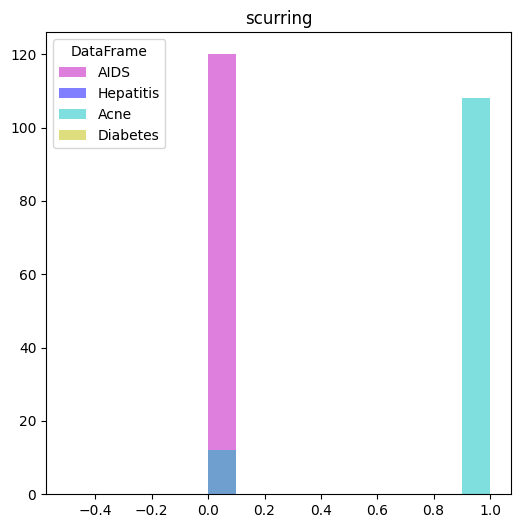

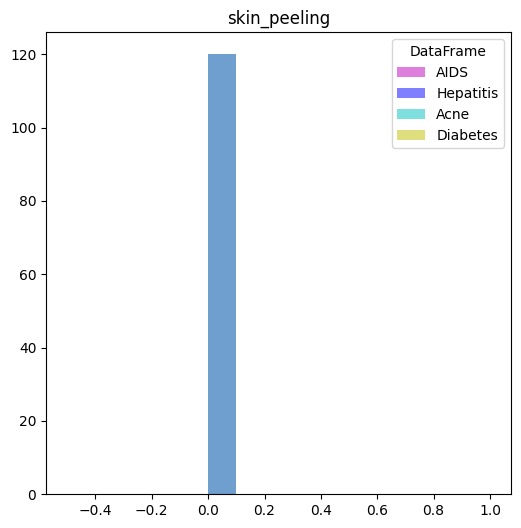

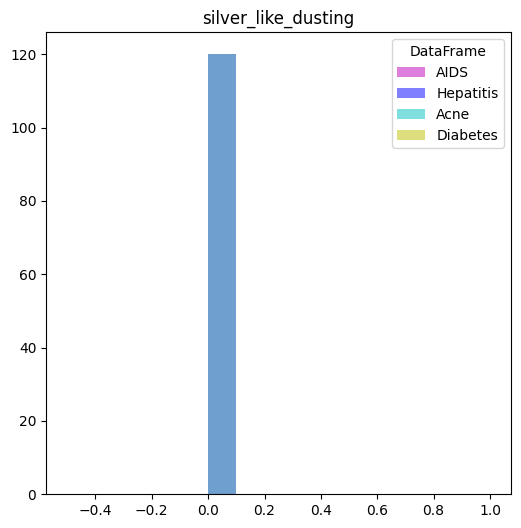

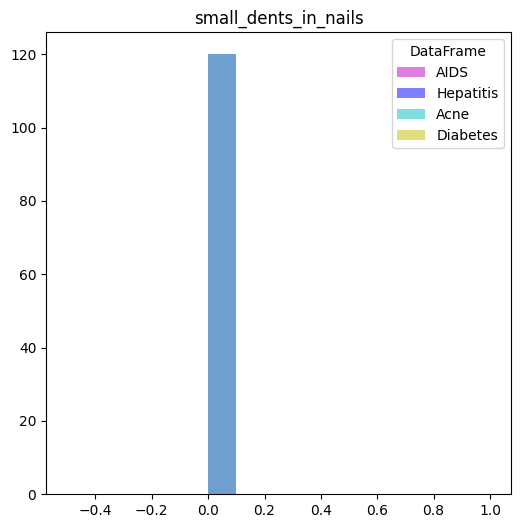

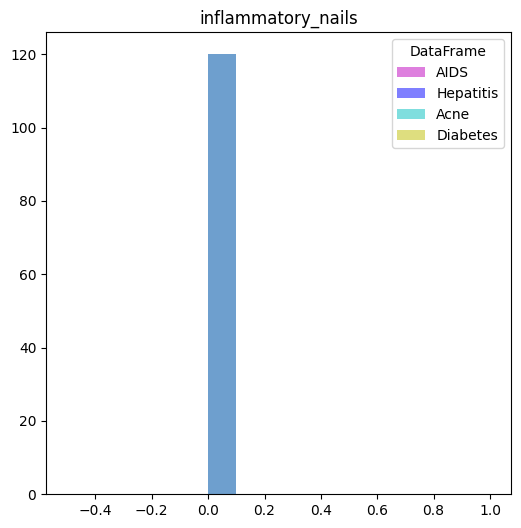

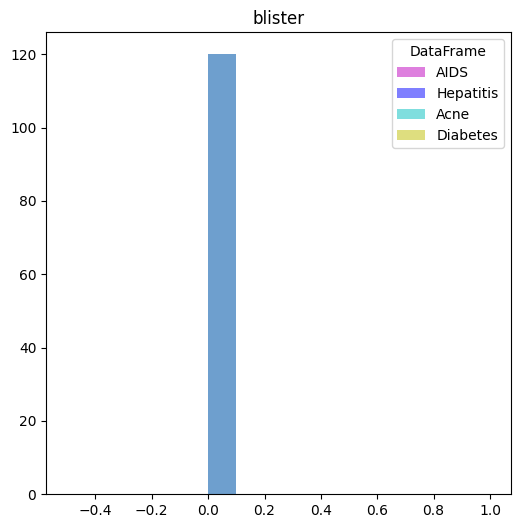

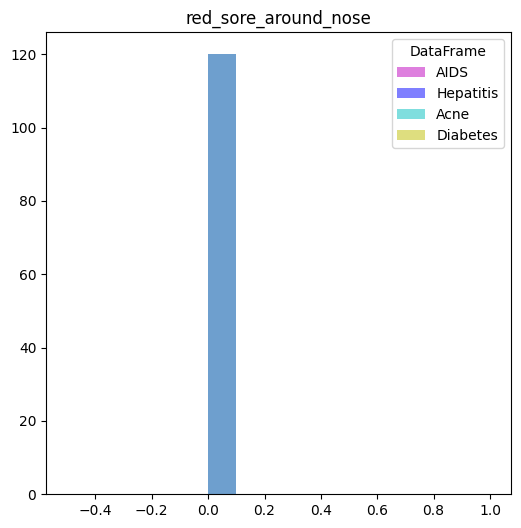

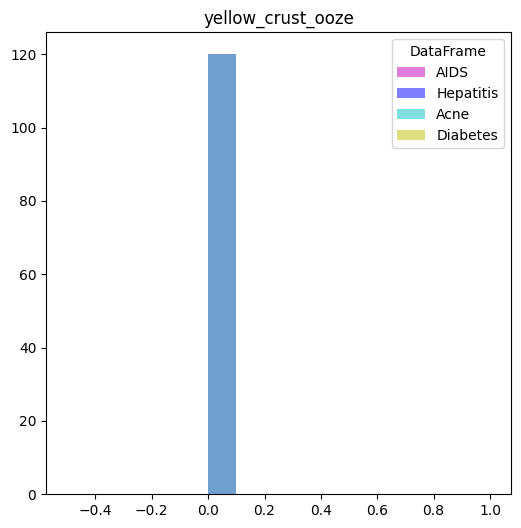

In [11]:
for column in df_train[FEATURES_COLS].columns:
        plt.figure(figsize=(6,6))
        plt.hist(x=column, data=df_train[df_train['prognosis']=='AIDS'], color='m', alpha = 0.5)
        plt.hist(x=column, data=df_train[df_train['prognosis']=='Hepatitis'], color='b', alpha = 0.5)
        plt.hist(x=column, data=df_train[df_train['prognosis']=='Acne'], color='c', alpha = 0.5)
        plt.hist(x=column, data=df_train[df_train['prognosis']=='Diabetes'], color='y', alpha = 0.5)
        plt.title(column)
        plt.legend(['AIDS','Hepatitis','Acne','Diabetes'],title='DataFrame')
        plt.show()

In [ ]:
correl = df_train[FEATURES_COLS].corr()

plt.figure(figsize=(40,20))
sns.heatmap(correl, annot = True, cmap = 'coolwarm')
plt.show()

### Encoding

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats as st
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
import statsmodels.api as sm
from scipy.stats import ttest_ind, f_oneway, kruskal, levene
from statsmodels.stats.multicomp import MultiComparison

df_train = pd.read_csv('C:\\Users\\Daniil\\Desktop\\Python\\hse_project\\tests\\kaggle_1\\Training.csv', sep=',')
df_train.drop('Unnamed: 133', axis=1, inplace=True)
df_train

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
0           1          1                     1                    0   
1           0          1                     1                    0   
2           1          0                     1                    0   
3           1          1                     0                    0   
4           1          1                     1                    0   
...       ...        ...                   ...                  ...   
4915        0          0                     0                    0   
4916        0          1                     0                    0   
4917        0          0                     0                    0   
4918        0          1                     0                    0   
4919        0          1                     0                    0   

      shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0             0       0           0             0        0                 0   
1             0       0           0             0        0                 0   
2             0       0           0             0        0                 0   
3             0       0           0             0        0                 0   
4             0       0           0             0        0                 0   
...         ...     ...         ...           ...      ...               ...   
4915          0       0           0             0        0                 0   
4916          0       0           0             0        0                 0   
4917          0       0           0             0        0                 0   
4918          0       0           1             0        0                 0   
4919          0       0           0             0        0                 0   

      ...  blackheads  scurring  skin_peeling  silver_like_dusting  \
0     ...           0         0             0                    0   
1     ...           0         0             0                    0   
2     ...           0         0             0                    0   
3     ...           0         0             0                    0   
4     ...           0         0             0                    0   
...   ...         ...       ...           ...                  ...   
4915  ...           0         0             0                    0   
4916  ...           1         1             0                    0   
4917  ...           0         0             0                    0   
4918  ...           0         0             1                    1   
4919  ...           0         0             0                    0   

      small_dents_in_nails  inflammatory_nails  blister  red_sore_around_nose  \
0                        0                   0        0                     0   
1                        0                   0        0                     0   
2                        0                   0        0                     0   
3                        0                   0        0                     0   
4                        0                   0        0                     0   
...                    ...                 ...      ...                   ...   
4915                     0                   0        0                     0   
4916                     0                   0        0                     0   
4917                     0                   0        0                     0   
4918                     1                   1        0                     0   
4919                     0                   0        1                     1   

      yellow_crust_ooze                                prognosis  
0                     0                         Fungal infection  
1                     0                         Fungal infection  
2                     0                         Fungal infection  
3                     0                         Fungal infection  
4                     0                    

In [2]:
FEATURES_COLS = [
                'itching',
                'skin_rash',
                'nodal_skin_eruptions',
                'continuous_sneezing',
                'shivering',
                'chills',
                'joint_pain',
                'stomach_pain',
                'acidity',
                'ulcers_on_tongue',
                'muscle_wasting',
                'vomiting',
                'burning_micturition',
                'spotting_ urination',
                'fatigue',
                'weight_gain',
                'anxiety',
                'cold_hands_and_feets',
                'mood_swings',
                'weight_loss',
                'restlessness',
                'lethargy',
                'patches_in_throat',
                'irregular_sugar_level',
                'cough',
                'high_fever',
                'sunken_eyes',
                'breathlessness',
                'sweating',
                'dehydration',
                'indigestion',
                'headache',
                'yellowish_skin',
                'dark_urine',
                'nausea',
                'loss_of_appetite',
                'pain_behind_the_eyes',
                'back_pain',
                'constipation',
                'abdominal_pain',
                'diarrhoea',
                'mild_fever',
                'yellow_urine',
                'yellowing_of_eyes',
                'acute_liver_failure',
                'fluid_overload',
                'swelling_of_stomach',
                'swelled_lymph_nodes',
                'malaise',
                'blurred_and_distorted_vision',
                'phlegm',
                'throat_irritation',
                'redness_of_eyes',
                'sinus_pressure',
                'runny_nose',
                'congestion',
                'chest_pain',
                'weakness_in_limbs',
                'fast_heart_rate',
                'pain_during_bowel_movements',
                'pain_in_anal_region',
                'bloody_stool',
                'irritation_in_anus',
                'neck_pain',
                'dizziness',
                'cramps',
                'bruising',
                'obesity',
                'swollen_legs',
                'swollen_blood_vessels',
                'puffy_face_and_eyes',
                'enlarged_thyroid',
                'brittle_nails',
                'swollen_extremeties',
                'excessive_hunger',
                'extra_marital_contacts',
                'drying_and_tingling_lips',
                'slurred_speech',
                'knee_pain',
                'hip_joint_pain',
                'muscle_weakness',
                'stiff_neck',
                'swelling_joints',
                'movement_stiffness',
                'spinning_movements',
                'loss_of_balance',
                'unsteadiness',
                'weakness_of_one_body_side',
                'loss_of_smell',
                'bladder_discomfort',
                'foul_smell_of urine',
                'continuous_feel_of_urine',
                'passage_of_gases',
                'internal_itching',
                'toxic_look_(typhos)',
                'depression',
                'irritability',
                'muscle_pain',
                'altered_sensorium',
                'red_spots_over_body',
                'belly_pain',
                'abnormal_menstruation',
                'dischromic _patches',
                'watering_from_eyes',
                'increased_appetite',
                'polyuria',
                'family_history',
                'mucoid_sputum',
                'rusty_sputum',
                'lack_of_concentration',
                'visual_disturbances',
                'receiving_blood_transfusion',
                'receiving_unsterile_injections',
                'coma',
                'stomach_bleeding',
                'distention_of_abdomen',
                'history_of_alcohol_consumption',
                'fluid_overload.1',
                'blood_in_sputum',
                'prominent_veins_on_calf',
                'palpitations',
                'painful_walking',
                'pus_filled_pimples',
                'blackheads',
                'scurring',
                'skin_peeling',
                'silver_like_dusting',
                'small_dents_in_nails',
                'inflammatory_nails',
                'blister',
                'red_sore_around_nose',
                'yellow_crust_ooze'
                ]

frequency encoder

In [3]:
for feat in FEATURES_COLS:
    df_train[f'{feat}_enc'] = 0
    for i in df_train['prognosis'].unique():
        temp_df = df_train[df_train['prognosis'] == i]
        enc_flg = temp_df[feat].value_counts(normalize=True)
        df_train.loc[df_train['prognosis'] == i, f'{feat}_enc'] = df_train.loc[df_train['prognosis'] == i, feat].map(enc_flg)
df_train.drop(columns=FEATURES_COLS, axis=1, inplace=True)
df_train

C:\Users\Daniil\AppData\Local\Temp\ipykernel_12792\3118861806.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.9 0.1 0.9 0.9 0.9 0.1 0.9 0.9 0.9 0.9 0.9 0.1 0.9 0.9 0.9 0.1 0.9 0.9
 0.9 0.9 0.9 0.1 0.9 0.9 0.9 0.1 0.9 0.9 0.9 0.9 0.9 0.1 0.9 0.9 0.9 0.1
 0.9 0.9 0.9 0.9 0.9 0.1 0.9 0.9 0.9 0.1 0.9 0.9 0.9 0.9 0.9 0.1 0.9 0.9
 0.9 0.1 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9
 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9
 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9
 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_train.loc[df_train['prognosis'] == i, f'{feat}_enc'] = df_train.loc[df_train['prognosis'] == i, feat].map(enc_flg)
C:\Users\Daniil\AppData\Local\Temp\ipykernel_12792\3118861806.py:6: FutureWarning: Setting an item of incom

prognosis  itching_enc  skin_rash_enc  \
0                            Fungal infection          0.9           0.90   
1                            Fungal infection          0.1           0.90   
2                            Fungal infection          0.9           0.10   
3                            Fungal infection          0.9           0.90   
4                            Fungal infection          0.9           0.90   
...                                       ...          ...            ...   
4915  (vertigo) Paroymsal  Positional Vertigo          1.0           1.00   
4916                                     Acne          1.0           0.95   
4917                  Urinary tract infection          1.0           1.00   
4918                                Psoriasis          1.0           0.95   
4919                                 Impetigo          1.0           0.95   

      nodal_skin_eruptions_enc  continuous_sneezing_enc  shivering_enc  \
0                          0.9                      1.0            1.0   
1                          0.9                      1.0            1.0   
2                          0.9                      1.0            1.0   
3                          0.1                      1.0            1.0   
4                          0.9                      1.0            1.0   
...                        ...                      ...            ...   
4915                       1.0                      1.0            1.0   
4916                       1.0                      1.0            1.0   
4917                       1.0                      1.0            1.0   
4918                       1.0                      1.0            1.0   
4919                       1.0                      1.0            1.0   

      chills_enc  joint_pain_enc  stomach_pain_enc  acidity_enc  ...  \
0            1.0            1.00               1.0          1.0  ...   
1            1.0            1.00               1.0          1.0  ...   
2            1.0            1.00               1.0          1.0  ...   
3            1.0            1.00               1.0          1.0  ...   
4            1.0            1.00               1.0          1.0  ...   
...          ...             ...               ...          ...  ...   
4915         1.0            1.00               1.0          1.0  ...   
4916         1.0            1.00               1.0          1.0  ...   
4917         1.0            1.00               1.0          1.0  ...   
4918         1.0            0.95               1.0          1.0  ...   
4919         1.0            1.00               1.0          1.0  ...   

      pus_filled_pimples_enc  blackheads_enc  scurring_enc  skin_peeling_enc  \
0                        1.0             1.0           1.0              1.00   
1                        1.0             1.0           1.0              1.00   
2                        1.0             1.0           1.0              1.00   
3                        1.0             1.0           1.0              1.00   
4                        1.0             1.0           1.0              1.00   
...                      ...             ...           ...               ...   
4915                     1.0             1.0           1.0              1.00   
4916                     0.9             0.9           0.9              1.00   
4917                     1.0             1.0           1.0              1.00   
4918                     1.0             1.0           1.0              0.95   
4919                     1.0             1.0           1.0              1.00   

      silver_like_dusting_enc  small_dents_in_nails_enc  \
0                        1.00                      1.00   
1                        1.00                      1.00   
2                        1.00                      1.00   
3                        1.00                      1.00   
4                        1.00                      1.00   
...                       ...             

In [5]:
df_train[df_train['prognosis'] == 'AIDS' ].describe()

itching_enc  skin_rash_enc  nodal_skin_eruptions_enc  \
count        120.0          120.0                     120.0   
mean           1.0            1.0                       1.0   
std            0.0            0.0                       0.0   
min            1.0            1.0                       1.0   
25%            1.0            1.0                       1.0   
50%            1.0            1.0                       1.0   
75%            1.0            1.0                       1.0   
max            1.0            1.0                       1.0   

       continuous_sneezing_enc  shivering_enc  chills_enc  joint_pain_enc  \
count                    120.0          120.0       120.0           120.0   
mean                       1.0            1.0         1.0             1.0   
std                        0.0            0.0         0.0             0.0   
min                        1.0            1.0         1.0             1.0   
25%                        1.0            1.0         1.0             1.0   
50%                        1.0            1.0         1.0             1.0   
75%                        1.0            1.0         1.0             1.0   
max                        1.0            1.0         1.0             1.0   

       stomach_pain_enc  acidity_enc  ulcers_on_tongue_enc  ...  \
count             120.0        120.0                 120.0  ...   
mean                1.0          1.0                   1.0  ...   
std                 0.0          0.0                   0.0  ...   
min                 1.0          1.0                   1.0  ...   
25%                 1.0          1.0                   1.0  ...   
50%                 1.0          1.0                   1.0  ...   
75%                 1.0          1.0                   1.0  ...   
max                 1.0          1.0                   1.0  ...   

       pus_filled_pimples_enc  blackheads_enc  scurring_enc  skin_peeling_enc  \
count                   120.0           120.0         120.0             120.0   
mean                      1.0             1.0           1.0               1.0   
std                       0.0             0.0           0.0               0.0   
min                       1.0             1.0           1.0               1.0   
25%                       1.0             1.0           1.0               1.0   
50%                       1.0             1.0           1.0               1.0   
75%                       1.0             1.0           1.0               1.0   
max                       1.0             1.0           1.0               1.0   

       silver_like_dusting_enc  small_dents_in_nails_enc  \
count                    120.0                     120.0   
mean                       1.0                       1.0   
std                        0.0                       0.0   
min                        1.0                       1.0   
25%                        1.0                       1.0   
50%                        1.0                       1.0   
75%                        1.0                       1.0   
max                        1.0                       1.0   

       inflammatory_nails_enc  blister_enc  red_sore_around_nose_enc  \
count                   120.0        120.0                     120.0   
mean                      1.0          1.0                       1.0   
std                       0.0          0.0                       0.0   
min                       1.0          1.0                       1.0   
25%                       1.0          1.0                       1.0   
50%                       1.0          1.0                       1.0   
75%                       1.0          1.0                       1.0   
max                       1.0          1.0                       1.0   

       yellow_crust_ooze_enc  
count                  120.0  
mean                     1.0  
std                      0.0  
min                      1.0  
25%                      1.0  
50%                      1.0  
75% 

In [5]:
FEATURES_COLS_ENC = [
                        'itching_enc',
                        'skin_rash_enc',
                        'nodal_skin_eruptions_enc',
                        'continuous_sneezing_enc',
                        'shivering_enc',
                        'chills_enc',
                        'joint_pain_enc',
                        'stomach_pain_enc',
                        'acidity_enc',
                        'ulcers_on_tongue_enc',
                        'muscle_wasting_enc',
                        'vomiting_enc',
                        'burning_micturition_enc',
                        'spotting_ urination_enc',
                        'fatigue_enc',
                        'weight_gain_enc',
                        'anxiety_enc',
                        'cold_hands_and_feets_enc',
                        'mood_swings_enc',
                        'weight_loss_enc',
                        'restlessness_enc',
                        'lethargy_enc',
                        'patches_in_throat_enc',
                        'irregular_sugar_level_enc',
                        'cough_enc',
                        'high_fever_enc',
                        'sunken_eyes_enc',
                        'breathlessness_enc',
                        'sweating_enc',
                        'dehydration_enc',
                        'indigestion_enc',
                        'headache_enc',
                        'yellowish_skin_enc',
                        'dark_urine_enc',
                        'nausea_enc',
                        'loss_of_appetite_enc',
                        'pain_behind_the_eyes_enc',
                        'back_pain_enc',
                        'constipation_enc',
                        'abdominal_pain_enc',
                        'diarrhoea_enc',
                        'mild_fever_enc',
                        'yellow_urine_enc',
                        'yellowing_of_eyes_enc',
                        'acute_liver_failure_enc',
                        'fluid_overload_enc',
                        'swelling_of_stomach_enc',
                        'swelled_lymph_nodes_enc',
                        'malaise_enc',
                        'blurred_and_distorted_vision_enc',
                        'phlegm_enc',
                        'throat_irritation_enc',
                        'redness_of_eyes_enc',
                        'sinus_pressure_enc',
                        'runny_nose_enc',
                        'congestion_enc',
                        'chest_pain_enc',
                        'weakness_in_limbs_enc',
                        'fast_heart_rate_enc',
                        'pain_during_bowel_movements_enc',
                        'pain_in_anal_region_enc',
                        'bloody_stool_enc',
                        'irritation_in_anus_enc',
                        'neck_pain_enc',
                        'dizziness_enc',
                        'cramps_enc',
                        'bruising_enc',
                        'obesity_enc',
                        'swollen_legs_enc',
                        'swollen_blood_vessels_enc',
                        'puffy_face_and_eyes_enc',
                        'enlarged_thyroid_enc',
                        'brittle_nails_enc',
                        'swollen_extremeties_enc',
                        'excessive_hunger_enc',
                        'extra_marital_contacts_enc',
                        'drying_and_tingling_lips_enc',
                        'slurred_speech_enc',
                        'knee_pain_enc',
                        'hip_joint_pain_enc',
                        'muscle_weakness_enc',
                        'stiff_neck_enc',
                        'swelling_joints_enc',
                        'movement_stiffness_enc',
                        'spinning_movements_enc',
                        'loss_of_balance_enc',
                        'unsteadiness_enc',
                        'weakness_of_one_body_side_enc',
                        'loss_of_smell_enc',
                        'bladder_discomfort_enc',
                        'foul_smell_of urine_enc',
                        'continuous_feel_of_urine_enc',
                        'passage_of_gases_enc',
                        'internal_itching_enc',
                        'toxic_look_(typhos)_enc',
                        'depression_enc',
                        'irritability_enc',
                        'muscle_pain_enc',
                        'altered_sensorium_enc',
                        'red_spots_over_body_enc',
                        'belly_pain_enc',
                        'abnormal_menstruation_enc',
                        'dischromic _patches_enc',
                        'watering_from_eyes_enc',
                        'increased_appetite_enc',
                        'polyuria_enc',
                        'family_history_enc',
                        'mucoid_sputum_enc',
                        'rusty_sputum_enc',
                        'lack_of_concentration_enc',
                        'visual_disturbances_enc',
                        'receiving_blood_transfusion_enc',
                        'receiving_unsterile_injections_enc',
                        'coma_enc',
                        'stomach_bleeding_enc',
                        'distention_of_abdomen_enc',
                        'history_of_alcohol_consumption_enc',
                        'fluid_overload.1_enc',
                        'blood_in_sputum_enc',
                        'prominent_veins_on_calf_enc',
                        'palpitations_enc',
                        'painful_walking_enc',
                        'pus_filled_pimples_enc',
                        'blackheads_enc',
                        'scurring_enc',
                        'skin_peeling_enc',
                        'silver_like_dusting_enc',
                        'small_dents_in_nails_enc',
                        'inflammatory_nails_enc',
                        'blister_enc',
                        'red_sore_around_nose_enc',
                        'yellow_crust_ooze_enc'
                    ]

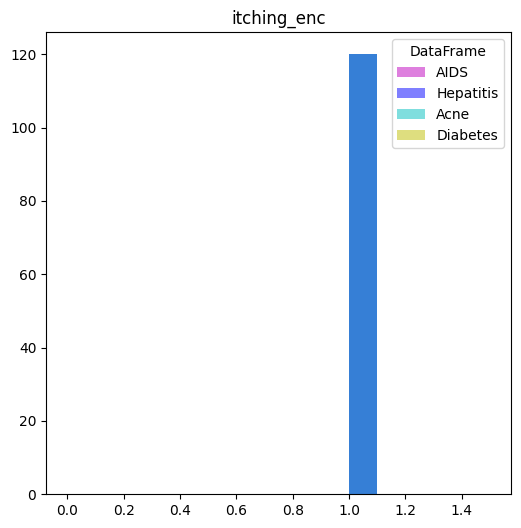

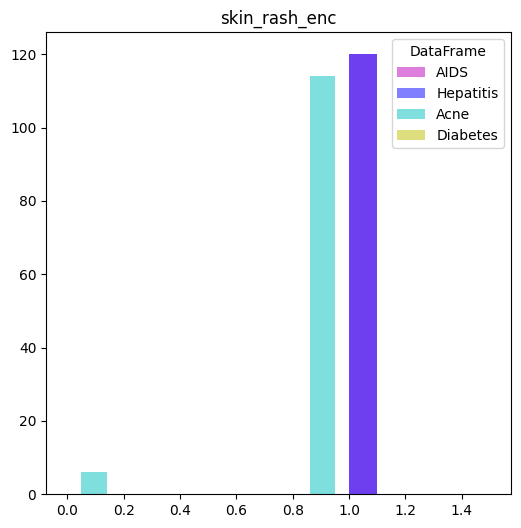

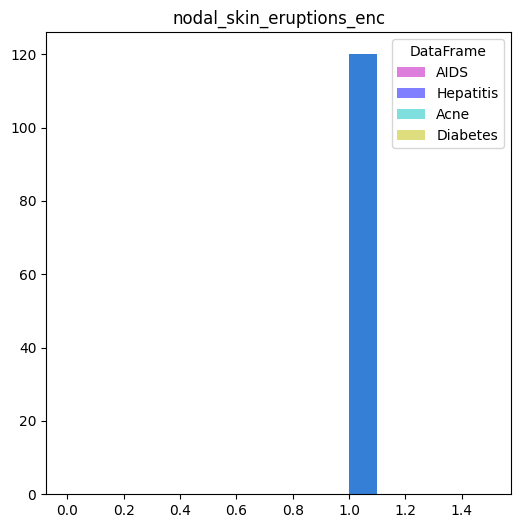

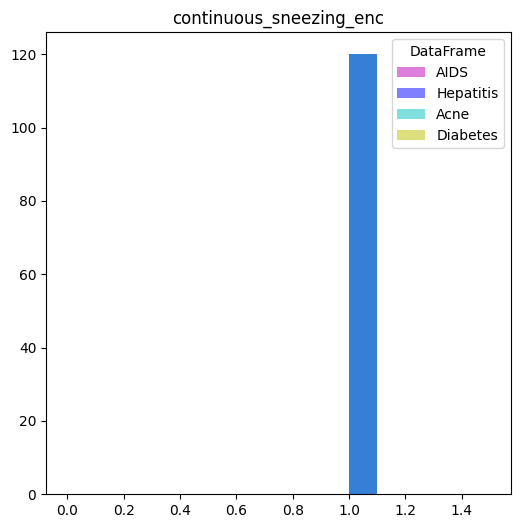

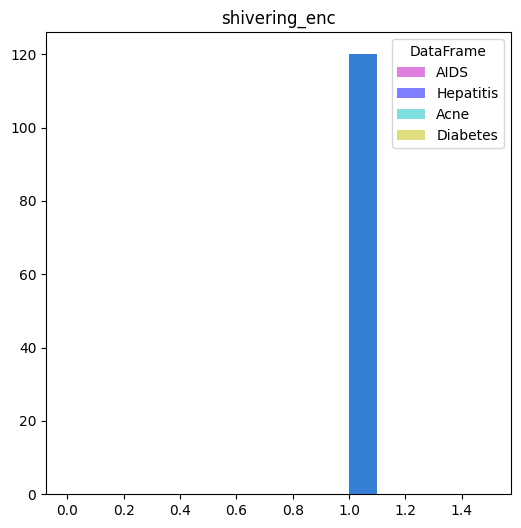

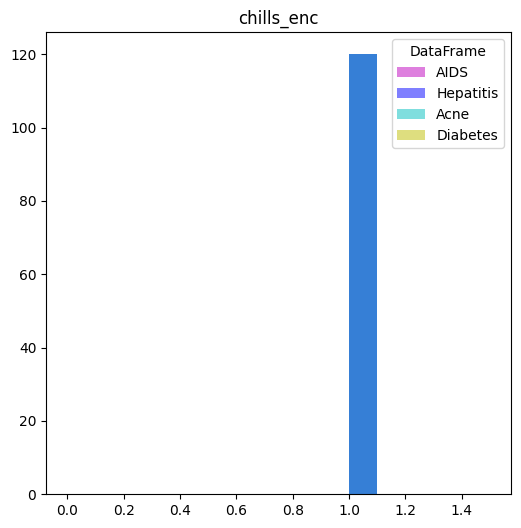

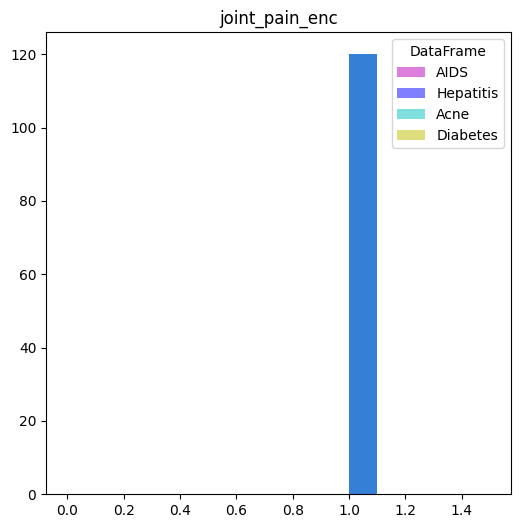

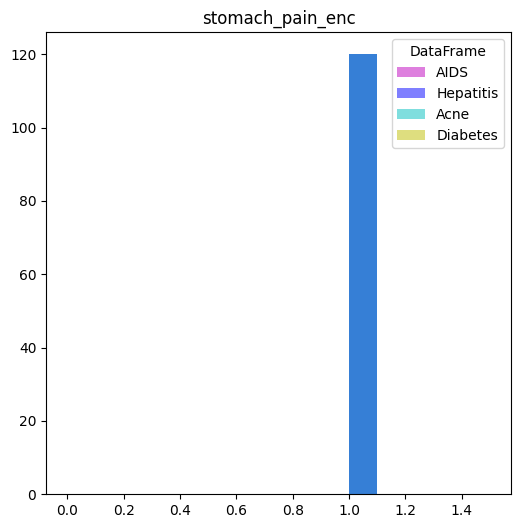

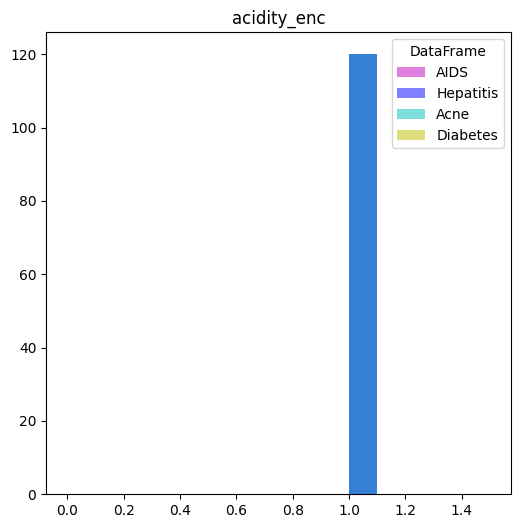

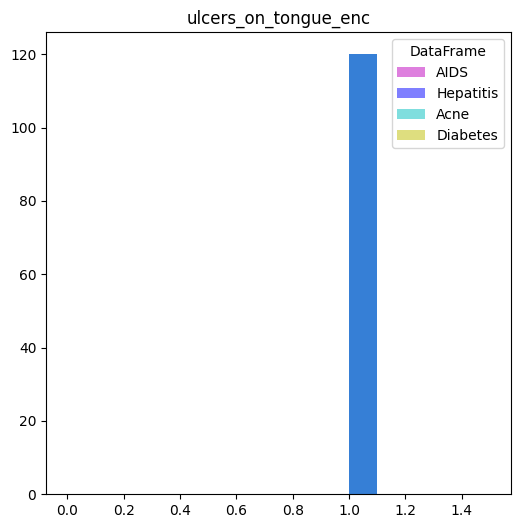

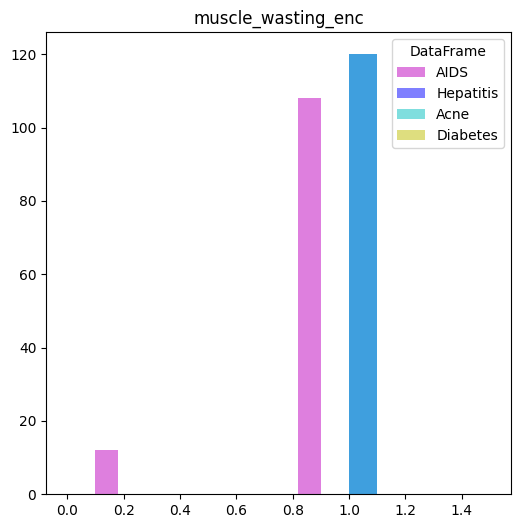

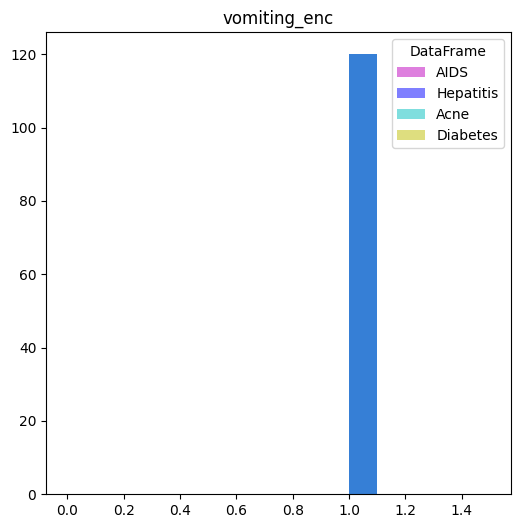

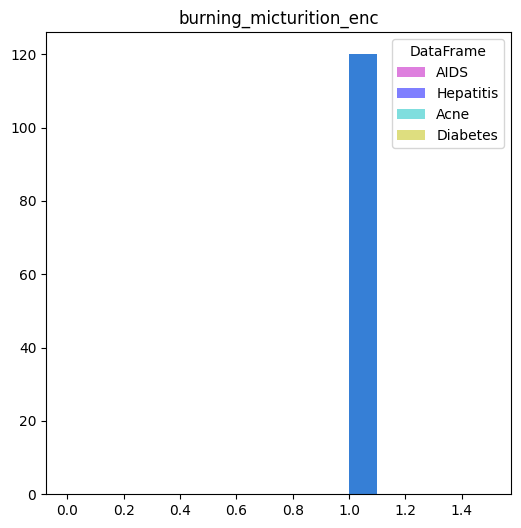

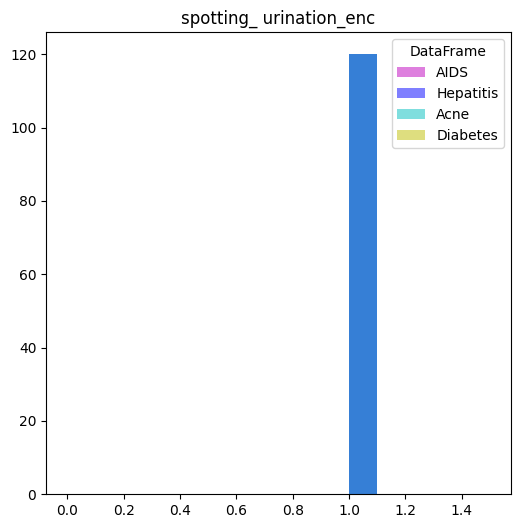

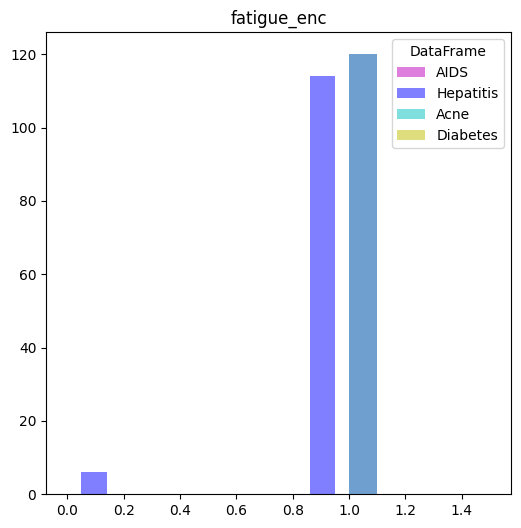

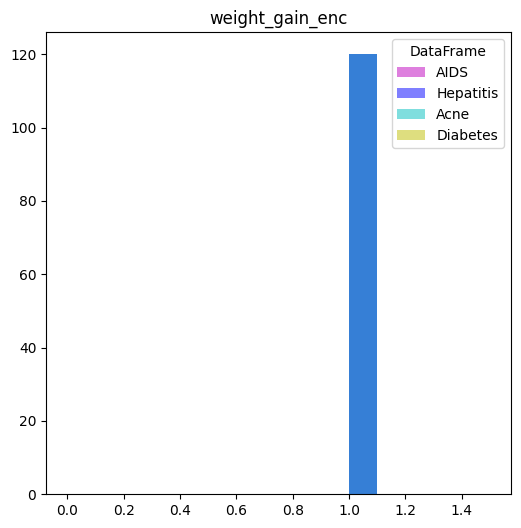

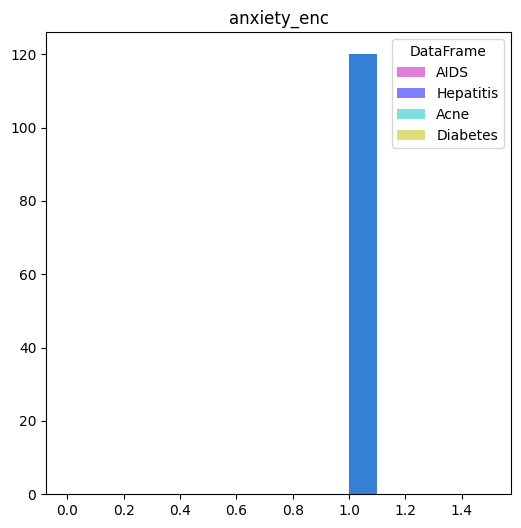

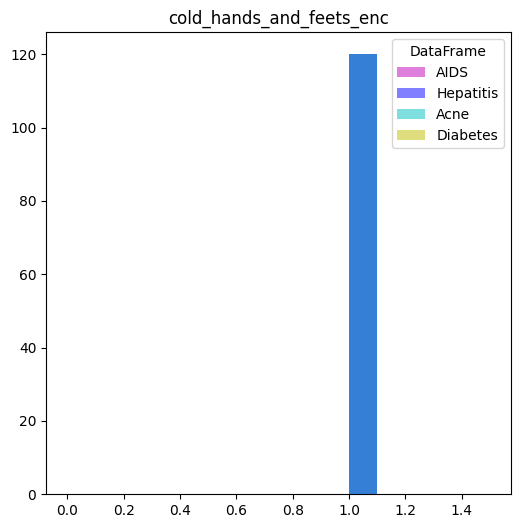

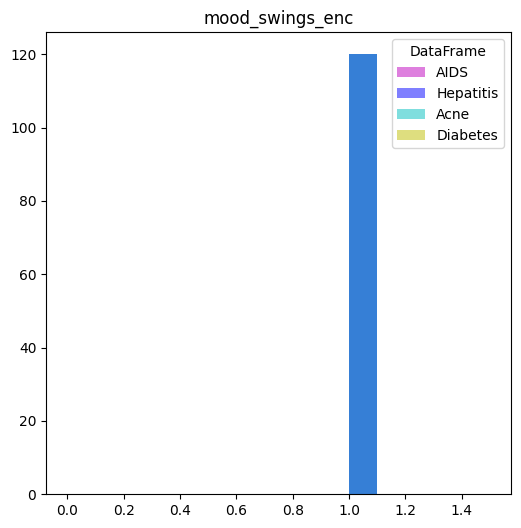

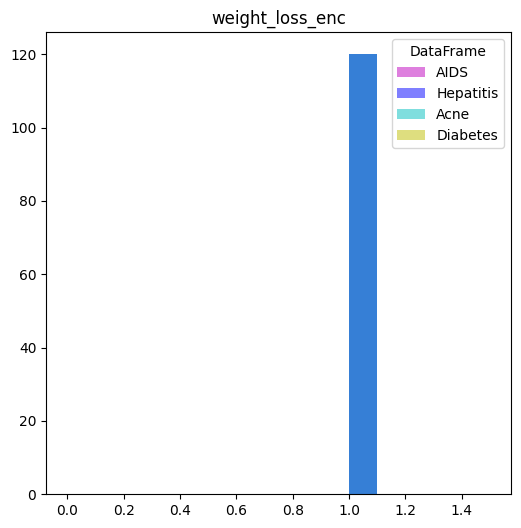

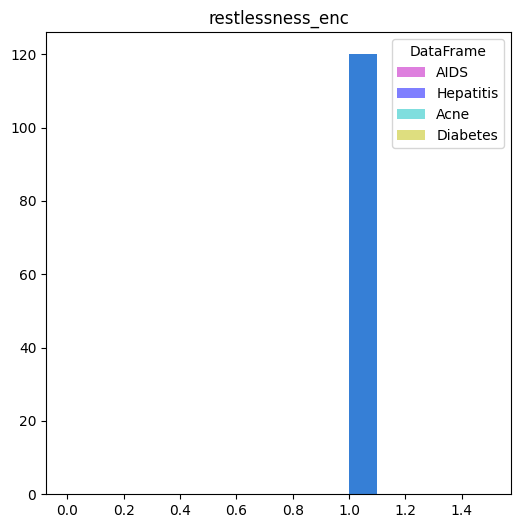

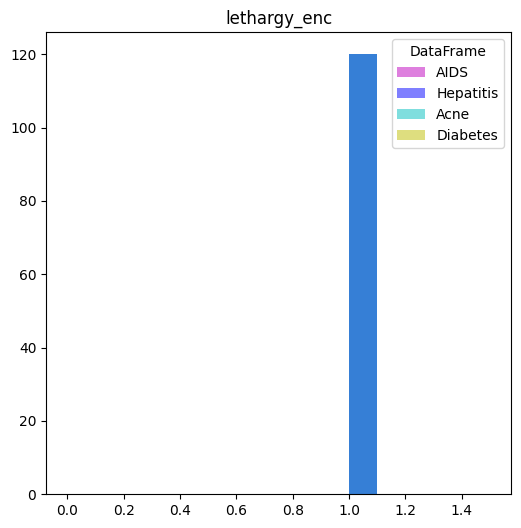

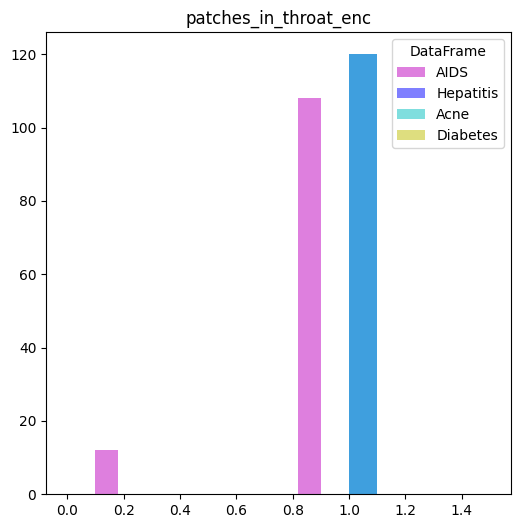

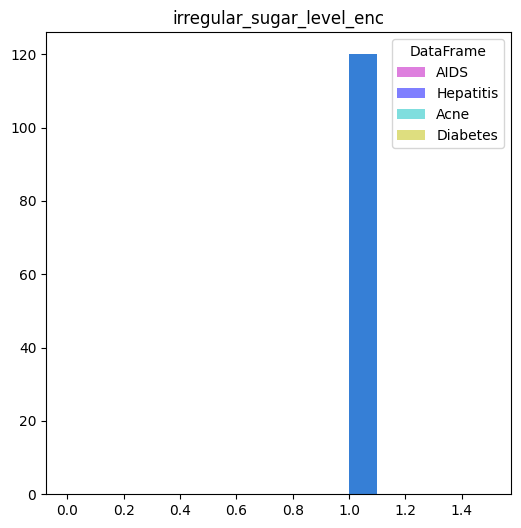

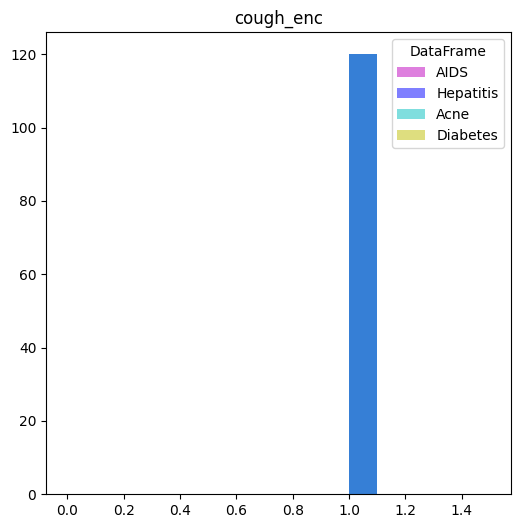

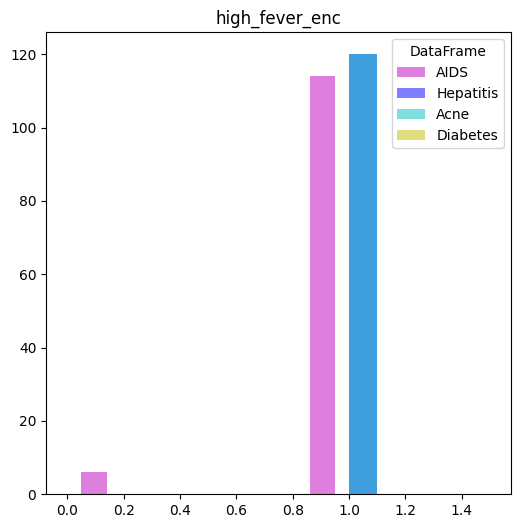

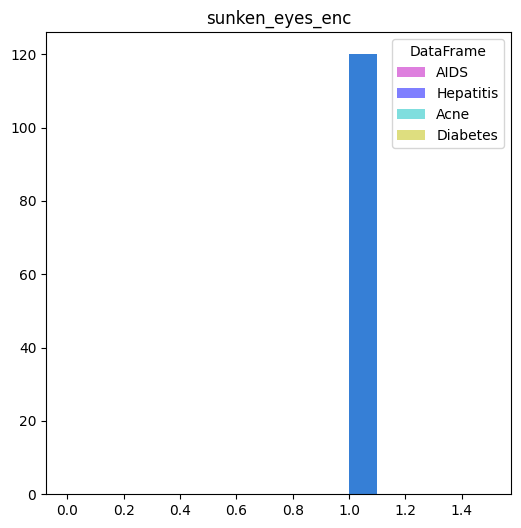

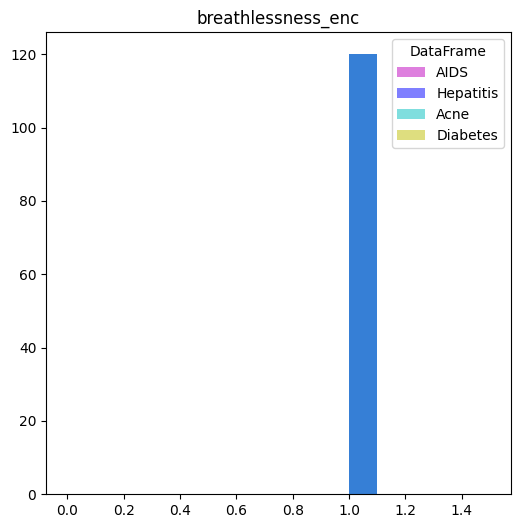

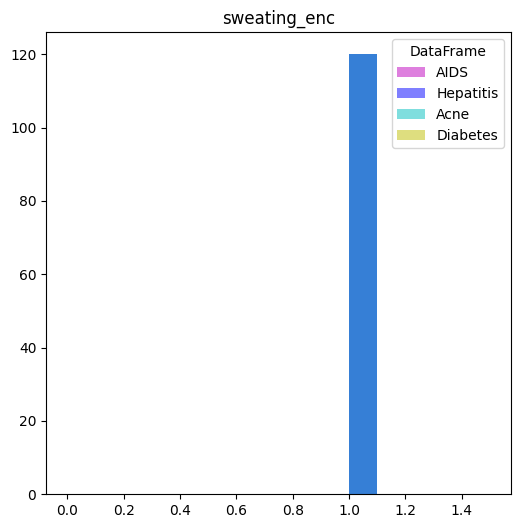

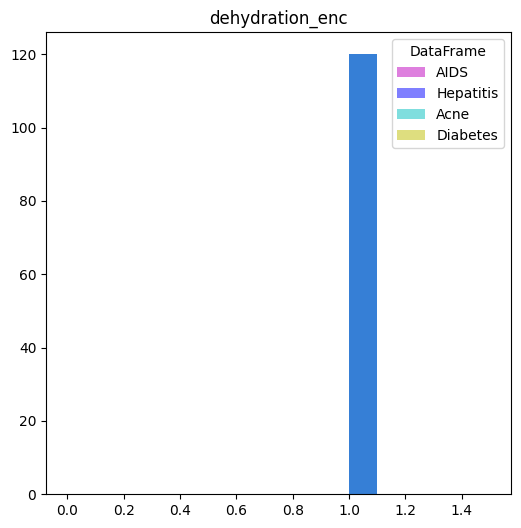

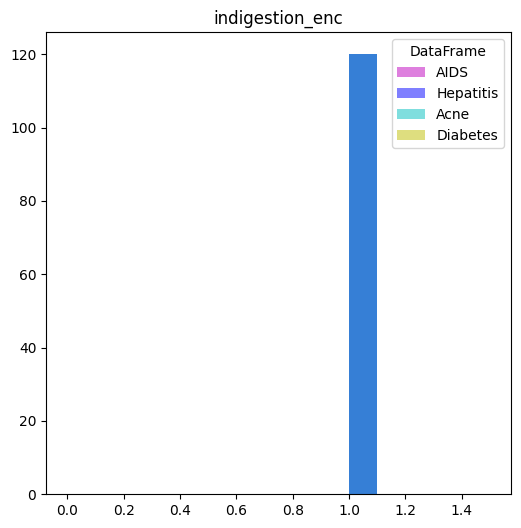

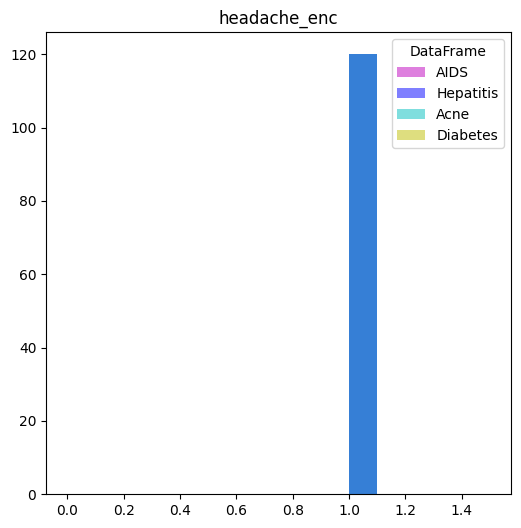

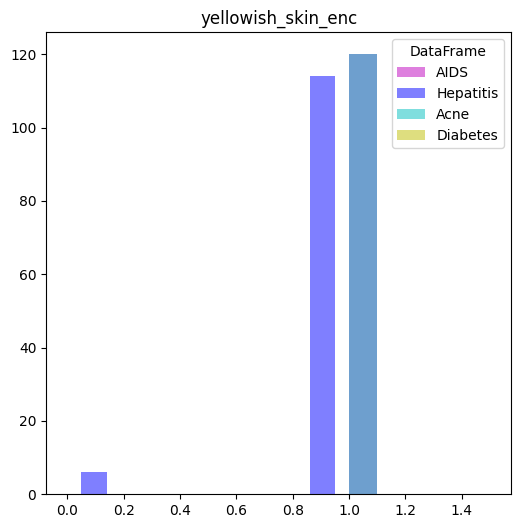

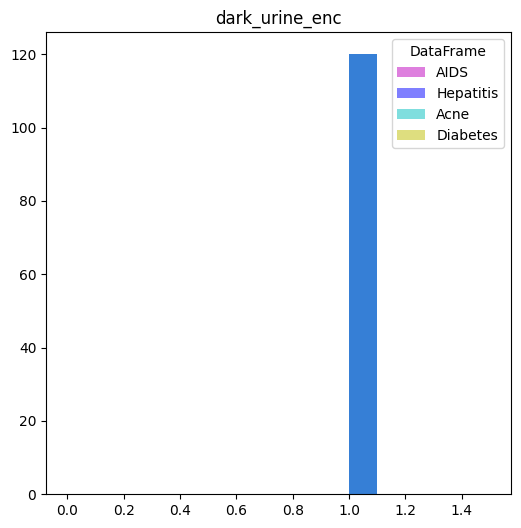

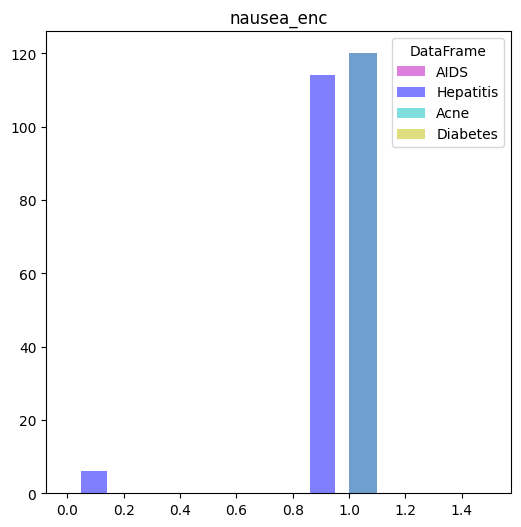

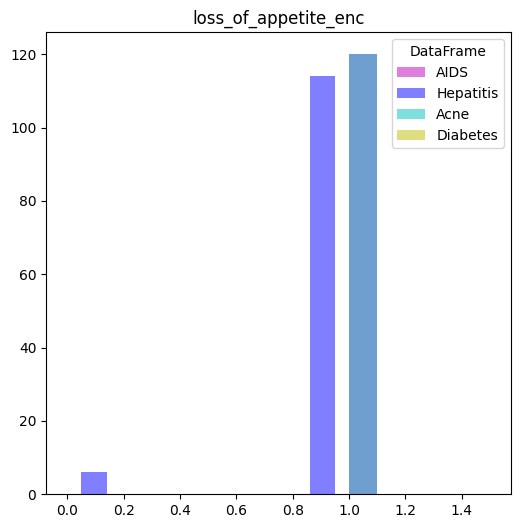

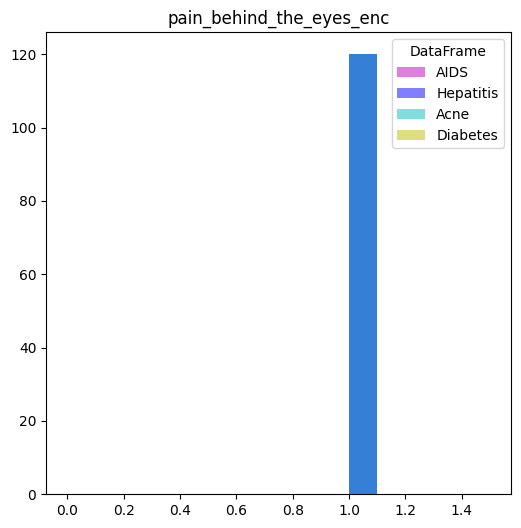

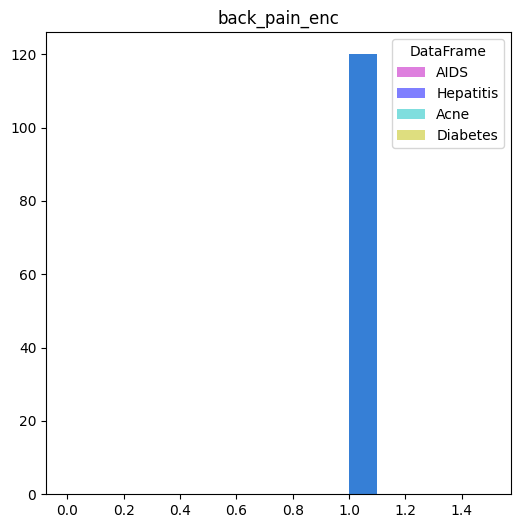

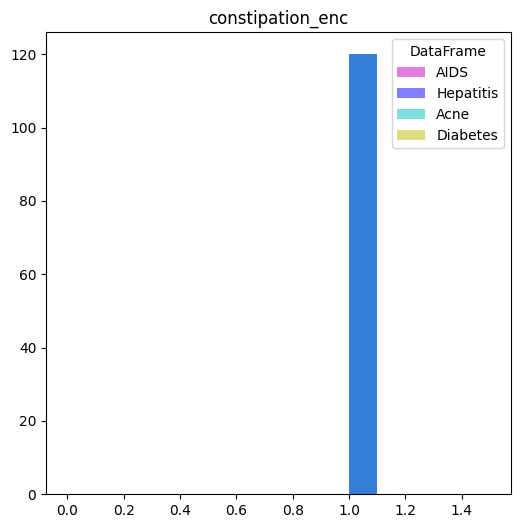

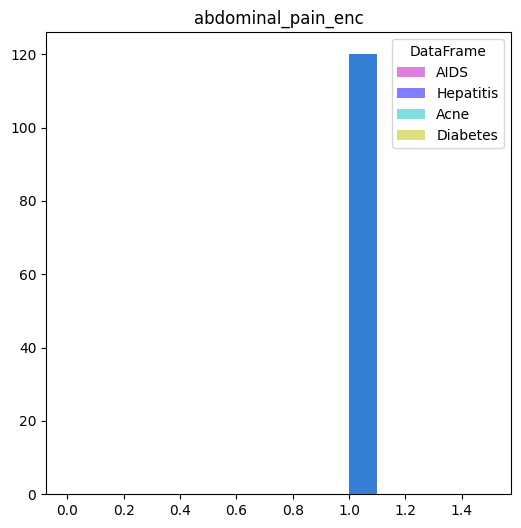

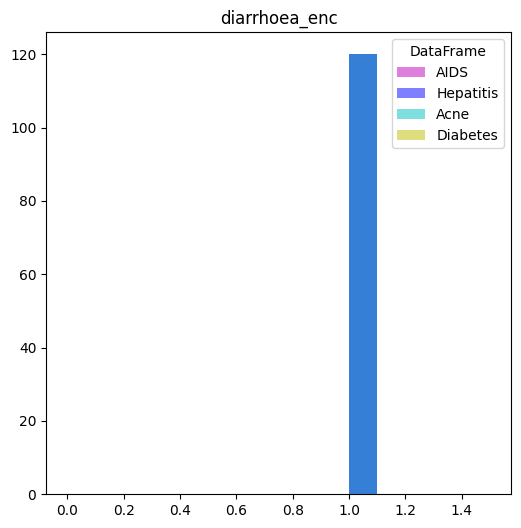

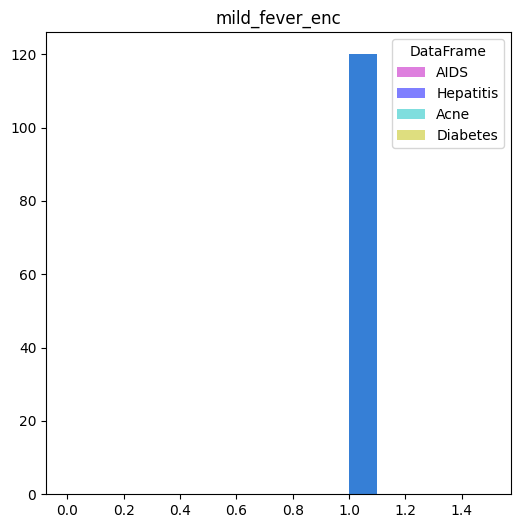

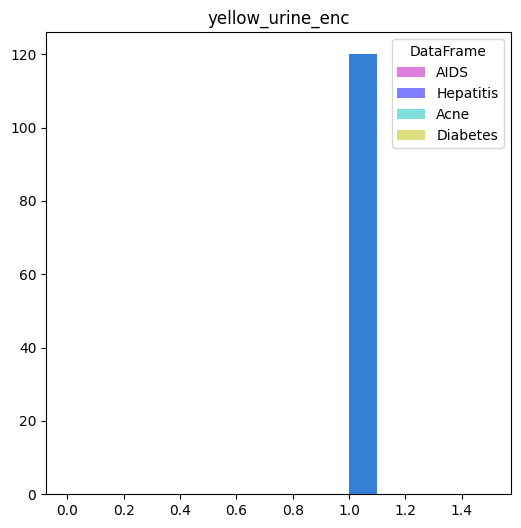

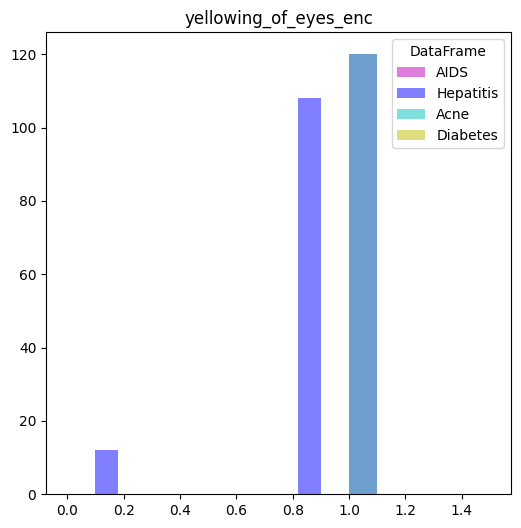

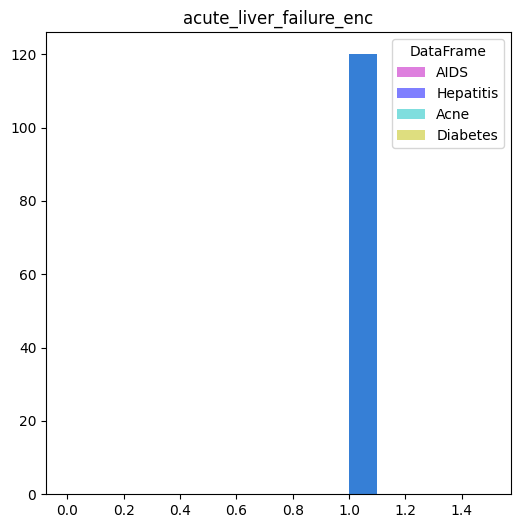

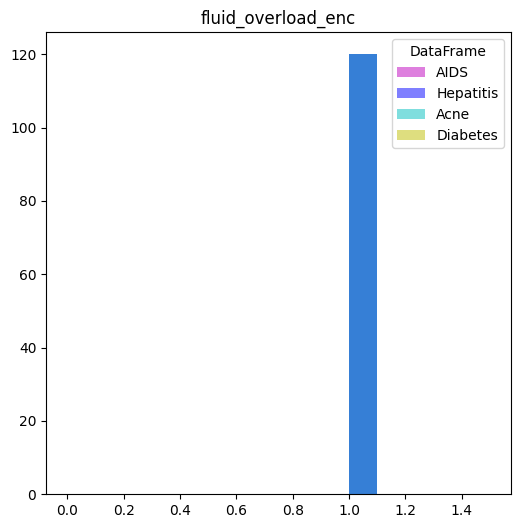

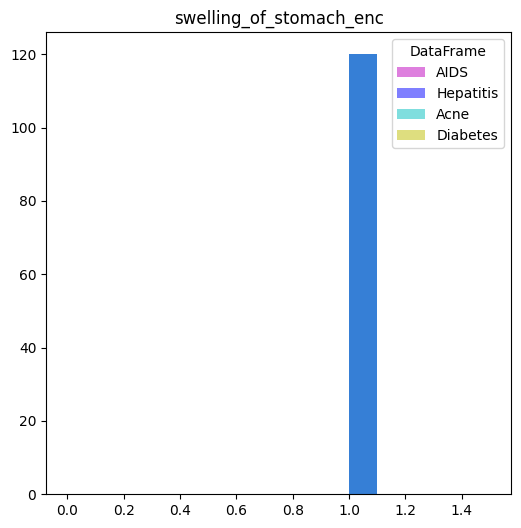

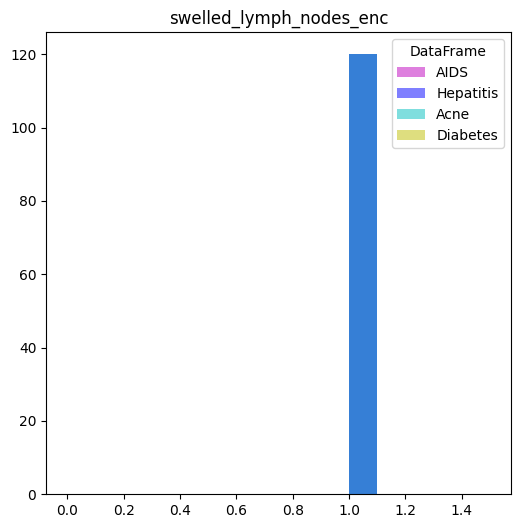

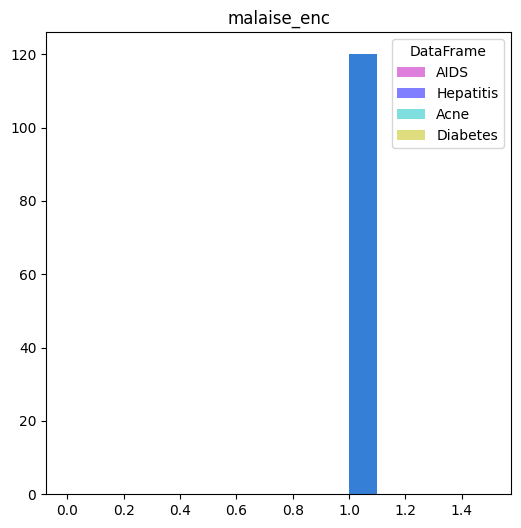

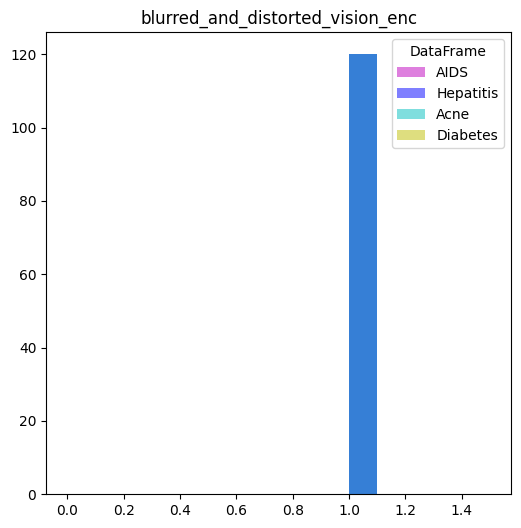

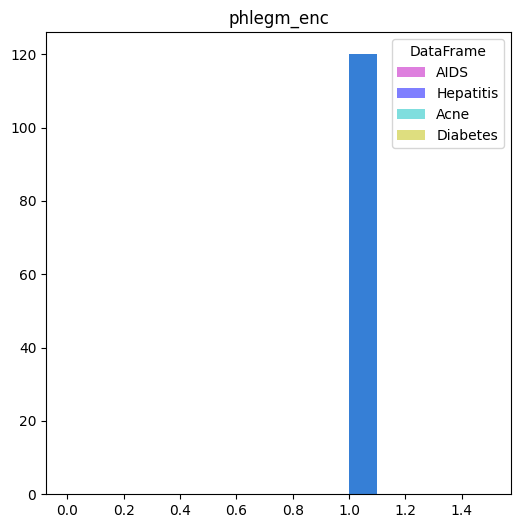

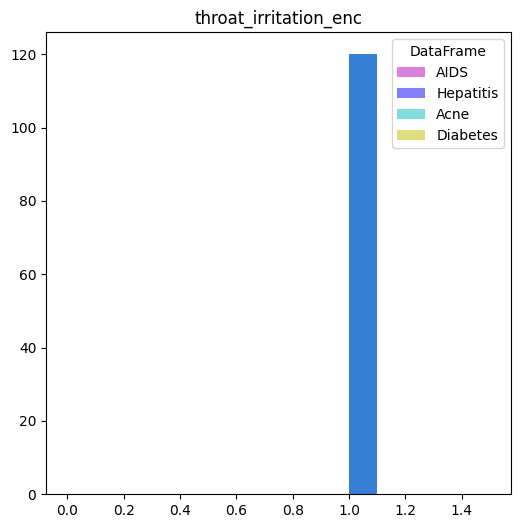

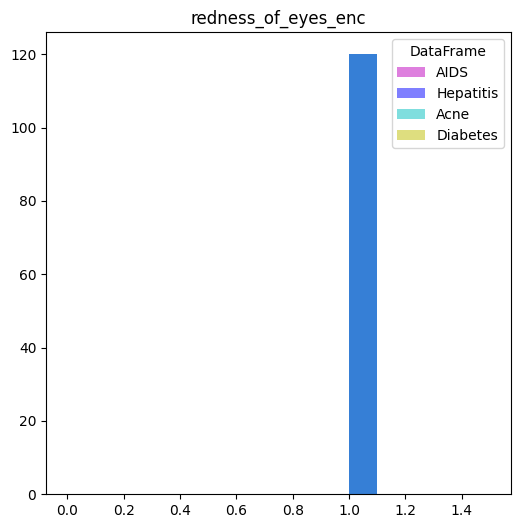

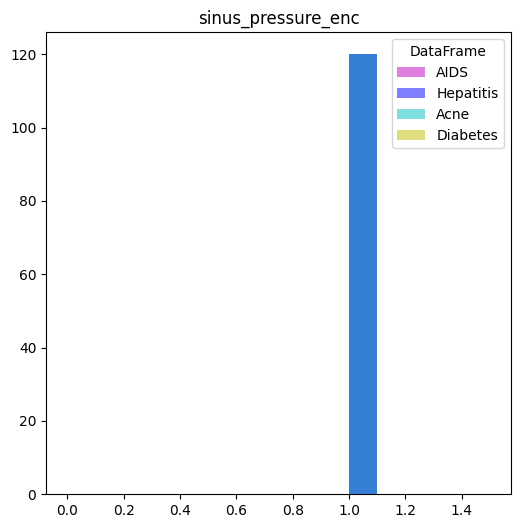

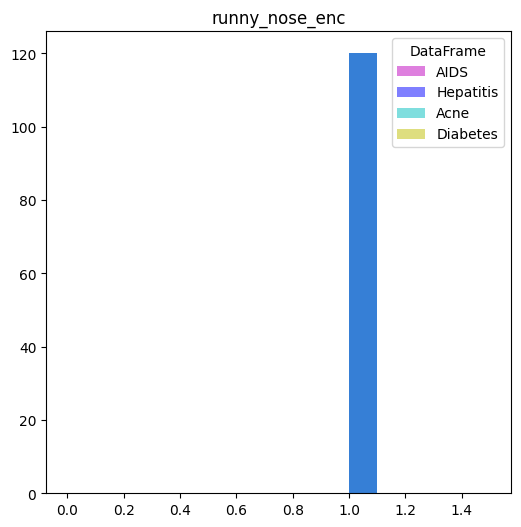

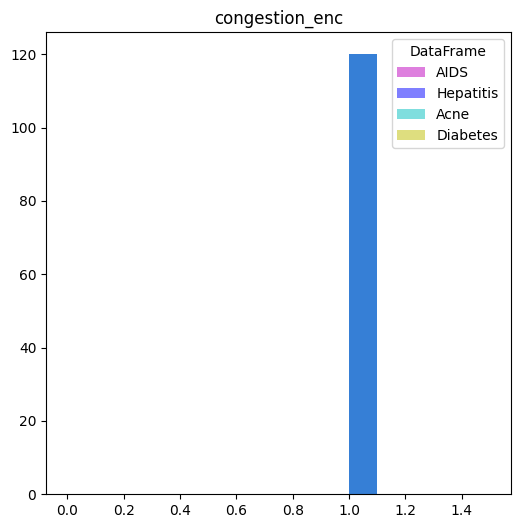

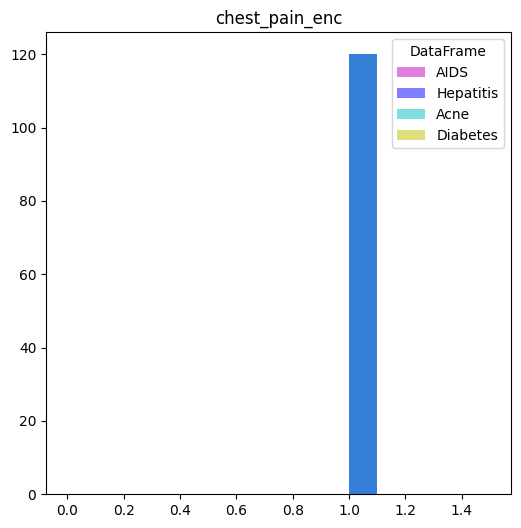

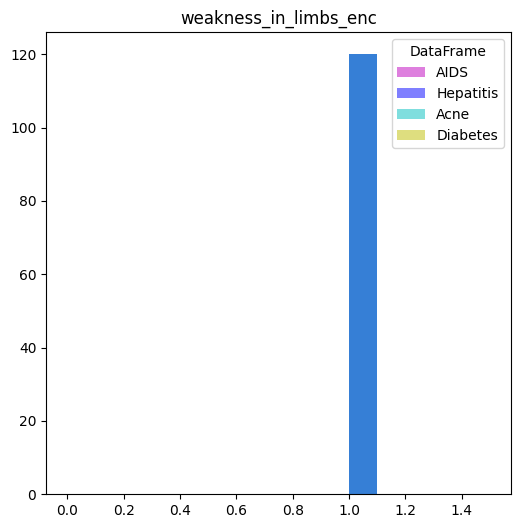

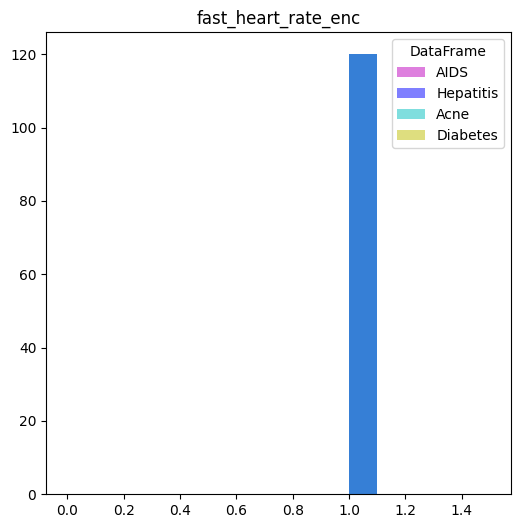

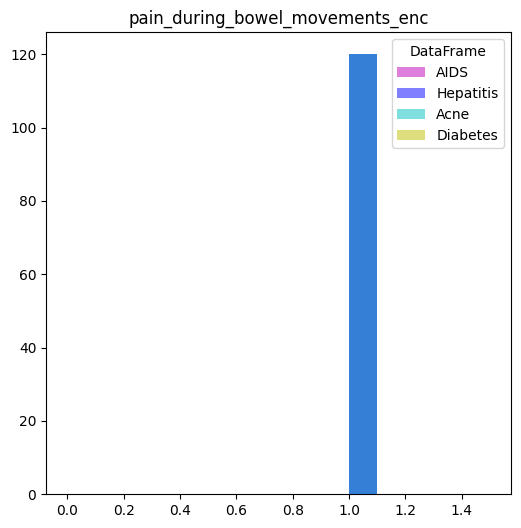

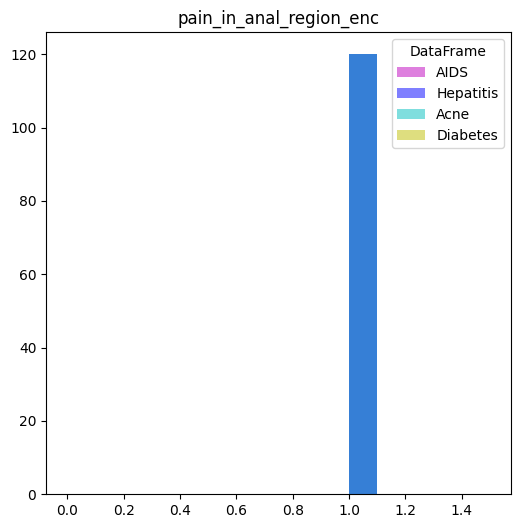

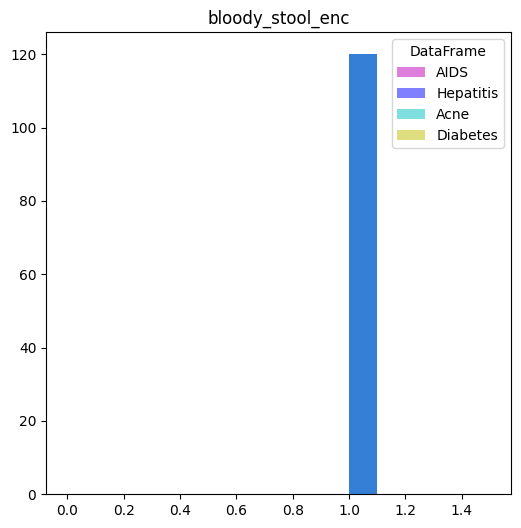

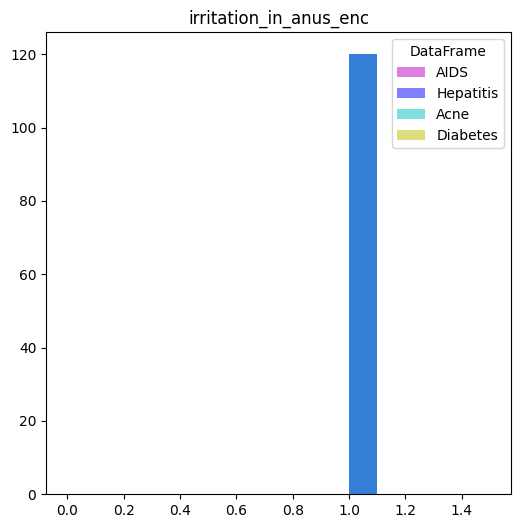

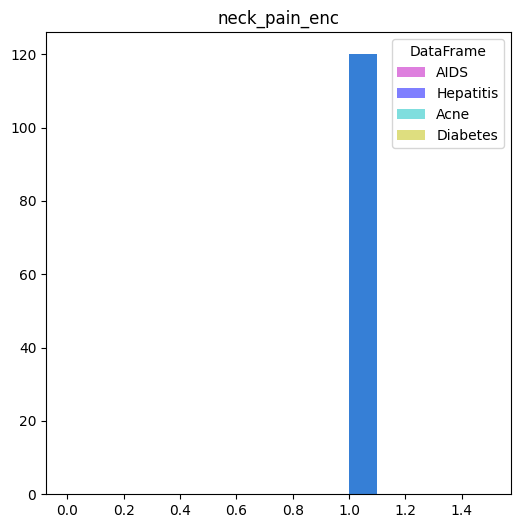

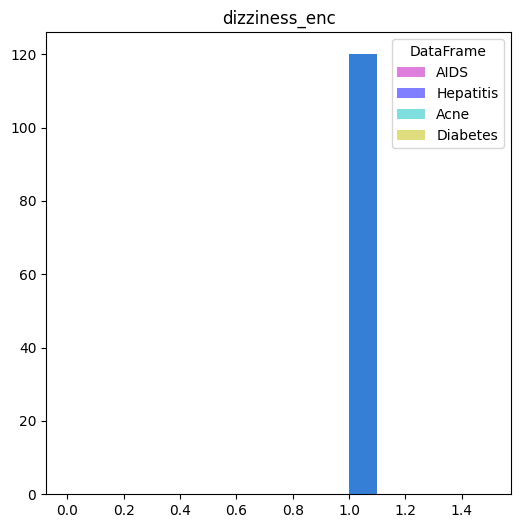

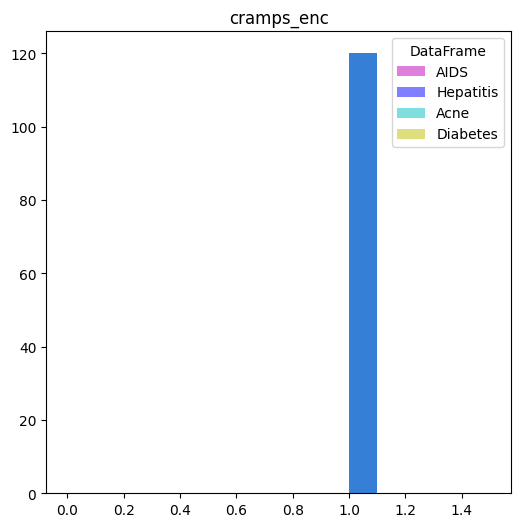

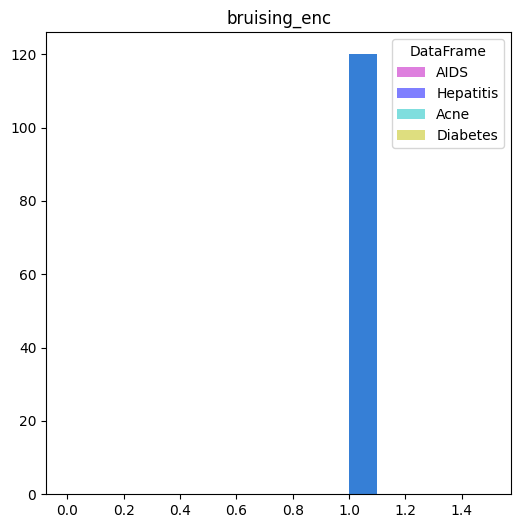

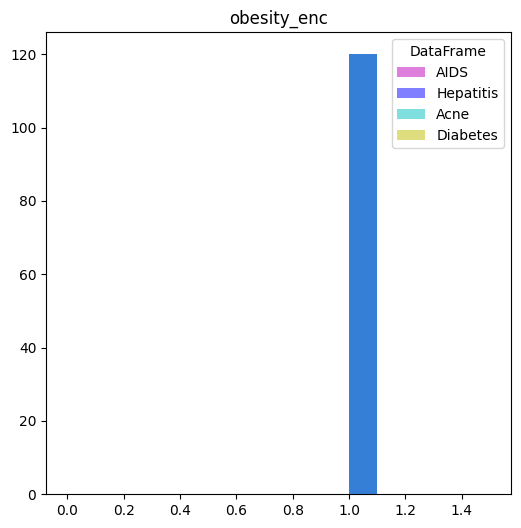

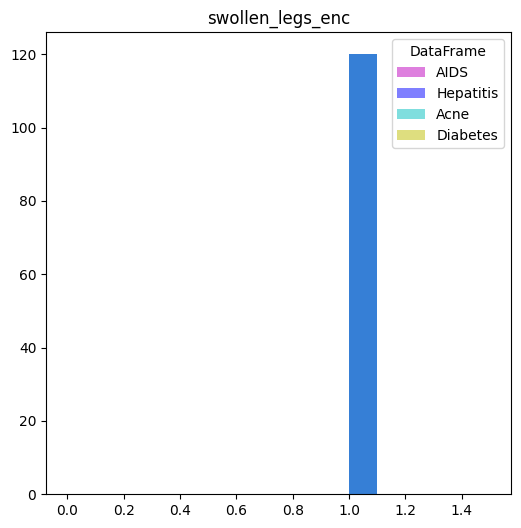

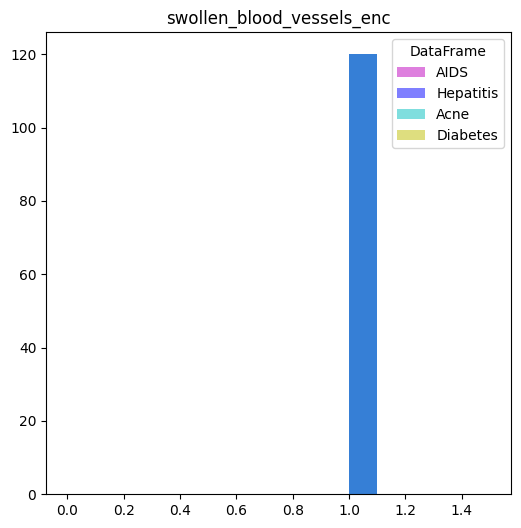

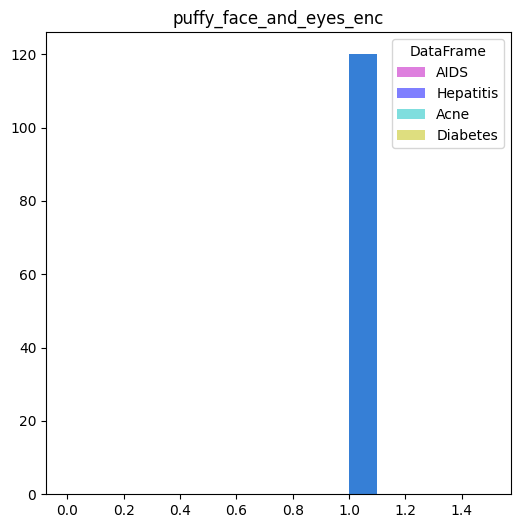

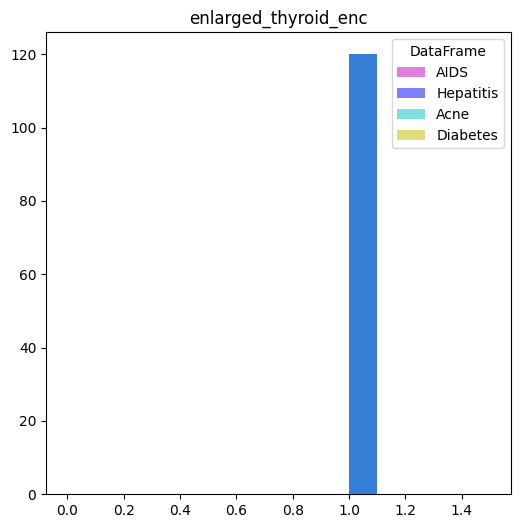

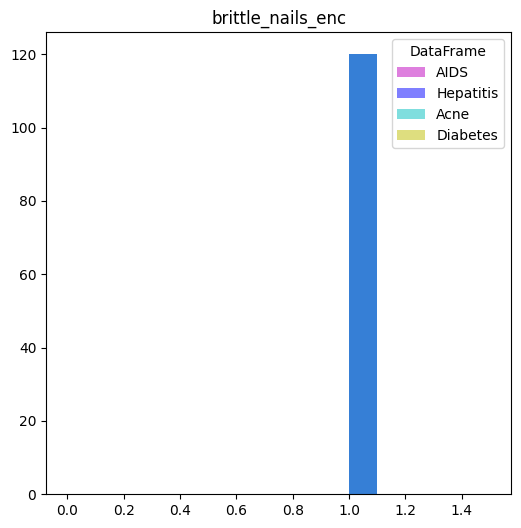

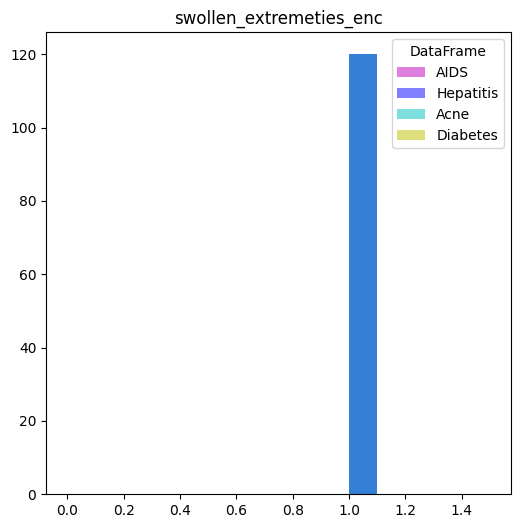

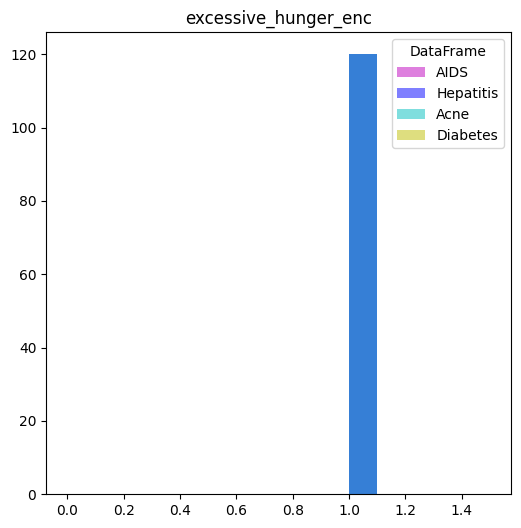

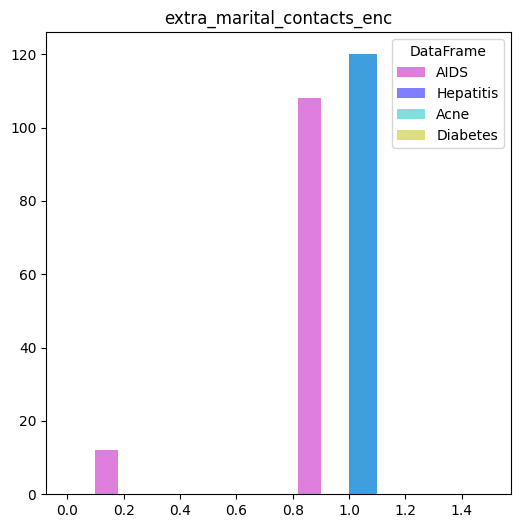

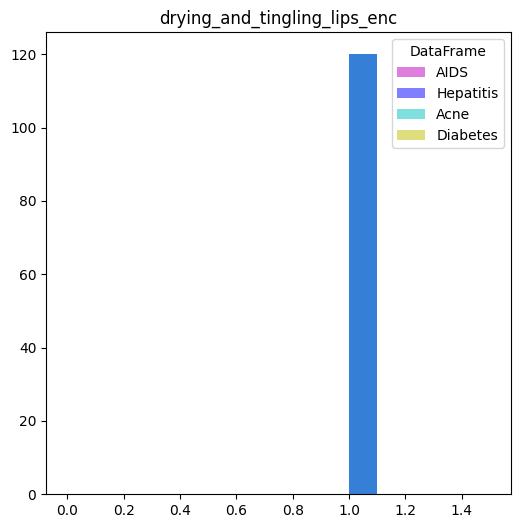

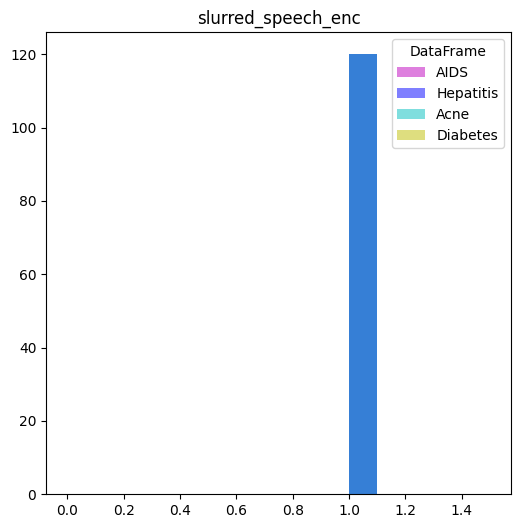

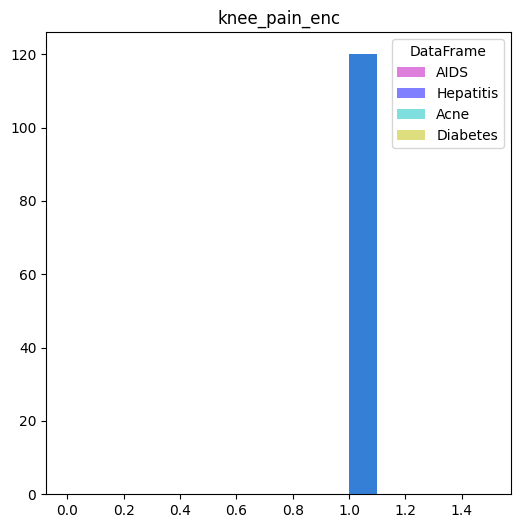

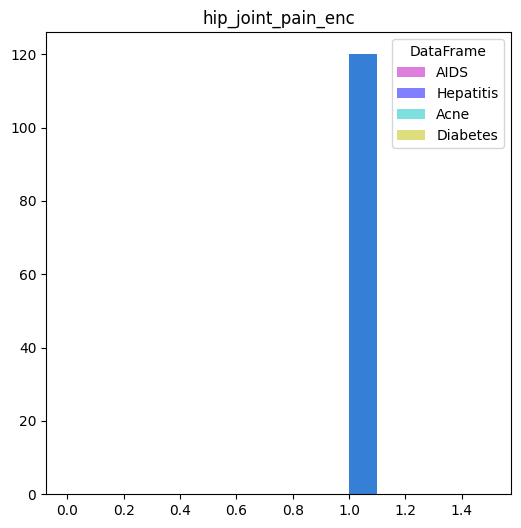

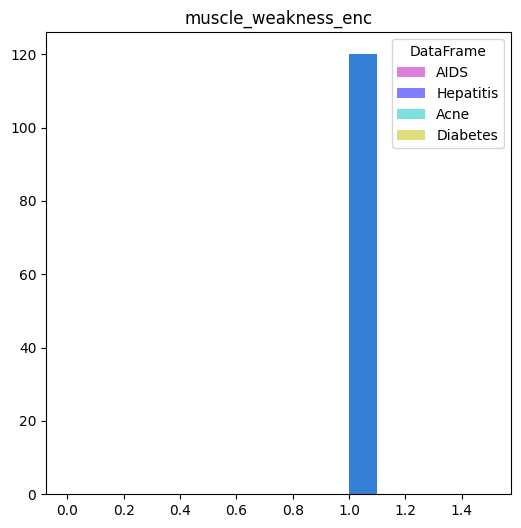

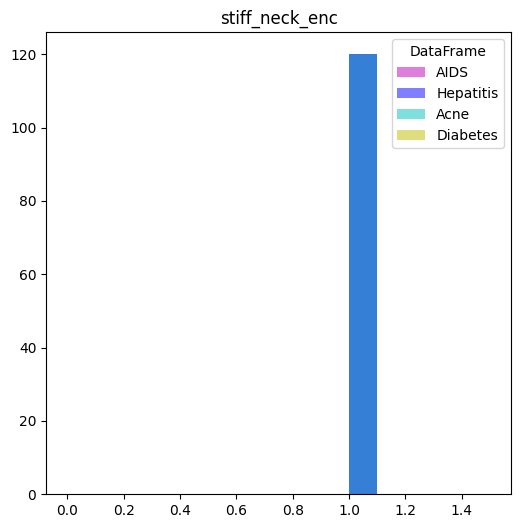

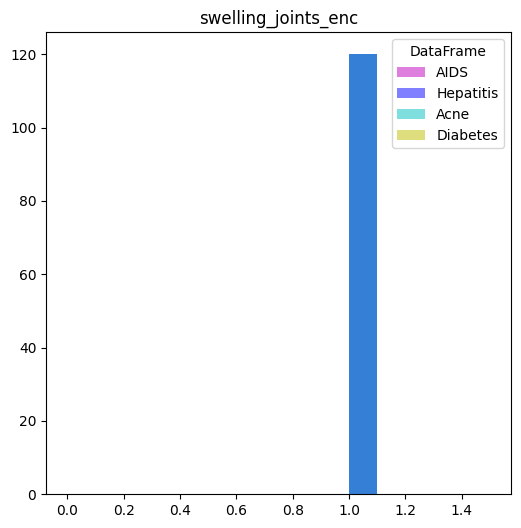

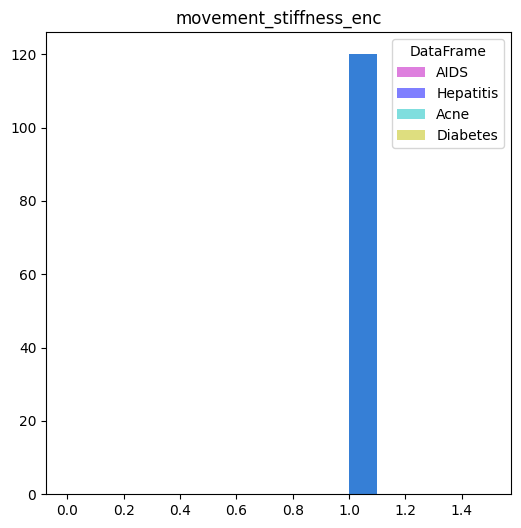

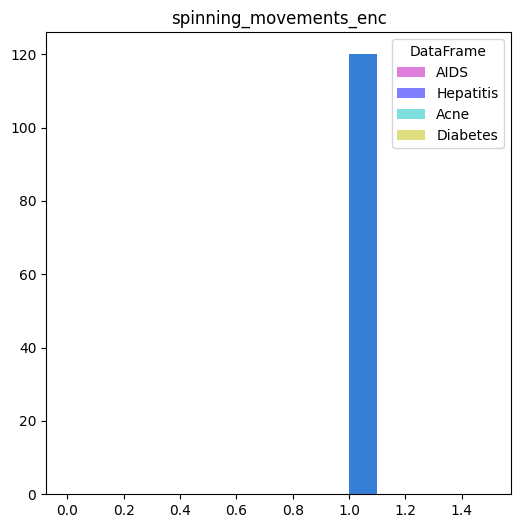

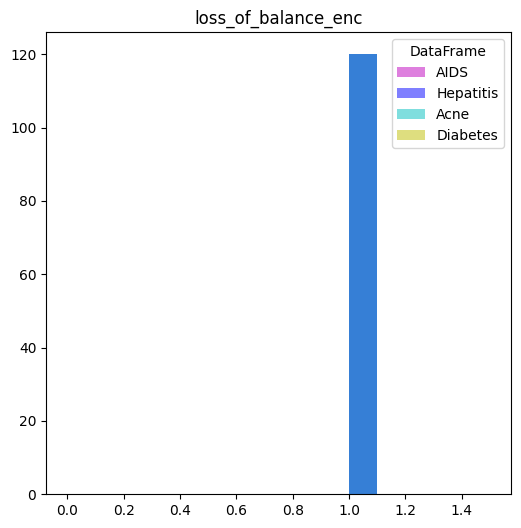

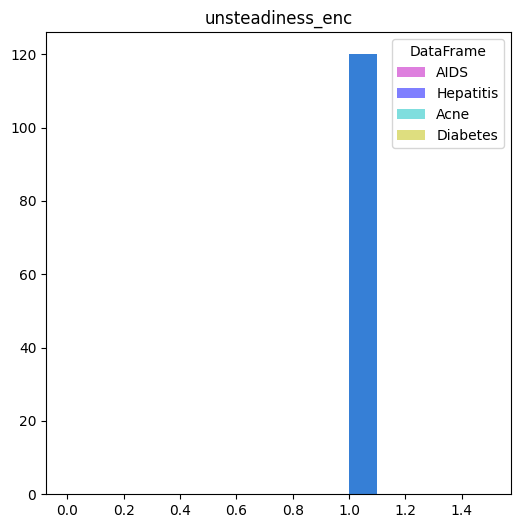

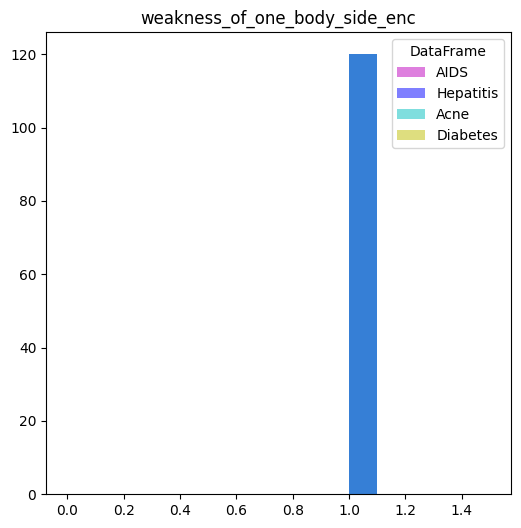

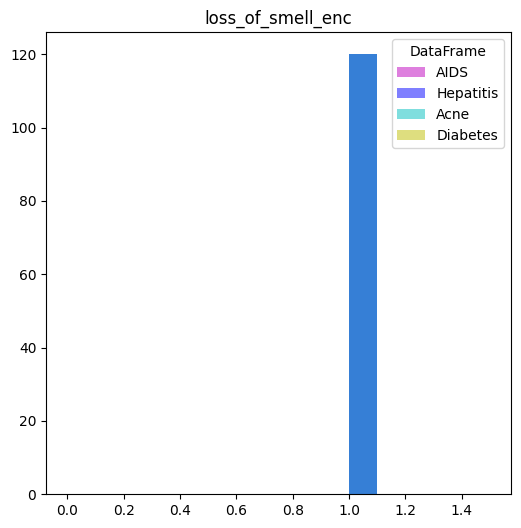

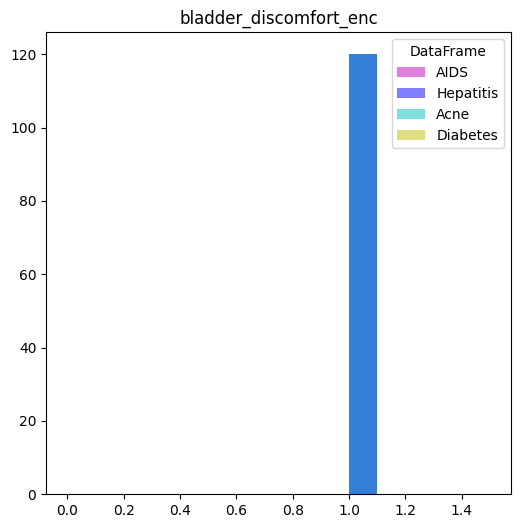

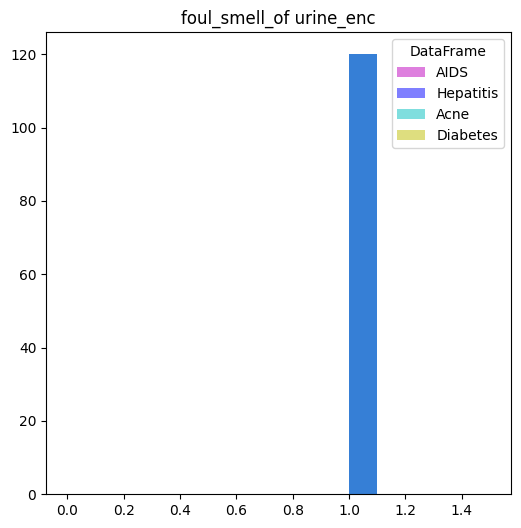

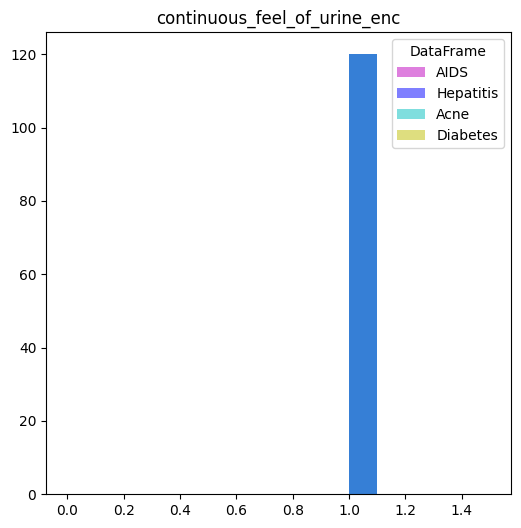

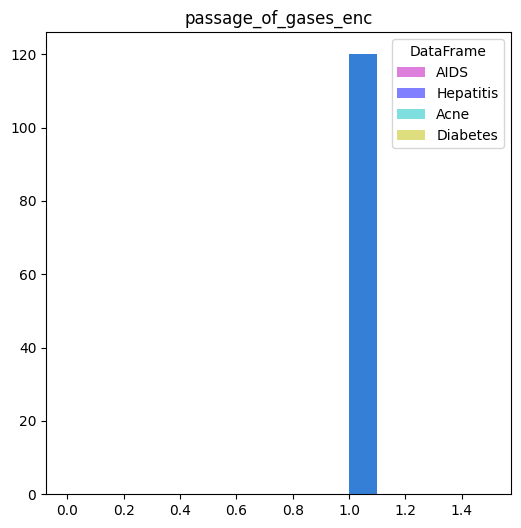

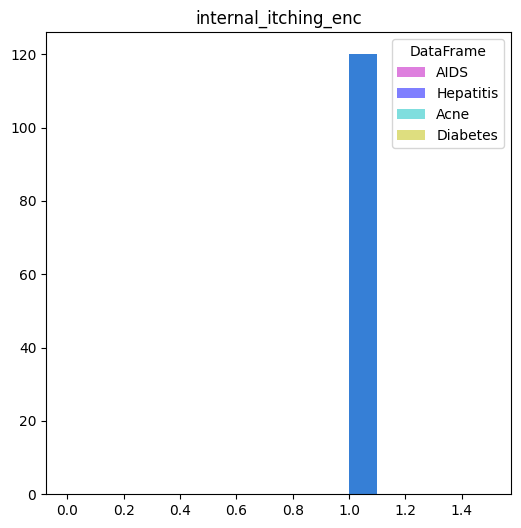

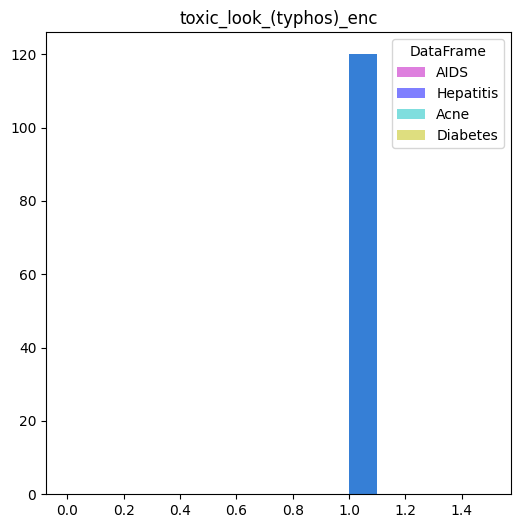

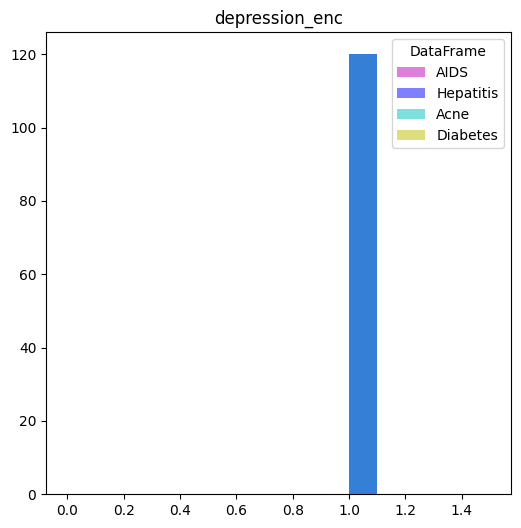

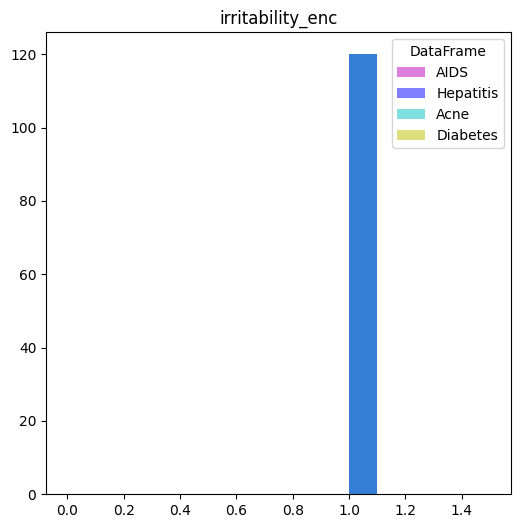

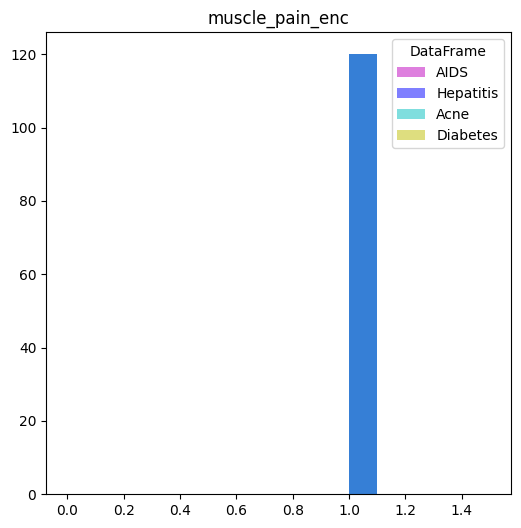

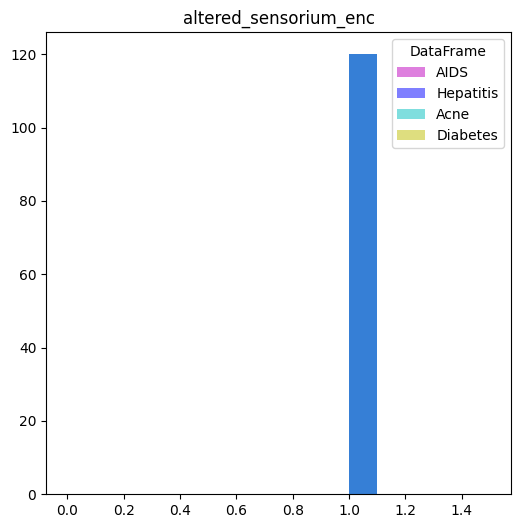

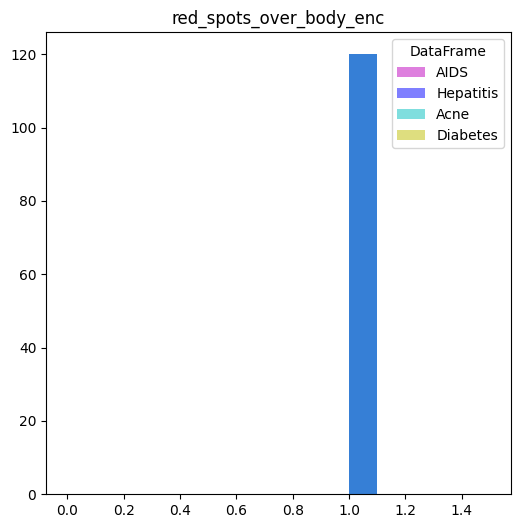

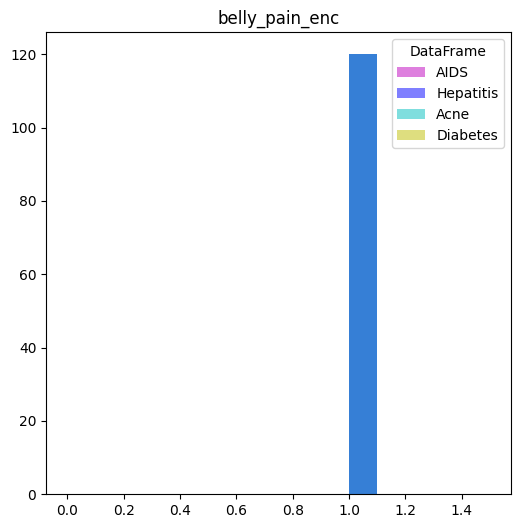

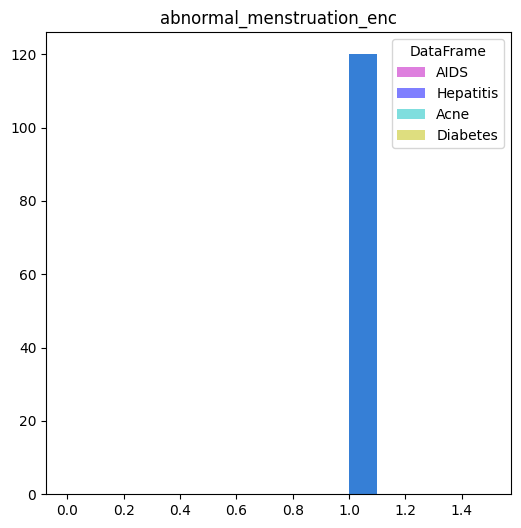

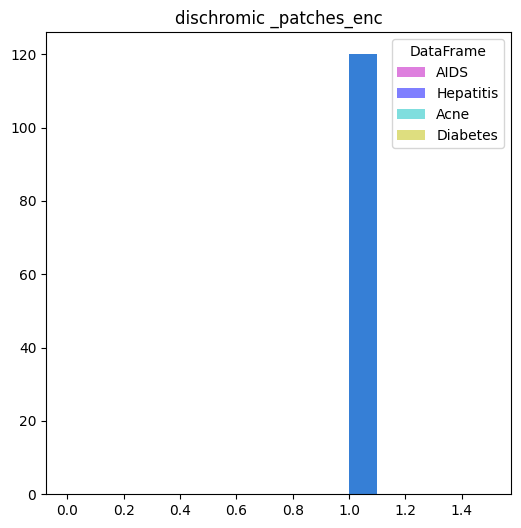

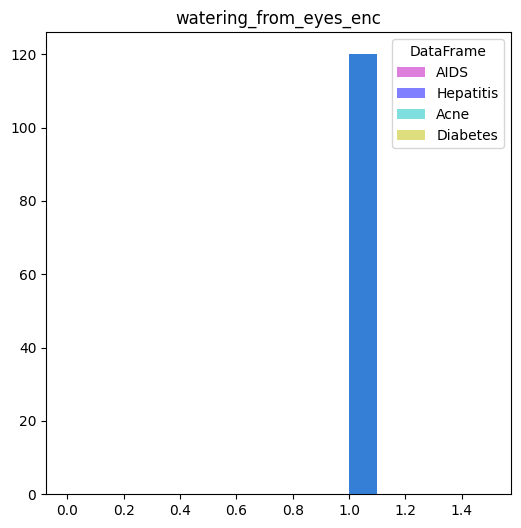

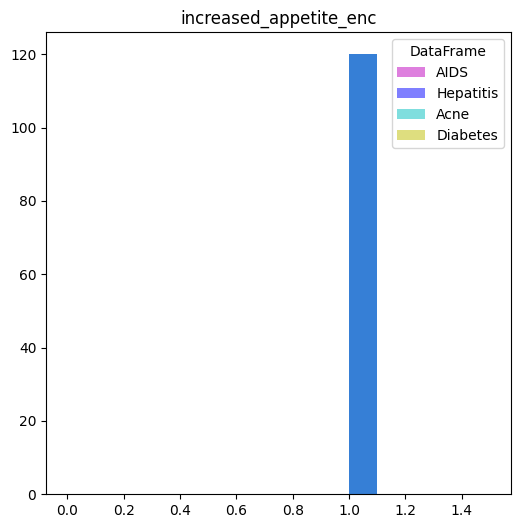

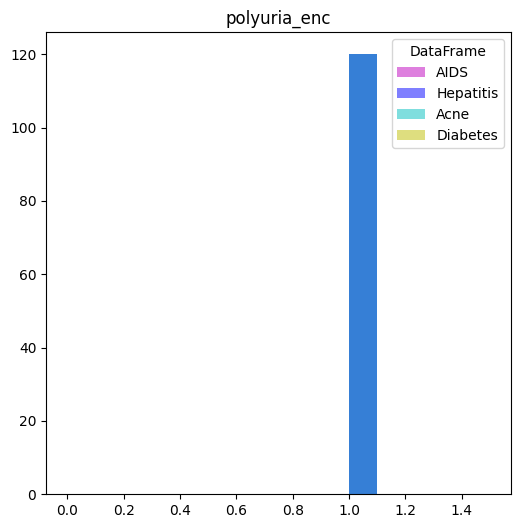

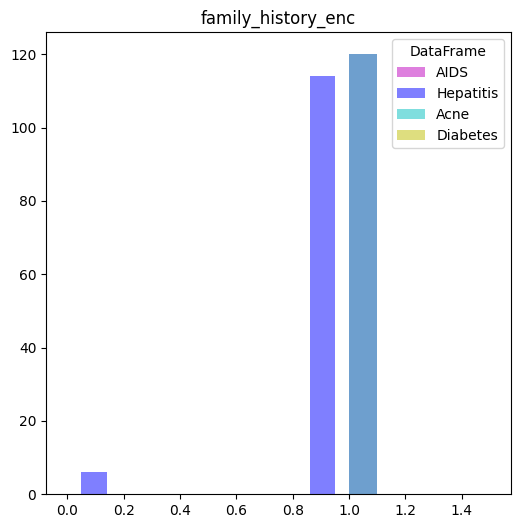

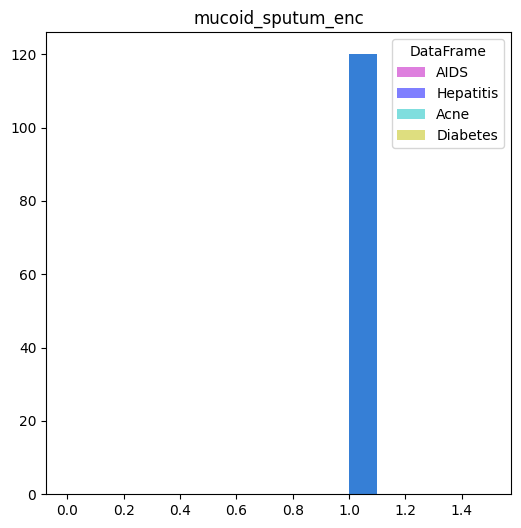

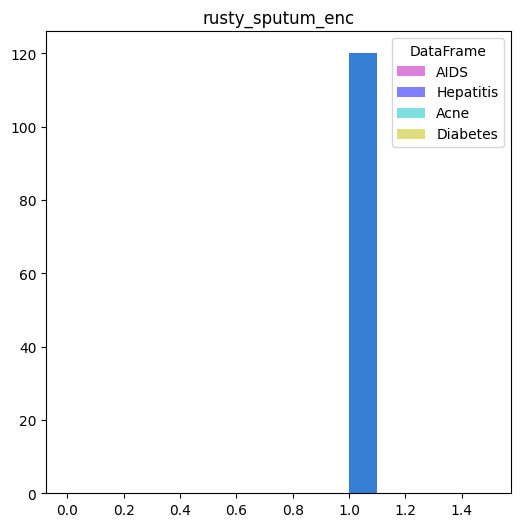

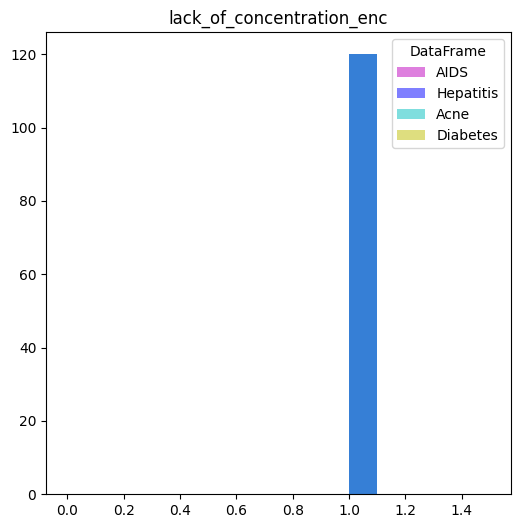

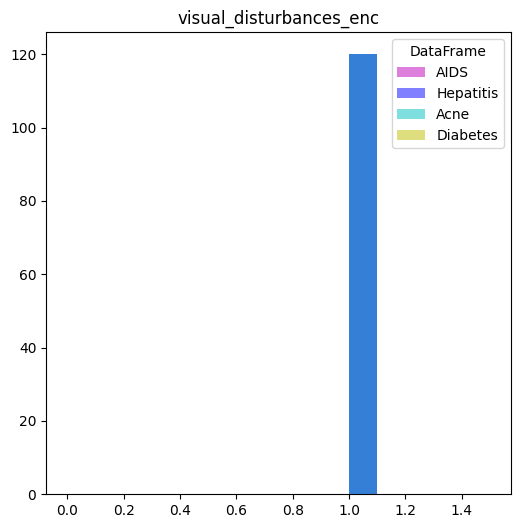

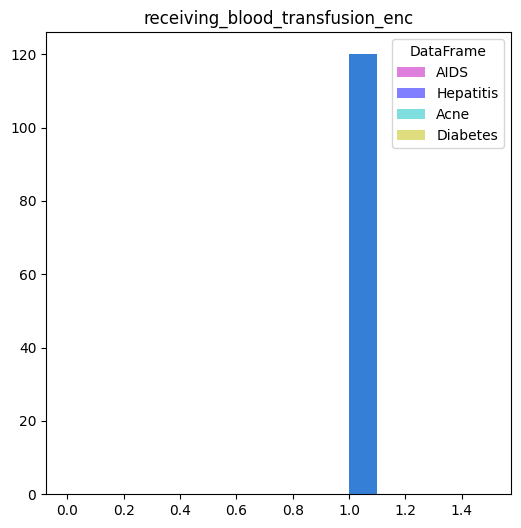

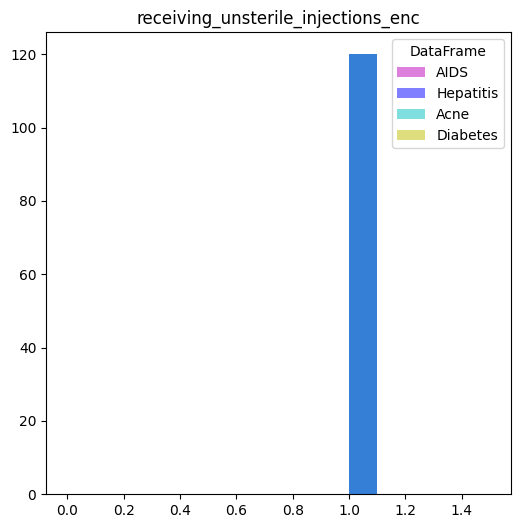

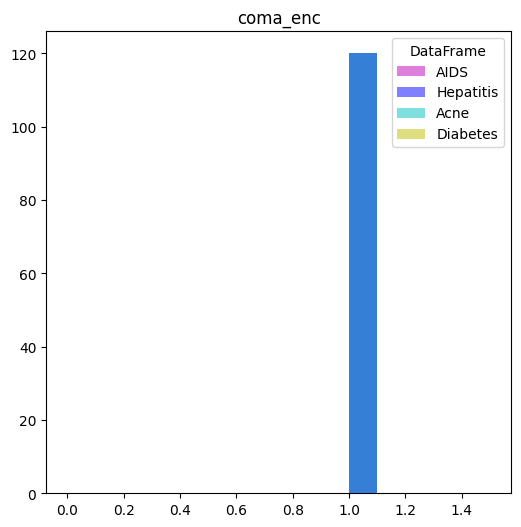

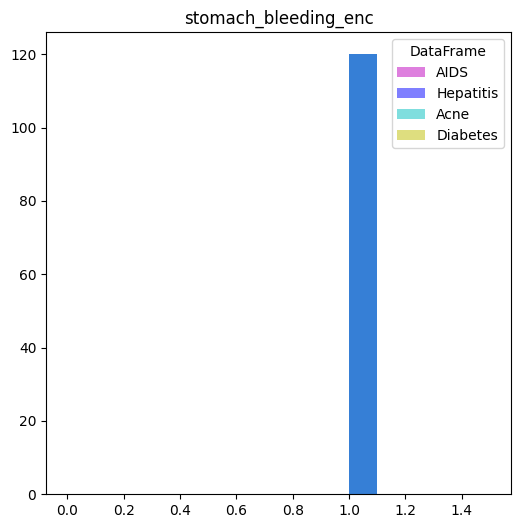

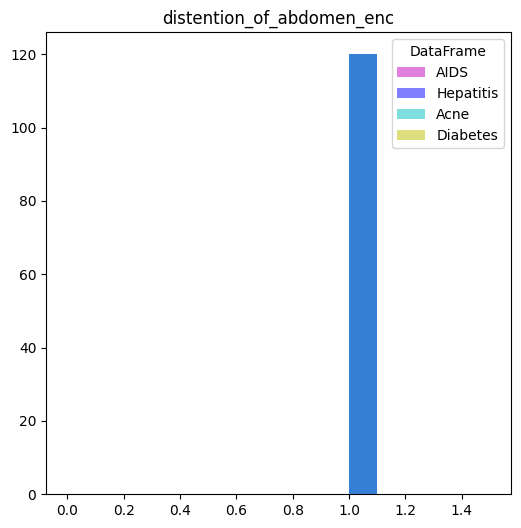

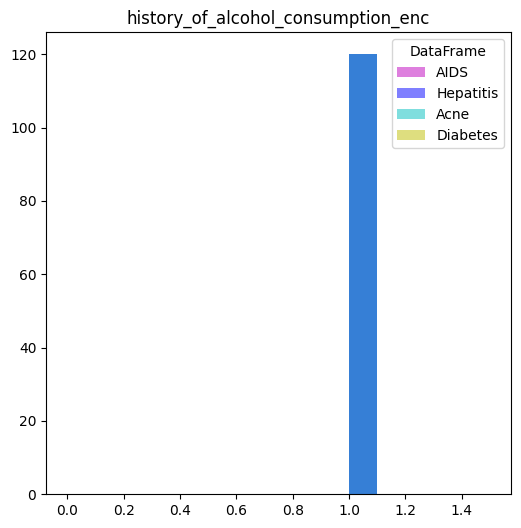

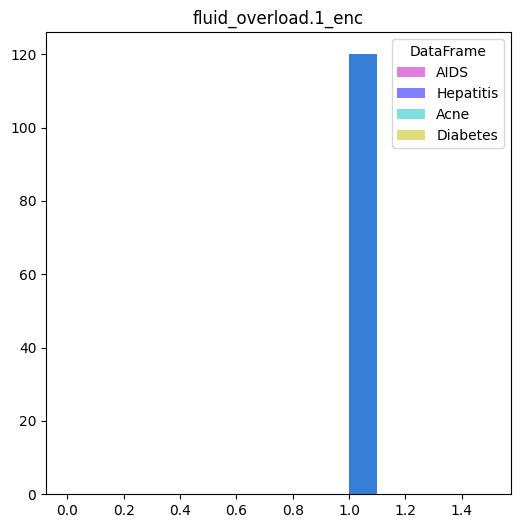

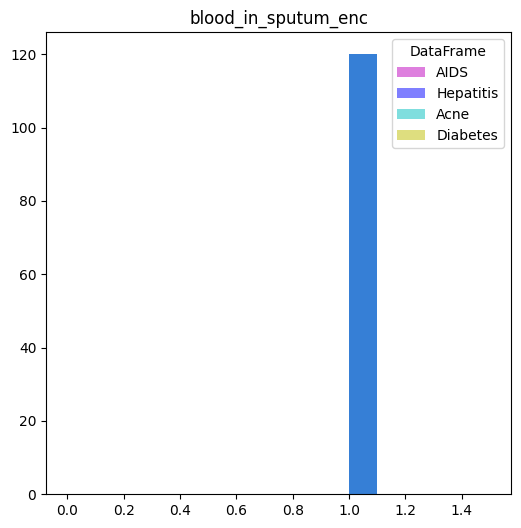

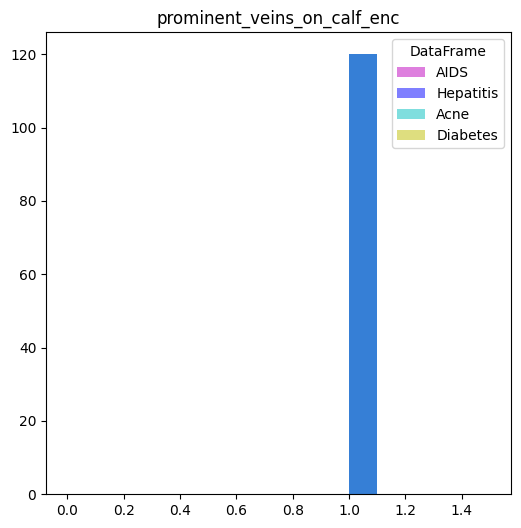

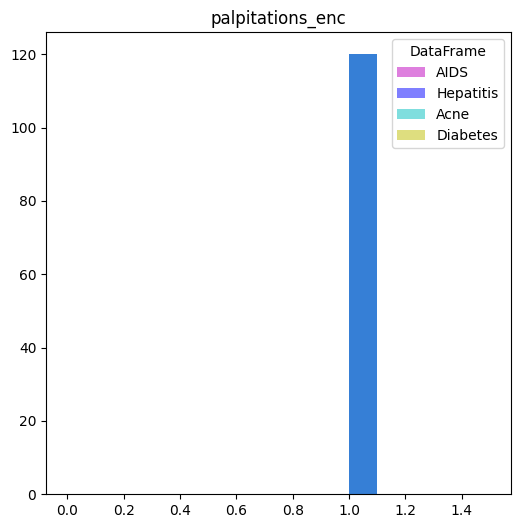

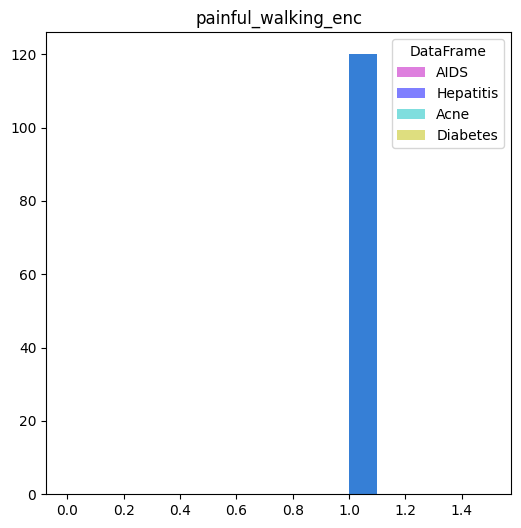

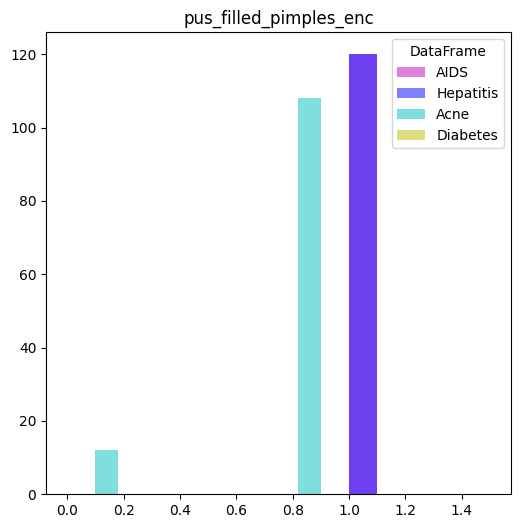

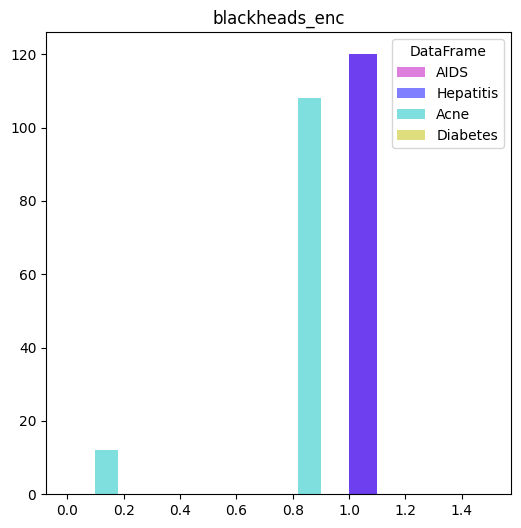

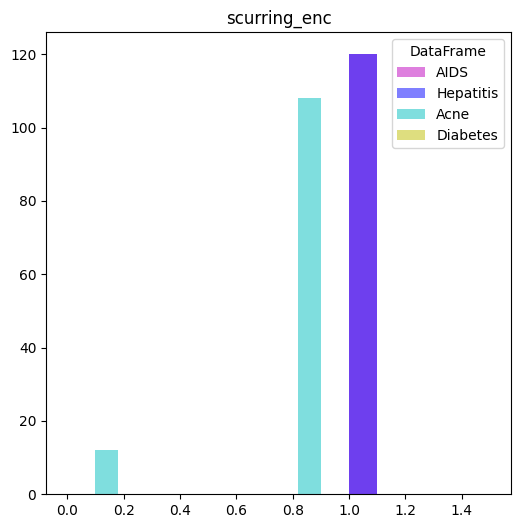

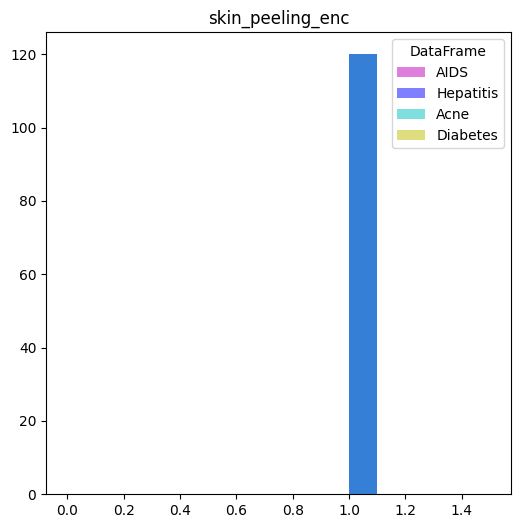

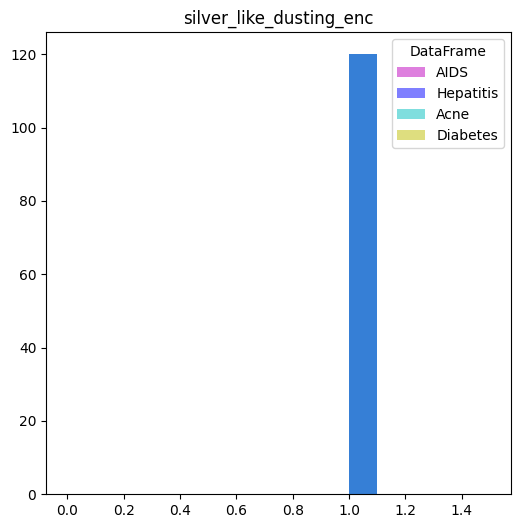

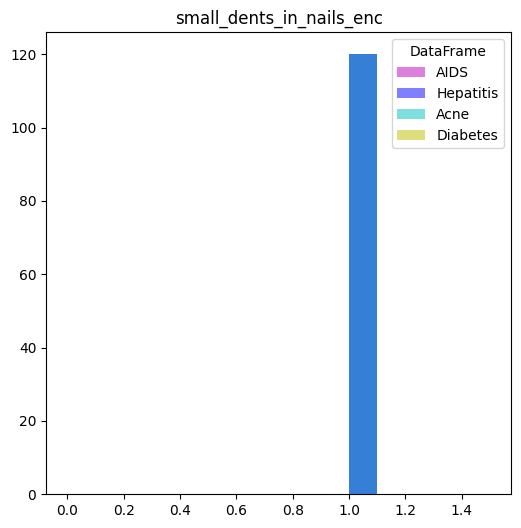

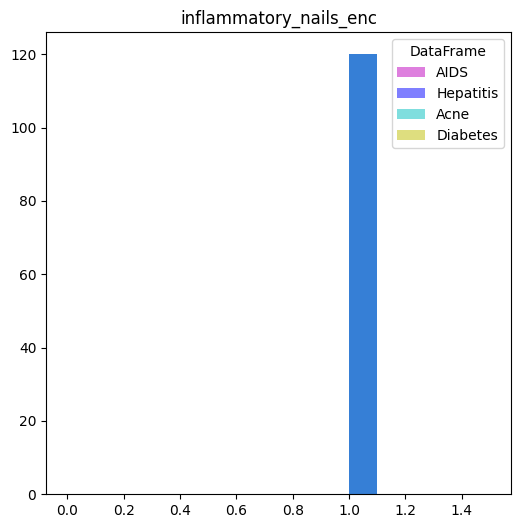

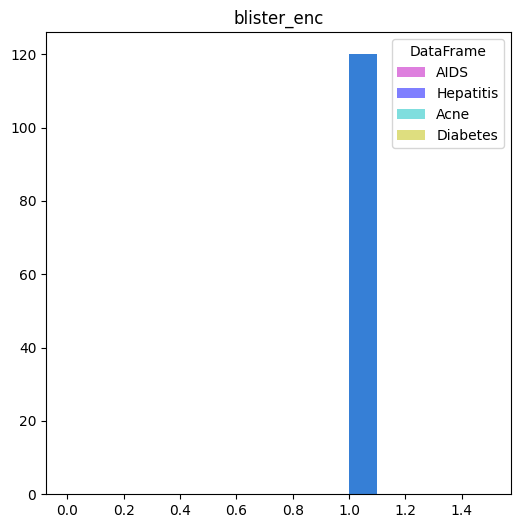

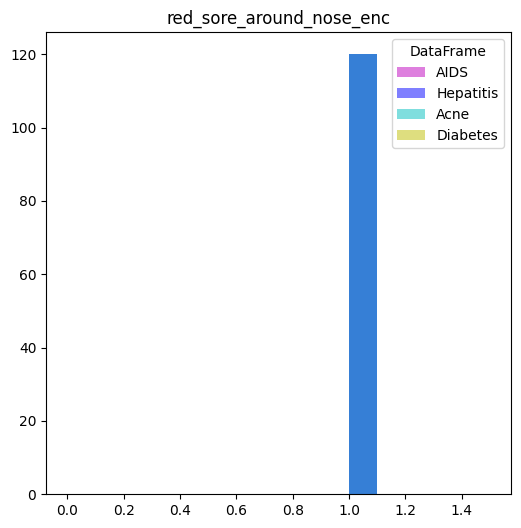

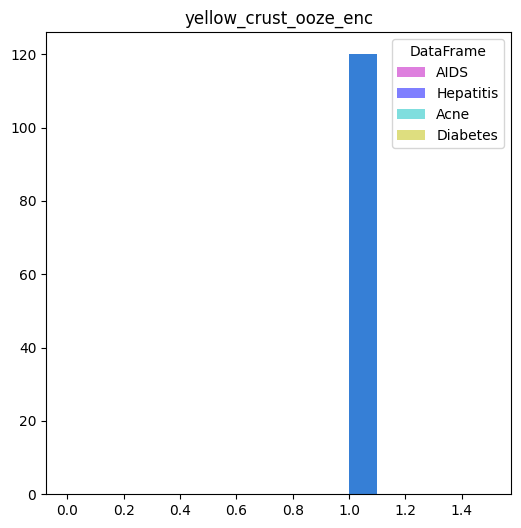

In [6]:
for column in df_train[FEATURES_COLS_ENC].columns:
        plt.figure(figsize=(6,6))
        plt.hist(x=column, data=df_train[df_train['prognosis']=='AIDS'], color='m', alpha = 0.5)
        plt.hist(x=column, data=df_train[df_train['prognosis']=='Hepatitis C'], color='b', alpha = 0.5)
        plt.hist(x=column, data=df_train[df_train['prognosis']=='Acne'], color='c', alpha = 0.5)
        plt.hist(x=column, data=df_train[df_train['prognosis']=='Diabetes'], color='y', alpha = 0.5)
        plt.title(column)
        plt.legend(['AIDS','Hepatitis','Acne','Diabetes'],title='DataFrame')
        plt.show()

### A/B for train

In [7]:
for prognosis in np.sort(df_train['prognosis'].unique()):
    data = df_train[df_train['prognosis'] == prognosis]
    model = ols('itching_enc ~ prognosis', data = data).fit()
    print('Promotion: ',prognosis, '\nResults: ', st.shapiro(model.resid))
    print('')

Promotion:  (vertigo) Paroymsal  Positional Vertigo 
Results:  ShapiroResult(statistic=np.float64(1.0), pvalue=np.float64(1.0))

Promotion:  AIDS 
Results:  ShapiroResult(statistic=np.float64(1.0), pvalue=np.float64(1.0))

Promotion:  Acne 
Results:  ShapiroResult(statistic=np.float64(1.0), pvalue=np.float64(1.0))

Promotion:  Alcoholic hepatitis 
Results:  ShapiroResult(statistic=np.float64(1.0), pvalue=np.float64(1.0))

Promotion:  Allergy 
Results:  ShapiroResult(statistic=np.float64(1.0), pvalue=np.float64(1.0))

Promotion:  Arthritis 
Results:  ShapiroResult(statistic=np.float64(1.0), pvalue=np.float64(1.0))

Promotion:  Bronchial Asthma 
Results:  ShapiroResult(statistic=np.float64(1.0), pvalue=np.float64(1.0))

Promotion:  Cervical spondylosis 
Results:  ShapiroResult(statistic=np.float64(1.0), pvalue=np.float64(1.0))

Promotion:  Chicken pox 
Results:  ShapiroResult(statistic=np.float64(0.2246888512477948), pvalue=np.float64(2.2045857817682276e-22))

Promotion:  Chronic cholest

c:\Users\Daniil\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\Daniil\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\Daniil\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\Daniil\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users

KeyError: 'itching'

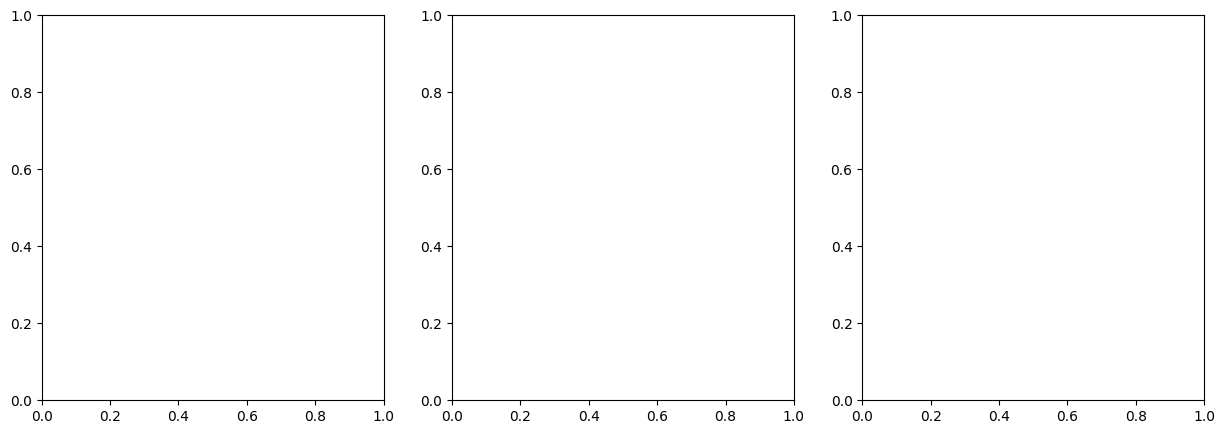

In [8]:
fig , axs = plt.subplots(1,3,figsize=(15,5))
qqplot(np.array(df_train[df_train['prognosis']=='AIDS']['itching']), line = 's', ax = axs[0])
qqplot(np.array(df_train[df_train['prognosis']=='Acne']['itching']), line = 's', ax = axs[1])
qqplot(np.array(df_train[df_train['prognosis']=='Diabetes']['itching']), line = 's', ax = axs[2])



axs[0].set_title("AIDS")
axs[1].set_title("Acne")
axs[2].set_title("itching")
plt.show()

In [6]:
for i in FEATURES_COLS_ENC:
       print(levene(df_train[df_train['prognosis']=='Hepatitis A'][i], 
              df_train[df_train['prognosis']=='Hepatitis B'][i], df_train[df_train['prognosis']=='Hepatitis C'][i]))

C:\Users\Daniil\AppData\Local\Temp\ipykernel_4468\2495336250.py:2: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  print(levene(df_train[df_train['prognosis']=='Hepatitis A'][i],


LeveneResult(statistic=np.float64(nan), pvalue=np.float64(nan))
LeveneResult(statistic=np.float64(nan), pvalue=np.float64(nan))
LeveneResult(statistic=np.float64(nan), pvalue=np.float64(nan))
LeveneResult(statistic=np.float64(nan), pvalue=np.float64(nan))
LeveneResult(statistic=np.float64(nan), pvalue=np.float64(nan))
LeveneResult(statistic=np.float64(nan), pvalue=np.float64(nan))
LeveneResult(statistic=np.float64(nan), pvalue=np.float64(nan))
LeveneResult(statistic=np.float64(nan), pvalue=np.float64(nan))
LeveneResult(statistic=np.float64(nan), pvalue=np.float64(nan))
LeveneResult(statistic=np.float64(nan), pvalue=np.float64(nan))
LeveneResult(statistic=np.float64(nan), pvalue=np.float64(nan))
LeveneResult(statistic=np.float64(nan), pvalue=np.float64(nan))
LeveneResult(statistic=np.float64(nan), pvalue=np.float64(nan))
LeveneResult(statistic=np.float64(nan), pvalue=np.float64(nan))
LeveneResult(statistic=np.float64(nan), pvalue=np.float64(nan))
LeveneResult(statistic=np.float64(nan), 

In [23]:
for i in FEATURES_COLS_ENC:
       print(st.f_oneway(df_train[df_train['prognosis']=='Hepatitis A'][i], 
              df_train[df_train['prognosis']=='Hepatitis B'][i], df_train[df_train['prognosis']=='Hepatitis C'][i]))

C:\Users\Daniil\AppData\Local\Temp\ipykernel_8352\1816549808.py:2: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  print(st.f_oneway(df_train[df_train['prognosis']=='Hepatitis A'][i],


F_onewayResult(statistic=np.float64(nan), pvalue=np.float64(nan))
F_onewayResult(statistic=np.float64(nan), pvalue=np.float64(nan))
F_onewayResult(statistic=np.float64(nan), pvalue=np.float64(nan))
F_onewayResult(statistic=np.float64(nan), pvalue=np.float64(nan))
F_onewayResult(statistic=np.float64(nan), pvalue=np.float64(nan))
F_onewayResult(statistic=np.float64(nan), pvalue=np.float64(nan))
F_onewayResult(statistic=np.float64(nan), pvalue=np.float64(nan))
F_onewayResult(statistic=np.float64(nan), pvalue=np.float64(nan))
F_onewayResult(statistic=np.float64(nan), pvalue=np.float64(nan))
F_onewayResult(statistic=np.float64(nan), pvalue=np.float64(nan))
F_onewayResult(statistic=np.float64(nan), pvalue=np.float64(nan))
F_onewayResult(statistic=np.float64(nan), pvalue=np.float64(nan))
F_onewayResult(statistic=np.float64(nan), pvalue=np.float64(nan))
F_onewayResult(statistic=np.float64(nan), pvalue=np.float64(nan))
F_onewayResult(statistic=np.float64(nan), pvalue=np.float64(nan))
F_onewayRe

In [9]:
for i in FEATURES_COLS_ENC:
       print(kruskal(df_train[df_train['prognosis']=='Hepatitis A'][i], 
              df_train[df_train['prognosis']=='Hepatitis B'][i], df_train[df_train['prognosis']=='Hepatitis C'][i]))

C:\Users\Daniil\AppData\Local\Temp\ipykernel_4560\1398604224.py:2: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  print(kruskal(df_train[df_train['prognosis']=='Hepatitis A'][i],


KruskalResult(statistic=np.float64(nan), pvalue=np.float64(nan))
KruskalResult(statistic=np.float64(nan), pvalue=np.float64(nan))
KruskalResult(statistic=np.float64(nan), pvalue=np.float64(nan))
KruskalResult(statistic=np.float64(nan), pvalue=np.float64(nan))
KruskalResult(statistic=np.float64(nan), pvalue=np.float64(nan))
KruskalResult(statistic=np.float64(nan), pvalue=np.float64(nan))
KruskalResult(statistic=np.float64(nan), pvalue=np.float64(nan))
KruskalResult(statistic=np.float64(nan), pvalue=np.float64(nan))
KruskalResult(statistic=np.float64(nan), pvalue=np.float64(nan))
KruskalResult(statistic=np.float64(nan), pvalue=np.float64(nan))
KruskalResult(statistic=np.float64(nan), pvalue=np.float64(nan))
KruskalResult(statistic=np.float64(nan), pvalue=np.float64(nan))
KruskalResult(statistic=np.float64(nan), pvalue=np.float64(nan))
KruskalResult(statistic=np.float64(nan), pvalue=np.float64(nan))
KruskalResult(statistic=np.float64(nan), pvalue=np.float64(nan))
KruskalResult(statistic=n

In [10]:
FEATURES_COLS_ENC

['itching_enc',
 'skin_rash_enc',
 'nodal_skin_eruptions_enc',
 'continuous_sneezing_enc',
 'shivering_enc',
 'chills_enc',
 'joint_pain_enc',
 'stomach_pain_enc',
 'acidity_enc',
 'ulcers_on_tongue_enc',
 'muscle_wasting_enc',
 'vomiting_enc',
 'burning_micturition_enc',
 'spotting_ urination_enc',
 'fatigue_enc',
 'weight_gain_enc',
 'anxiety_enc',
 'cold_hands_and_feets_enc',
 'mood_swings_enc',
 'weight_loss_enc',
 'restlessness_enc',
 'lethargy_enc',
 'patches_in_throat_enc',
 'irregular_sugar_level_enc',
 'cough_enc',
 'high_fever_enc',
 'sunken_eyes_enc',
 'breathlessness_enc',
 'sweating_enc',
 'dehydration_enc',
 'indigestion_enc',
 'headache_enc',
 'yellowish_skin_enc',
 'dark_urine_enc',
 'nausea_enc',
 'loss_of_appetite_enc',
 'pain_behind_the_eyes_enc',
 'back_pain_enc',
 'constipation_enc',
 'abdominal_pain_enc',
 'diarrhoea_enc',
 'mild_fever_enc',
 'yellow_urine_enc',
 'yellowing_of_eyes_enc',
 'acute_liver_failure_enc',
 'fluid_overload_enc',
 'swelling_of_stomach_enc'

In [14]:
df_train['prognosis'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [15]:
df_train[df_train['prognosis']=='Fungal infection']

prognosis  itching_enc  skin_rash_enc  nodal_skin_eruptions_enc  \
0     Fungal infection          0.9            0.9                       0.9   
1     Fungal infection          0.1            0.9                       0.9   
2     Fungal infection          0.9            0.1                       0.9   
3     Fungal infection          0.9            0.9                       0.1   
4     Fungal infection          0.9            0.9                       0.9   
...                ...          ...            ...                       ...   
4715  Fungal infection          0.9            0.9                       0.9   
4756  Fungal infection          0.9            0.9                       0.9   
4797  Fungal infection          0.9            0.9                       0.9   
4838  Fungal infection          0.9            0.9                       0.9   
4879  Fungal infection          0.9            0.9                       0.9   

      continuous_sneezing_enc  shivering_enc  chills_enc  joint_pain_enc  \
0                         1.0            1.0         1.0             1.0   
1                         1.0            1.0         1.0             1.0   
2                         1.0            1.0         1.0             1.0   
3                         1.0            1.0         1.0             1.0   
4                         1.0            1.0         1.0             1.0   
...                       ...            ...         ...             ...   
4715                      1.0            1.0         1.0             1.0   
4756                      1.0            1.0         1.0             1.0   
4797                      1.0            1.0         1.0             1.0   
4838                      1.0            1.0         1.0             1.0   
4879                      1.0            1.0         1.0             1.0   

      stomach_pain_enc  acidity_enc  ...  pus_filled_pimples_enc  \
0                  1.0          1.0  ...                     1.0   
1                  1.0          1.0  ...                     1.0   
2                  1.0          1.0  ...                     1.0   
3                  1.0          1.0  ...                     1.0   
4                  1.0          1.0  ...                     1.0   
...                ...          ...  ...                     ...   
4715               1.0          1.0  ...                     1.0   
4756               1.0          1.0  ...                     1.0   
4797               1.0          1.0  ...                     1.0   
4838               1.0          1.0  ...                     1.0   
4879               1.0          1.0  ...                     1.0   

      blackheads_enc  scurring_enc  skin_peeling_enc  silver_like_dusting_enc  \
0                1.0           1.0               1.0                      1.0   
1                1.0           1.0               1.0                      1.0   
2                1.0           1.0               1.0                      1.0   
3                1.0           1.0               1.0                      1.0   
4                1.0           1.0               1.0                      1.0   
...              ...           ...               ...                      ...   
4715             1.0           1.0               1.0                      1.0   
4756             1.0           1.0               1.0                      1.0   
4797             1.0           1.0               1.0                      1.0   
4838             1.0           1.0               1.0                      1.0   
4879             1.0           1.0               1.0                      1.0   

      small_dents_in_nails_enc  inflammatory_nails_enc  blister_enc  \
0                          1.0                     1.0          1.0   
1                          1.0                     1.0          1.0   
2                          1.0                     1.0          1.0   
3                          1.0                     1.0          1

In [12]:
for i in FEATURES_COLS_ENC: 
    comp = MultiComparison(df_train[df_train['prognosis']=='Hepatitis A'][i], 
                df_train[df_train['prognosis']=='Hepatitis B'][i])
    tukey = comp.tukeyhsd(0.05)
    tukey.summary()

ValueError: data has 0 elements and groups has 120